# A Multiagent transportation system

Auteur : Philippe Mathieu, [CRISTAL Lab](https://www.cristal.univ-lille.fr/), [SMAC Team](https://www.cristal.univ-lille.fr/?rubrique26&id=7), [University of Lille](http://www.univ-lille1.fr), email : philippe.mathieu@univ-lille.fr

Contributeurs : Corwin Fèvre (CRISTAL/SMAC , CRISTAL/OSM)

Creation : 15/01/2020


## Principe général


Cette feuille fait suite à [mas_basics_fr.ipynb](mas_basics_fr.ipynb) qui donnait les bases de la construction d'un système multi-agents sur un reseau social.
Nous vous montrons ici, comment réaliser une petite simulation d'un système de co-voiturage à l'aide des agents.

## Un système séquentiel (Partie à retirer ? En attente de ta confirmation)

Dans sa forme la plus simple, un agent est une entité dotée d'une seule
capacité, celle de décider quoi faire. Personne ne lui indique ce qu'il doit faire,
c'est lui qui décide ! C'est le principe d'**autonomie**. Il suffit juste de lui donner la
parole pour qu'il agisse. Lors de sa prise de parole, l'agent réalise sémantiquement 3 étapes différentes : la **perception** de son entourage, la **decision** en fonction de son propre état et de ce qu'il a perçu, puis l'**action** effective qu'il réalise in fine. Idéalement chaque agent ne peut faire qu'une seule action lors de sa prise de parole.

In [ ]:
class Agent:
      def __init__(self,name) :
          self.name=name
        
      def decide(self):
          print("Bonjour ! My name is "+self.name)

Il est bien sûr possible de créer plusieurs agents et de les interroger directement.

In [ ]:
a1 = Agent("philippe")
a2 = Agent("corwin")
a1.decide()
a2.decide()

### Le système multiagent séquentiel

Bien évidemment, un système multi-agent utilise des dizaines voire des
milliers d'agents. Il est alors necessaire de créer une classe
permettant de les manager. En général la méthode qui lance la
simulation se nomme `run` et prend en paramètre le nombre de prises de
paroles.
Afin d'assurer le principe d'**équité** on s'assure que chaque agent a
au moins une fois la parole avant qu'un autre agent ne l'ait deux
fois. On s'appuie pour cela sur la notion de tour de parole. Chaque tour de
parole donne aléatoirement la parole à l'ensemble des agents, avant de
recommencer. Un tour de parole constitue sémantiquement une unité de temps, un tick d'horloge. La classe SMA s'écrit :


In [ ]:
import random
class SMA:
      def __init__(self):
        self.tick=0
        self.resetTicks()
        self.agentList = []

      def resetTicks(self):
          tick=0
          
      def addAgent(self,ag):
          self.agentList.append(ag)
 
      def run(self,rounds):
          for i in range(0,rounds):
              self.runOnce()

      def runOnce(self):
          self.tick+=1
          random.shuffle(self.agentList)
          for ag in self.agentList :
              ag.decide()
          print("tick "+str(self.tick)+" ended")

In [ ]:
sma = SMA()
sma.addAgent(Agent("paul"))
sma.addAgent(Agent("kim"))
sma.run(6)

### La simultanéïté

Le système séquentiel présenté précédemment possède des avantages mais aussi des inconvénients. Parmi ses avanatages, il y a bien évidemment sa simplicité. Il possède néanmoins un inconvénient lié au fait que comme un agent agit dès qu'il le peut (dans sa méthode `decide`), deux agents évalués consécutivement ne sont donc pas face au même état de l'environnement.

Prenons un simple exemple d'agents qui raisonnent sur le nombre d'appels total qu'il y a eu à une des méthodes `decide`. Chacun incrémente ce nombre d'appel global, mais aucun d'entre eux ne perçoit la même valeur.


In [ ]:
global_calls = 0

class Agent:
    def __init__(self,name) :
        self.name=name
            
    def decide(self):
        global global_calls
        global_calls += 1
        print("Je suis ",self.name, "et je pense que le nombre global est ", global_calls) 

sma = SMA()
sma.addAgent(Agent("Paul"))
sma.addAgent(Agent("Kim"))
sma.addAgent(Agent("Lisa"))
sma.run(6)

On voir clairement ici la différence de niveau d'information des différents agents au sein d'un même tour de parole.

Dans certaines simulations, il est parfois necessaire que, dans un même tour de parole, tous les agents soient face à la même connaissance lors de leur raisonnement. C'est le principe d'équité en raisonnement, ou en d'autres termes, *la simultanéïté* dans l'action (problème similaire à celui des automates cellulaires : dans le célèbre `jeu de la vie`, toutes les cellules changent d'état simultanément).

Pour implémenter ce principe de simultanéité, le principe perception-decision-action doit être "ventilé". L'agent a alors besoin de 2 méthodes d'accès. La première pour la perception et la décision : `update`  et la seconde pour l'action :`decide`.
Le SMA appelle alors `update` chez tous les agents, puis `decide`. La connaissance étant identique pour tous au moment du raisonnement, l'ordre de passage des agents est maintenant indifférent : ils peuvent tous agir dans le même ordre.

In [ ]:
global_calls = 0 

class Agent:
    def __init__(self,name) :
        self.name=name

    def update(self) :
        global global_calls 
        global_calls += 1
        
    def decide(self):
        print("Je suis ",self.name, "et je pense que le nombre global est ", global_calls)

In [ ]:
import random
class SMA:
    def __init__(self):
        self.tick=0
        self.resetTicks()
        self.agentList = []

    def resetTicks(self):
        tick=0
          
    def addAgent(self,ag):
        self.agentList.append(ag)
 
    def run(self,rounds):
        for i in range(0,rounds):
            self.runOnce()

    def runOnce(self):
        self.tick+=1
        for ag in self.agentList :
            ag.update()
        for ag in self.agentList :
            ag.decide()            
        print("tick "+str(self.tick)+" ended")

In [ ]:
sma = SMA()
sma.addAgent(Agent("Paul"))
sma.addAgent(Agent("Kim"))
sma.addAgent(Agent("Lisa"))
sma.run(3)

Cette fois on constate que tous les agents ont eu la même information dans un même tour de parole.

La simultanéïté des agents résoud parfois certains problèmes, mais elle possède évidemment un inconvénient majeur. Si les ressources accédées par les agents sont communes, il y a alors risque de conflit, et il faudra alors régler les conflits. C'est pourquoi le principe de simultanéïté n'est utilisé dans les SMA que lorsque c'est vraiment necessaire.

Quand des agents `véhicules` circulent sur infrastructure, le SMA leur permet régulièrement d'avancer en fonction de ce qu'ils perçoivent. Dans un tel cas, on comprend aisément que l'ordre de raisonnement des agents devient capital : Si A est devant B et que tous deux sont très proches et à la même vitesse, si A avance en premier, B n'a ensuite aucune difficulté à avancer, tandis que si B avance en premier, l'accident est inévitable. la simultanéïté devient alors impérative.



# La simulation du trafic

In [121]:
import networkx as nx
import random as random
import matplotlib.pyplot as plt
import itertools
import numpy as np
from math import ceil, floor

### Abstract class des agents

In [122]:
class Agent:
    def __init__(self, unique_id):
        self.is_alive = True
        self.unique_id = unique_id
    
    def update(self) -> None:
        pass
    
    def decide(self) -> None:
        pass

### Agent conducteur
Un agent conducteur dispose d'un trajet : une succession de positions contiguës qu'il va parcourir.
À chaque tick, il supprime le premier élément de son trip. Simulant une avancée dans son voyage.

In [123]:
class DriverAgent(Agent):
    def __init__(self, unique_id, trip):
        super().__init__(unique_id)
        self.trip = trip
        
    def to_string(self):
        print("I am driver",self.unique_id,"- trip:",self.trip)
        
        
    def update(self) :
        pass
    
    def decide(self) :
        if len(self.trip)>0:
            self.trip.pop(0)
        else :
            self.is_alive = False
            print("Driver",self.unique_id,"arrived")
            

### Agent passager
Un agent passager dispose d'un noeud de départ, d'une noeud d'arrivé et d'un noeud actuel.
Son but est de rejoindre son noeud d'arrivé en respectant certains critères, dans notre cas, en minimisant le temps d'attente et la distance parcourue.
Cet agent va générer et mettre à jour son graphe de transition, ce dernier lui permettra de déterminer quel choix faire quant au partage d'un trajet avec un conducteur.
Il disposera d'une heuristique qui sera propre à lui-même (pour l'instant une seule) et fera donc un choix en fonction de son environnement.
Il peut attendre sur sa case, augmentant alors son temps total d'attente, partager un trajet d'un conducteur et faire des détours si ça en vaut la peine.

In [124]:
class RiderAgent(Agent):
    def __init__(self, unique_id, v_dep, v_arr):
        super().__init__(unique_id)
        self.v_dep = v_dep
        self.v_r = v_dep
        self.v_arr = v_arr
        self.Av = {self.v_r}
        self.Ats = dict()
        self.Ats[self.v_r]={'distance':0}
        self.Ad = []
        self.G_ts = None
        self.wt = 0
        
    def to_string(self):
        print("I am rider",self.unique_id,"- dep:",self.v_dep,", arr:",self.v_arr)
        
    def generate_transition_graph_v2(self):
        self.G_ts = nx.MultiDiGraph()
        #print(self.Ats)
        self.G_ts.add_node(self.v_r, distance=0)
        for ad in self.Ad[self.v_r]:
            d_time_left = ad[2]
            r_time_left = 0
            if d_time_left >= r_time_left :
                distance = d_time_left
                node = self.create_nodes_of_ad(ad, distance)
                #print("node from recurs on vr",node)
                contrib = nx.shortest_path_length(sma.graph, source=self.v_r, target=self.v_arr) - nx.shortest_path_length(sma.graph, source=node, target=self.v_arr)
                delay = d_time_left
                self.G_ts.add_edge(self.v_r, node, d=ad, contrib=contrib, delay=delay)
        
    def create_nodes_of_ad(self, ad, prev_distance):
        #print("ad",ad)
        trip = ad[1][1:]
        #print("trip:",trip)
        first_node = None
        last_created_node = None
        distance = prev_distance + ad[2]

        for i in range(len(trip)):
            node = trip[i]
            distance += 1
            if node in self.Ad.keys() and len(self.Ad[node] > 1):
                other_Ad = [ads for ads in self.Ad[node] if ads[0]!=ad[0]]
                for d in other_Ad:
                    d_time_left = d[2]
                    if d_time_left >= distance :
                        if not (self.G_ts.has_node(node)):
                                self.G_ts.add_node(node, distance=distance)
                        if first_node == None:
                            first_node = node

                        else :
                            contrib = nx.shortest_path_length(sma.graph, source=last_created_node, target=self.v_arr) - nx.shortest_path_length(sma.graph, source=node, target=self.v_arr)
                            delay = 0
                            self.G_ts.add_edge(last_created_node, node, d=ad, contrib=contrib, delay=delay)

                        last_created_node = node


                        new_node = self.create_nodes_of_ad(d, distance)
                        contrib = nx.shortest_path_length(sma.graph, source=node, target=self.v_arr) - nx.shortest_path_length(sma.graph, source=new_node, target=self.v_arr)
                        delay = d_time_left - distance
                        self.G_ts.add_edge(node, res, d=d, contrib=contrib, delay=delay)

        #si on ne trouve pas d'autres voyages, alors on va sortir le meilleur noeuds                
        if first_node == None:
            full_trip = ad[1]
            #on part du dernier noeuds et on recupère sa contribution
            last_node = full_trip[-1]
            source_node = full_trip[0]
            contrib = nx.shortest_path_length(sma.graph, source=source_node, target=self.v_arr) - nx.shortest_path_length(sma.graph, source=last_node, target=self.v_arr)
            #print("contrib",contrib)
            if len(full_trip) < 3:
                    first_node = last_node
            else :
                #print("test1")
                if contrib < 0:
                    best_node_index = floor(len(full_trip[:contrib])/2)
                    if best_node_index == 0:
                        first_node = full_trip[-1]
                    else :
                        first_node = full_trip[best_node_index]
                        
                    #print("<")

                if contrib == 0 :
                    best_node_index = floor(len(full_trip)/2)
                    first_node = full_trip[best_node_index]
                    #print("=")

                if contrib > 0 :
                    tmp = full_trip[contrib:] 
                    best_node_index = floor(len(tmp)/2)
                    first_node = tmp[best_node_index]
                    #print(">")
                    
            if not (self.G_ts.has_node(first_node)):
                distance = prev_distance + ad[2] + full_trip.index(first_node)
                self.G_ts.add_node(first_node, distance=distance)
        #print("first_node",first_node)
        return first_node
        
    
    
    def best_driver_contrib_and_wait(self):
        scores_paths = dict()
        cur_node = self.v_r
        #print(cur_node)
        other_nodes = [node for node in list(self.G_ts.nodes()) if node != cur_node]
        paths = nx.all_simple_paths(self.G_ts, source=cur_node, target=other_nodes)

        #heuristique : suivre le chemin qui rapporte le plus de cases le plus rapidement possible
        for path in paths :
            id_d = None
            score_path = 0
            #print(path)
            for i in range(len(path)):

                if i+1<len(path):
                    data = self.G_ts.get_edge_data(path[i], path[i+1])
                    #print(data)

                    #si il y a plusieurs arretes menants au meme noeuds

                    best_score = None
                    #on est dans un multigraph, donc on prends la meilleur edge
                    for j in range(len(data)):
                        cur_score = data[j]['contrib'] - data[j]['delay']
                        if best_score == None or best_score < cur_score:
                            best_score = cur_score
                            if i==0 :
                                id_d = data[j]['d'][0]

                    score_path += best_score                   

                else :
                    break

            scores_paths[id_d]=score_path
            
        #contrib_pos = [val for val in scores_paths.values() if val >= 0]
        #if len(contrib_pos) > 0:
        bests_d = [key for m in [max(scores_paths.values())] for key,val in scores_paths.items() if val == m]
        random.shuffle(bests_d)
            #print(bests_d)

        for d in self.Ad[cur_node]:
            if d[0] in bests_d and d[2] == 0:
                return(d)
            
        return None

    
    
    
    def update(self):
        
        self.Ad = tsa.get_rider_matched_drivers(self.Av)
        self.generate_transition_graph_v2()
        
        cur_node = self.v_r
        
        blacklist = set()
        
        
        #si véhicule présent direct alors on effectue heuritique sinon reste sur son noeud et comportement dif
        
        if len(self.Ad[cur_node]) > 0 and len([driver for driver in self.Ad[cur_node] if driver[2]==0])>0:
            best_driver = self.best_driver_contrib_and_wait()
            if best_driver != None :
                
                new_node = best_driver[1][1]
              
                print("Agent rider",self.unique_id,"move from",self.v_r,"to",new_node,"using car",best_driver)
                if new_node == self.v_arr:
                    print("Rider n°",self.unique_id,"arrived with a waiting time of",self.wt,"ticks")
                    self.is_alive = False
                    return
                #on ecrase l'ancien noeud
                nx.relabel_nodes(self.G_ts, {cur_node:new_node}, copy=False)
               
                blacklist = set(cur_node)
            else : 
                print("Agent rider",self.unique_id,"doesn't move")
                new_node = cur_node
                self.wt += 1
            
            
        else:
            print("Agent rider",self.unique_id,"doesn't move")
            new_node = cur_node
            self.wt += 1
        
        
        self.Av = {new_node}
        other_nodes = [node for node in list(self.G_ts.nodes()) if node != new_node]
        for node in other_nodes:
            
            if nx.has_path(self.G_ts,new_node,node):
                bl_node = nx.shortest_path(self.G_ts, new_node, node)[-2]
                edge_data = self.G_ts.get_edge_data(bl_node,node)

                    #si il y a plusieurs arretes menants au meme noeud
                for j in range(len(edge_data)): 
                   
                    d = edge_data[j]['d']
                    self.Av.union(set(d[1]))

            else :
                blacklist.add(node)
                self.G_ts.remove_node(node)
        
        
        self.v_r = new_node
        self.Av.difference(blacklist)
        
    def decide(self):
        pass

### L'agent service de transport :
Cet agent référence, à chaque début de tick et pour chaque noeuds, les conducteurs passant par un noeud.
Son but principal et d'éviter de multiples appels et parcours des différents agents conducteurs par de nombreux agents passagers.
Il créer donc un dictionnaire prenant pour clé un noeud et pour valeur une liste de conducteurs.

In [125]:
class TransportServiceAgent(Agent):
    #tsa
    def __init__(self, unique_id):
        super().__init__(unique_id)
        self.drivers_nodes_tracker = dict()
    
     
    def get_rider_matched_drivers(self, Av):
        Ad = dict()
        for av in Av:
            Ad[av] = self.drivers_nodes_tracker[av]
        
        #print("\n ad :", Ad)
        return Ad
    
    def update(self):
        drivers = [agent for agent in sma.agentList if (agent.__class__.__name__ == "DriverAgent")]
        
        for node in list(sma.graph.nodes()):
            self.drivers_nodes_tracker[node] = list()
            
        for key in list(self.drivers_nodes_tracker.keys()):
            for driver in drivers :   
                if key in driver.trip:
                    m_idx = driver.trip.index(key)
                    sub_trip = driver.trip[m_idx:]
                    #on verifie que le noeud de transition n'est pas l'arrive du conducteur
                    if len(sub_trip) > 1:
                        self.drivers_nodes_tracker[key].append((driver.unique_id, driver.trip[m_idx:], m_idx))
        #print("\n driver node tracker :", self.drivers_nodes_tracker)
        
    def decide(self):
        pass

### L'agent générateur de traffic
Cet agent va nous permettra d'insérer de nouveaux agents conducteurs et passagers dans le trafic tout en modulant leur nombre en fonction de la taille de l'environnement et d'un indice de croissance.
Ainsi, plus l'environnement et grand, plus il y a d'agents. Plus l'indice de croissance est grand, plus souvent il y a d'agents générés.

In [126]:
class GeneratorAgent(Agent):
    def __init__(self, growth_rate, current_id, rider_gen=False):
        super().__init__(current_id)
        self.n_id = current_id+1
        self.growth_rate = growth_rate #permet de gerer la vitesse d'expansion du nombre de voitures 
        #Valeur entre ]0,1], 0 = 0%, 1 = 100%
        self.system_occupency = 0
        self.rider_gen = rider_gen
        
    def next_id(self):
        self.n_id += 1
        return self.n_id

    

    #genere les agents voitures
    def driverAgentGenerator(self):
        n1, n2 = random.sample(list(sma.graph.nodes),2) 
        trip = nx.shortest_path(graph, n1, n2)
        d = DriverAgent(self.next_id(), trip)
        d.to_string()
        sma.addAgent(d)
        

    #genere les agents passagers
    def riderAgentGenerator(self):
        n1, n2 = random.sample(list(sma.graph.nodes),2)    
        r = RiderAgent(self.next_id(), n1, n2)
        r.to_string()
        sma.addAgent(r)
        
    def update(self):
        nb_nodes = len(list(sma.graph.nodes))
        nb_drivers = len([agent for agent in sma.agentList if (agent.__class__.__name__ == "DriverAgent")])
        self.trafic_indicator = (nb_drivers/nb_nodes) *100
        system_difference = nb_nodes - nb_drivers
        if system_difference > 0:
            nb_to_gen = random.randrange(int(system_difference*self.growth_rate))
            for i in range(nb_to_gen):
                self.driverAgentGenerator()
            print(nb_to_gen,"drivers generated.")
            
        if self.rider_gen == True:
            nb_riders = len([agent for agent in sma.agentList if (agent.__class__.__name__ == "RiderAgent")])
            system_difference = (nb_nodes - nb_riders)/2
            if system_difference > 0:
                nb_to_gen = random.randrange(int(system_difference*self.growth_rate))
                for i in range(nb_to_gen):
                    self.riderAgentGenerator()
                print(nb_to_gen,"riders generated.")
                
    def decide(self):
        pass
        

### Le Système multi-agents
Le SMA va encadrer le tour de parole des agents, la liste des agents présents/vivants dans le système et récupérer les données issues d'une simulation.

In [127]:
class SMA:
    def __init__(self, agentList, graph):
        self.tick = 0
        self.agentList = agentList
        self.graph = graph
        self.wt_collector = []
        self.wt_keeper = []
        self.trafic_collector = []
        
    def addAgent(self,ag):
          self.agentList.append(ag)
            
    def run(self, rounds=None):
        if rounds==None:
            #tant que tout les agents passagers ne sont pas arrivés à destination
            while len([agent for agent in self.agentList if (agent.__class__.__name__ == "RiderAgent")]) > 0:
                self.runOnce()
        else :
            #on fait un nombre de tour précis
            for i in range(0,rounds):
                self.runOnce()

    def runOnce(self):
        self.tick += 1
        
        
        for agent in self.agentList:
            agent.update()
            agent.decide()
            
        #on nettoie la liste des agents
        wt_tick = []
        for a in agentList :
            if a.__class__.__name__ == "RiderAgent":
                if a.is_alive == False:
                    self.wt_keeper.append(a.wt)
                    self.agentList.remove(a)
                else :
                    wt_tick.append(a.wt)
                 
            elif a.__class__.__name__ == "GeneratorAgent":
                self.trafic_collector.append(a.trafic_indicator)
                
            elif a.__class__.__name__ == "DriverAgent":
                 if a.is_alive == False:
                    self.agentList.remove(a)

        #print(wt_tick)
        self.wt_collector.append(np.mean(wt_tick+self.wt_keeper))
        
        print("tick " + str(self.tick) + " ended")

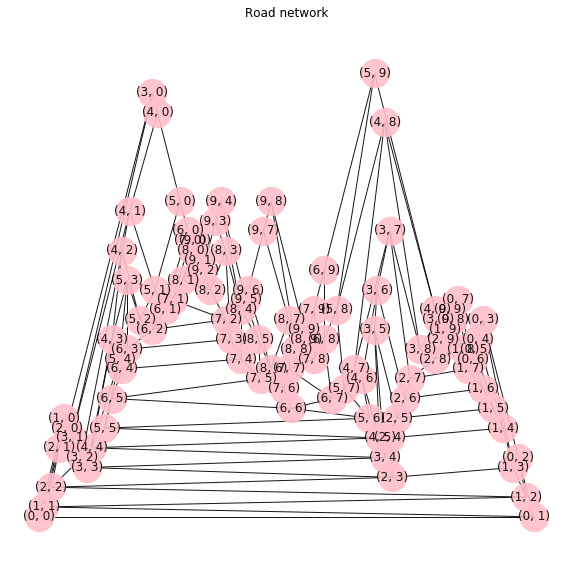

In [128]:
graph = nx.grid_2d_graph(10,10)


plt.figure(figsize=(10,10))    # pour définir la taille de la figure
pos = nx.planar_layout(graph)
nx.draw_networkx(graph,pos=pos,edge_color='black',width=1,linewidths=1,node_size=800,node_color='pink',alpha=0.9)
plt.title("Road network")
plt.axis('off')
plt.show()


In [129]:
tsa = TransportServiceAgent(0)
gen = GeneratorAgent(1,1,True)
agentList = [gen, tsa]
    
sma = SMA(agentList, graph)
sma.run(1000)

I am driver 3 - trip: [(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (5, 3), (6, 3)]
I am driver 4 - trip: [(1, 8), (1, 7), (1, 6), (1, 5)]
I am driver 5 - trip: [(9, 9), (8, 9), (7, 9), (6, 9), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4)]
I am driver 6 - trip: [(8, 7), (7, 7), (6, 7), (5, 7), (4, 7), (4, 6), (3, 6)]
I am driver 7 - trip: [(7, 7), (6, 7), (5, 7), (4, 7), (4, 8), (3, 8), (2, 8)]
I am driver 8 - trip: [(9, 4), (8, 4), (7, 4), (6, 4), (5, 4), (4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0)]
I am driver 9 - trip: [(9, 1), (8, 1), (7, 1), (6, 1), (5, 1), (4, 1), (4, 2), (3, 2), (2, 2), (1, 2)]
I am driver 10 - trip: [(9, 3), (8, 3), (7, 3), (6, 3), (5, 3), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7)]
I am driver 11 - trip: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)]
I am driver 12 - trip: [(7, 5), (7, 4), (7, 3), (7, 2), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1)]
I am driver 13 - trip: [(7, 8), (6, 8), (6, 9),

Agent rider 48 move from (6, 0) to (5, 0) using car (82, [(6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)], 0)
Agent rider 49 doesn't move
Agent rider 50 move from (6, 2) to (5, 2) using car (68, [(6, 2), (5, 2), (5, 1), (5, 0), (4, 0)], 0)
Agent rider 51 move from (2, 3) to (2, 2) using car (60, [(2, 3), (2, 2), (2, 1), (3, 1), (4, 1)], 0)
Agent rider 52 move from (2, 3) to (2, 2) using car (60, [(2, 3), (2, 2), (2, 1), (3, 1), (4, 1)], 0)
Agent rider 53 move from (7, 1) to (6, 1) using car (12, [(7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1)], 0)
Agent rider 54 move from (2, 3) to (2, 2) using car (60, [(2, 3), (2, 2), (2, 1), (3, 1), (4, 1)], 0)
Agent rider 55 move from (3, 6) to (3, 5) using car (87, [(3, 6), (3, 5), (3, 4), (3, 3)], 0)
Driver 66 arrived
Driver 71 arrived
Agent rider 91 move from (6, 4) to (6, 3) using car (79, [(6, 4), (6, 3), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2)], 0)
Agent rider 92 move from (5, 3) 

Agent rider 151 move from (1, 8) to (2, 8) using car (186, [(1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3)], 0)
Agent rider 152 doesn't move
Agent rider 153 move from (9, 6) to (9, 5) using car (158, [(9, 6), (9, 5)], 0)
Agent rider 168 move from (4, 8) to (3, 8) using car (15, [(4, 8), (3, 8), (2, 8)], 0)
Agent rider 169 move from (2, 5) to (2, 4) using car (57, [(2, 5), (2, 4), (2, 3)], 0)
Agent rider 170 move from (6, 5) to (6, 4) using car (5, [(6, 5), (6, 4)], 0)
Agent rider 171 move from (2, 5) to (2, 4) using car (57, [(2, 5), (2, 4), (2, 3)], 0)
Agent rider 173 move from (5, 5) to (5, 4) using car (164, [(5, 5), (5, 4), (5, 3), (4, 3), (3, 3), (2, 3), (1, 3)], 0)
Agent rider 174 doesn't move
Agent rider 175 move from (6, 6) to (7, 6) using car (167, [(6, 6), (7, 6)], 0)
Agent rider 176 move from (5, 5) to (5, 6) using car (84, [(5, 5), (5, 6), (5, 7), (5, 8)], 0)
Agent rider 177 move from (5, 5) to (5, 4) using car (164, [(5, 5), (5, 4), 

Agent rider 20 move from (1, 6) to (0, 6) using car (187, [(1, 6), (0, 6)], 0)
Agent rider 21 move from (3, 7) to (3, 6) using car (191, [(3, 7), (3, 6), (2, 6), (1, 6), (0, 6)], 0)
Agent rider 25 move from (2, 3) to (2, 4) using car (82, [(2, 3), (2, 4), (2, 5), (2, 6), (2, 7)], 0)
Agent rider 26 move from (1, 6) to (0, 6) using car (187, [(1, 6), (0, 6)], 0)
Rider n° 26 arrived with a waiting time of 5 ticks
Agent rider 30 doesn't move
Agent rider 31 doesn't move
Agent rider 32 move from (7, 4) to (7, 3) using car (240, [(7, 4), (7, 3), (7, 2), (8, 2), (9, 2)], 0)
Agent rider 33 move from (2, 0) to (1, 0) using car (8, [(2, 0), (1, 0)], 0)
Agent rider 35 move from (4, 6) to (5, 6) using car (157, [(4, 6), (5, 6)], 0)
Agent rider 37 doesn't move
Agent rider 38 doesn't move
Agent rider 39 move from (9, 5) to (9, 4) using car (228, [(9, 5), (9, 4), (9, 3), (9, 2), (9, 1), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0)], 0)
Agent rider 40 move from (3, 2) to (4, 2) using 

Driver 160 arrived
Driver 164 arrived
Driver 165 arrived
Agent rider 168 doesn't move
Agent rider 169 doesn't move
Agent rider 170 move from (6, 4) to (5, 4) using car (262, [(6, 4), (5, 4)], 0)
Agent rider 171 doesn't move
Agent rider 173 doesn't move
Agent rider 174 move from (0, 6) to (0, 5) using car (257, [(0, 6), (0, 5), (0, 4), (0, 3)], 0)
Agent rider 175 move from (6, 2) to (5, 2) using car (285, [(6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (1, 6), (0, 6)], 0)
Agent rider 177 doesn't move
Agent rider 178 move from (1, 6) to (0, 6) using car (163, [(1, 6), (0, 6)], 0)
Agent rider 179 move from (0, 6) to (0, 5) using car (257, [(0, 6), (0, 5), (0, 4), (0, 3)], 0)
Driver 183 arrived
Agent rider 193 move from (2, 6) to (2, 7) using car (82, [(2, 6), (2, 7)], 0)
Agent rider 194 doesn't move
Agent rider 195 move from (2, 6) to (2, 7) using car (82, [(2, 6), (2, 7)], 0)
Agent rider 196 move from (5, 4) to (6, 4) using car (180, [(5, 4), (6, 4), (7, 4), (8, 

Agent rider 326 move from (5, 5) to (5, 4) using car (245, [(5, 5), (5, 4)], 0)
Agent rider 327 doesn't move
Agent rider 328 move from (1, 6) to (1, 7) using car (277, [(1, 6), (1, 7), (1, 8), (0, 8)], 0)
Agent rider 329 doesn't move
Agent rider 330 doesn't move
Agent rider 352 doesn't move
Agent rider 353 doesn't move
Agent rider 354 move from (0, 1) to (1, 1) using car (333, [(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7)], 0)
Agent rider 355 doesn't move
Agent rider 356 move from (7, 7) to (7, 6) using car (232, [(7, 7), (7, 6), (7, 5), (7, 4)], 0)
Agent rider 357 doesn't move
tick 19 ended
I am driver 358 - trip: [(3, 5), (4, 5), (5, 5), (6, 5), (6, 4), (6, 3)]
I am driver 359 - trip: [(5, 7), (4, 7), (3, 7), (2, 7), (2, 6), (2, 5), (1, 5)]
I am driver 360 - trip: [(8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6)]
I am driver 361 - trip: [(7, 7), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (1, 2)]
I am driver 362 - trip: [(8

Agent rider 215 doesn't move
Agent rider 216 doesn't move
Agent rider 218 doesn't move
Driver 232 arrived
Driver 251 arrived
Agent rider 252 move from (3, 7) to (2, 7) using car (361, [(3, 7), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (1, 2)], 0)
Agent rider 254 move from (7, 1) to (7, 2) using car (401, [(7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (6, 6), (5, 6), (4, 6)], 0)
Agent rider 264 doesn't move
Agent rider 265 move from (1, 5) to (1, 6) using car (333, [(1, 5), (1, 6), (1, 7)], 0)
Rider n° 265 arrived with a waiting time of 1 ticks
Agent rider 267 move from (2, 8) to (2, 7) using car (385, [(2, 8), (2, 7)], 0)
Driver 275 arrived
Driver 279 arrived
Agent rider 281 doesn't move
Agent rider 282 move from (6, 4) to (6, 3) using car (358, [(6, 4), (6, 3)], 0)
Driver 287 arrived
Agent rider 296 move from (5, 2) to (6, 2) using car (377, [(5, 2), (6, 2), (7, 2), (7, 3), (7, 4), (7, 5), (8, 5)], 0)
Agent rider 297 move from (6, 4) to (6, 3) using car (358, [(6, 4), (6, 3)],

Agent rider 417 move from (4, 6) to (4, 5) using car (425, [(4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (5, 1)], 0)
Agent rider 418 move from (3, 0) to (4, 0) using car (441, [(3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5)], 0)
Agent rider 419 move from (8, 3) to (8, 2) using car (347, [(8, 3), (8, 2)], 0)
Agent rider 420 doesn't move
Agent rider 421 move from (7, 5) to (7, 6) using car (401, [(7, 5), (7, 6), (6, 6), (5, 6), (4, 6)], 0)
Agent rider 422 move from (9, 7) to (9, 8) using car (375, [(9, 7), (9, 8), (9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9)], 0)
Driver 432 arrived
Driver 437 arrived
Agent rider 446 doesn't move
Agent rider 447 doesn't move
Agent rider 448 doesn't move
Agent rider 454 move from (3, 1) to (4, 1) using car (440, [(3, 1), (4, 1), (5, 1), (5, 2), (5, 3)], 0)
Agent rider 455 doesn't move
Agent rider 456 doesn't move
Agent rider 457 move from (7, 0) to (8, 0) using car (402, [(7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (9, 3)], 0)
Agent rider 458 does

Agent rider 467 move from (5, 3) to (5, 4) using car (508, [(5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (4, 7), (3, 7), (2, 7), (1, 7)], 0)
Agent rider 468 move from (8, 9) to (7, 9) using car (375, [(8, 9), (7, 9), (6, 9), (5, 9), (4, 9)], 0)
Agent rider 469 doesn't move
Agent rider 476 move from (6, 3) to (7, 3) using car (487, [(6, 3), (7, 3), (8, 3), (8, 4), (8, 5), (8, 6), (9, 6)], 0)
Agent rider 477 doesn't move
Agent rider 492 doesn't move
Agent rider 493 doesn't move
tick 31 ended
I am driver 516 - trip: [(4, 9), (4, 8), (4, 7), (4, 6), (4, 5), (3, 5), (2, 5), (1, 5), (0, 5)]
I am driver 517 - trip: [(0, 8), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0)]
I am driver 518 - trip: [(4, 0), (3, 0), (2, 0), (1, 0), (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)]
I am driver 519 - trip: [(5, 0), (4, 0), (3, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)]
I am driver 520 - trip: [(4, 5), (3, 5), (2, 5), (2, 6)]
I am driver 521 -

Agent rider 44 move from (1, 3) to (1, 2) using car (506, [(1, 3), (1, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], 0)
Agent rider 47 doesn't move
Agent rider 53 doesn't move
Agent rider 91 move from (9, 9) to (8, 9) using car (588, [(9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (2, 8), (2, 7), (2, 6)], 0)
Agent rider 119 move from (2, 8) to (1, 8) using car (490, [(2, 8), (1, 8), (0, 8)], 0)
Agent rider 140 doesn't move
Agent rider 141 move from (9, 9) to (8, 9) using car (588, [(9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (2, 8), (2, 7), (2, 6)], 0)
Agent rider 145 move from (4, 9) to (4, 8) using car (545, [(4, 9), (4, 8), (4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2)], 0)
Agent rider 150 move from (6, 9) to (7, 9) using car (533, [(6, 9), (7, 9), (7, 8), (7, 7), (7, 6)], 0)
Agent rider 152 move from (9, 9) to (8, 9) using car (588, [(9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (2, 8), (2, 7), (

Agent rider 555 move from (2, 1) to (3, 1) using car (506, [(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], 0)
Agent rider 556 move from (9, 6) to (9, 5) using car (599, [(9, 6), (9, 5), (9, 4), (9, 3)], 0)
Agent rider 557 doesn't move
Agent rider 559 move from (7, 8) to (6, 8) using car (544, [(7, 8), (6, 8), (5, 8), (4, 8), (3, 8), (2, 8), (1, 8)], 0)
Driver 571 arrived
Driver 582 arrived
Driver 584 arrived
Driver 586 arrived
Agent rider 589 move from (5, 3) to (4, 3) using car (574, [(5, 3), (4, 3), (4, 4), (4, 5), (3, 5)], 0)
Agent rider 590 doesn't move
Agent rider 591 move from (0, 1) to (0, 0) using car (517, [(0, 1), (0, 0)], 0)
Agent rider 592 move from (2, 5) to (3, 5) using car (597, [(2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (6, 6), (6, 7), (7, 7)], 0)
Agent rider 593 move from (7, 5) to (7, 6) using car (495, [(7, 5), (7, 6), (7, 7)], 0)
Agent rider 594 move from (2, 4) to (2, 3) using car (549, [(2, 4), (2, 3), (3, 3), (4, 3), (5, 3)], 0)
Agent rider 601 do

Agent rider 41 move from (2, 8) to (2, 7) using car (588, [(2, 8), (2, 7), (2, 6)], 0)
Agent rider 44 move from (1, 4) to (0, 4) using car (548, [(1, 4), (0, 4)], 0)
Agent rider 47 doesn't move
Agent rider 91 move from (2, 8) to (2, 7) using car (588, [(2, 8), (2, 7), (2, 6)], 0)
Agent rider 119 doesn't move
Agent rider 141 move from (2, 8) to (2, 7) using car (588, [(2, 8), (2, 7), (2, 6)], 0)
Agent rider 145 move from (4, 2) to (3, 2) using car (620, [(4, 2), (3, 2), (2, 2), (1, 2), (0, 2)], 0)
Agent rider 150 doesn't move
Agent rider 152 move from (2, 8) to (2, 7) using car (588, [(2, 8), (2, 7), (2, 6)], 0)
Agent rider 179 move from (1, 4) to (0, 4) using car (548, [(1, 4), (0, 4)], 0)
Agent rider 196 move from (2, 8) to (2, 7) using car (588, [(2, 8), (2, 7), (2, 6)], 0)
Agent rider 216 doesn't move
Agent rider 252 doesn't move
Agent rider 323 move from (1, 4) to (0, 4) using car (548, [(1, 4), (0, 4)], 0)
Agent rider 325 move from (6, 8) to (5, 8) using car (656, [(6, 8), (5, 8),

Agent rider 550 move from (5, 9) to (5, 8) using car (715, [(5, 9), (5, 8), (5, 7), (5, 6), (5, 5), (5, 4)], 0)
Agent rider 551 doesn't move
Agent rider 552 doesn't move
Agent rider 553 move from (1, 6) to (1, 7) using car (731, [(1, 6), (1, 7), (1, 8), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9)], 0)
Agent rider 555 move from (9, 2) to (9, 3) using car (691, [(9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8)], 0)
Agent rider 556 doesn't move
Agent rider 559 move from (2, 5) to (3, 5) using car (722, [(2, 5), (3, 5)], 0)
Driver 565 arrived
Driver 579 arrived
Driver 585 arrived
Driver 588 arrived
Agent rider 591 doesn't move
Agent rider 592 doesn't move
Agent rider 593 move from (4, 7) to (3, 7) using car (652, [(4, 7), (3, 7), (2, 7)], 0)
Agent rider 594 move from (7, 4) to (8, 4) using car (633, [(7, 4), (8, 4)], 0)
Driver 597 arrived
Agent rider 601 doesn't move
Agent rider 602 doesn't move
Agent rider 611 move from (1, 6) to (1, 7) using car (731, [(1, 6), (1, 7), (1

Agent rider 465 doesn't move
Agent rider 476 doesn't move
Agent rider 492 doesn't move
Agent rider 493 move from (5, 3) to (5, 2) using car (736, [(5, 3), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2)], 0)
Agent rider 522 move from (3, 5) to (3, 4) using car (739, [(3, 5), (3, 4), (3, 3)], 0)
Agent rider 530 doesn't move
Agent rider 550 move from (5, 7) to (4, 7) using car (700, [(5, 7), (4, 7), (3, 7), (2, 7), (1, 7), (0, 7)], 0)
Rider n° 550 arrived with a waiting time of 7 ticks
Agent rider 551 doesn't move
Agent rider 552 move from (9, 5) to (9, 6) using car (691, [(9, 5), (9, 6), (9, 7), (9, 8)], 0)
Agent rider 553 doesn't move
Agent rider 555 move from (9, 5) to (9, 6) using car (691, [(9, 5), (9, 6), (9, 7), (9, 8)], 0)
Agent rider 556 move from (9, 5) to (9, 6) using car (691, [(9, 5), (9, 6), (9, 7), (9, 8)], 0)
Agent rider 559 move from (3, 5) to (3, 4) using car (739, [(3, 5), (3, 4), (3, 3)], 0)
Driver 588 arrived
Agent rider 591 move from (0, 0) to (1, 0) using car (648, [(0, 0),

Agent rider 815 move from (4, 6) to (4, 5) using car (821, [(4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (5, 2), (6, 2)], 0)
Agent rider 816 doesn't move
Agent rider 817 move from (1, 6) to (1, 7) using car (771, [(1, 6), (1, 7), (1, 8)], 0)
Agent rider 818 move from (3, 5) to (4, 5) using car (782, [(3, 5), (4, 5), (5, 5), (6, 5)], 0)
Agent rider 822 move from (8, 2) to (9, 2) using car (736, [(8, 2), (9, 2)], 0)
Agent rider 823 move from (8, 9) to (9, 9) using car (806, [(8, 9), (9, 9), (9, 8), (9, 7), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2), (9, 1)], 0)
Agent rider 824 move from (3, 8) to (3, 7) using car (802, [(3, 8), (3, 7), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (3, 1)], 0)
Agent rider 825 move from (8, 7) to (8, 8) using car (787, [(8, 7), (8, 8), (7, 8), (6, 8), (5, 8)], 0)
Agent rider 826 move from (4, 7) to (4, 6) using car (813, [(4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2)], 0)
tick 54 ended
I am driver 827 - trip: [(7, 7), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (2, 6), (2, 

Agent rider 862 move from (5, 4) to (5, 5) using car (834, [(5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9)], 0)
Agent rider 863 move from (7, 5) to (7, 6) using car (839, [(7, 5), (7, 6), (6, 6), (5, 6), (4, 6), (3, 6), (2, 6), (1, 6), (0, 6)], 0)
tick 57 ended
I am driver 864 - trip: [(5, 4), (5, 3), (5, 2), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1)]
I am driver 865 - trip: [(9, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (7, 8), (6, 8), (5, 8), (4, 8), (3, 8), (2, 8)]
I am driver 866 - trip: [(0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (5, 8), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
I am driver 867 - trip: [(4, 6), (4, 7), (3, 7)]
I am driver 868 - trip: [(4, 0), (5, 0)]
I am driver 869 - trip: [(7, 4), (6, 4), (6, 5), (6, 6), (5, 6), (4, 6), (3, 6), (2, 6), (1, 6), (0, 6)]
I am driver 870 - trip: [(0, 4), (1, 4), (2, 4), (3, 4), (3, 5), (4, 5)]
I am driver 871 - trip: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4

Agent rider 863 move from (5, 6) to (5, 5) using car (857, [(5, 6), (5, 5), (5, 4), (5, 3), (5, 2), (5, 1)], 0)
Driver 868 arrived
Agent rider 874 doesn't move
Agent rider 875 move from (4, 7) to (3, 7) using car (835, [(4, 7), (3, 7), (2, 7), (1, 7)], 0)
Agent rider 876 move from (2, 7) to (2, 6) using car (827, [(2, 7), (2, 6), (2, 5), (2, 4)], 0)
Agent rider 877 move from (6, 8) to (6, 7) using car (846, [(6, 8), (6, 7), (6, 6), (6, 5)], 0)
Agent rider 878 move from (1, 5) to (1, 4) using car (829, [(1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (1, 0)], 0)
Agent rider 879 doesn't move
Agent rider 880 doesn't move
Agent rider 886 doesn't move
Agent rider 887 move from (6, 0) to (5, 0) using car (856, [(6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0)], 0)
Agent rider 918 doesn't move
Agent rider 919 doesn't move
tick 60 ended
I am driver 920 - trip: [(4, 6), (3, 6), (2, 6), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (0, 2)]
I am driver 921 - trip: [(8, 5), (7, 5), (6, 5), (5, 5), (4, 5), (4, 4),

Agent rider 807 move from (5, 6) to (6, 6) using car (830, [(5, 6), (6, 6), (7, 6), (8, 6), (9, 6)], 0)
Agent rider 808 move from (5, 3) to (5, 4) using car (889, [(5, 3), (5, 4), (5, 5), (4, 5), (3, 5), (2, 5), (1, 5), (0, 5)], 0)
Agent rider 809 doesn't move
Driver 811 arrived
Agent rider 815 doesn't move
Agent rider 816 doesn't move
Agent rider 817 doesn't move
Agent rider 818 doesn't move
Agent rider 822 doesn't move
Agent rider 823 move from (9, 4) to (9, 5) using car (963, [(9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)], 0)
Agent rider 826 move from (4, 4) to (4, 3) using car (931, [(4, 4), (4, 3), (4, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], 0)
Driver 827 arrived
Driver 834 arrived
Driver 835 arrived
Agent rider 843 move from (1, 5) to (0, 5) using car (908, [(1, 5), (0, 5)], 0)
Agent rider 845 doesn't move
Driver 846 arrived
Driver 850 arrived
Driver 854 arrived
Agent rider 862 move from (3, 8) to (3, 9) using car (859, [(3, 8), (3, 9), (2, 9), (1, 9)], 0)
Driver 8

Agent rider 989 doesn't move
Agent rider 990 doesn't move
Agent rider 991 doesn't move
tick 67 ended
I am driver 992 - trip: [(7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (1, 7)]
I am driver 993 - trip: [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9)]
I am driver 994 - trip: [(0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3)]
I am driver 995 - trip: [(7, 7), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3)]
I am driver 996 - trip: [(1, 5), (2, 5), (2, 4), (2, 3)]
I am driver 997 - trip: [(0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9)]
I am driver 998 - trip: [(3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8)]
I am driver 999 - trip: [(9, 3), (8, 3), (7, 3), (6, 3), (5, 3), (4, 3), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2)]
I am driver 1000 - trip: [(5, 4), (5, 3), (5, 2), (6, 2), (7, 2), (8, 2)]
I am driver 1001 

Agent rider 877 move from (8, 2) to (8, 1) using car (1050, [(8, 2), (8, 1), (8, 0), (7, 0)], 0)
Agent rider 878 doesn't move
Agent rider 879 doesn't move
Agent rider 880 move from (2, 0) to (3, 0) using car (1024, [(2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9)], 0)
Rider n° 880 arrived with a waiting time of 5 ticks
Agent rider 886 move from (4, 1) to (3, 1) using car (1019, [(4, 1), (3, 1), (2, 1), (1, 1), (0, 1)], 0)
Driver 916 arrived
Agent rider 918 move from (1, 2) to (1, 1) using car (1004, [(1, 2), (1, 1), (1, 0), (0, 0)], 0)
Agent rider 919 move from (2, 8) to (1, 8) using car (858, [(2, 8), (1, 8)], 0)
Driver 925 arrived
Agent rider 930 move from (5, 4) to (5, 5) using car (964, [(5, 4), (5, 5), (5, 6), (5, 7), (5, 8)], 0)
Driver 935 arrived
Agent rider 940 doesn't move
Agent rider 941 move from (5, 8) to (6, 8) using car (932, [(5, 8), (6, 8), (7, 8), (8, 8), (9, 8)], 0)
Agent rider 942 doesn't move
Agent rider 943 move from (0, 5) to

Agent rider 794 move from (9, 6) to (9, 7) using car (1025, [(9, 6), (9, 7), (9, 8)], 0)
Agent rider 795 doesn't move
Agent rider 809 move from (5, 2) to (4, 2) using car (1093, [(5, 2), (4, 2), (3, 2), (2, 2), (1, 2)], 0)
Rider n° 809 arrived with a waiting time of 7 ticks
Agent rider 816 doesn't move
Agent rider 818 move from (8, 8) to (9, 8) using car (949, [(8, 8), (9, 8)], 0)
Agent rider 822 move from (9, 6) to (9, 7) using car (1025, [(9, 6), (9, 7), (9, 8)], 0)
Agent rider 823 doesn't move
Agent rider 826 move from (7, 1) to (8, 1) using car (1059, [(7, 1), (8, 1)], 0)
Driver 872 arrived
Agent rider 874 move from (9, 6) to (9, 7) using car (1025, [(9, 6), (9, 7), (9, 8)], 0)
Agent rider 876 move from (1, 3) to (2, 3) using car (1080, [(1, 3), (2, 3), (3, 3)], 0)
Agent rider 877 move from (7, 1) to (8, 1) using car (1059, [(7, 1), (8, 1)], 0)
Agent rider 878 doesn't move
Agent rider 879 move from (6, 6) to (7, 6) using car (1058, [(6, 6), (7, 6), (8, 6)], 0)
Agent rider 886 move 

Agent rider 1072 move from (6, 5) to (6, 4) using car (1124, [(6, 5), (6, 4), (6, 3), (6, 2), (6, 1)], 0)
Agent rider 1073 move from (2, 6) to (3, 6) using car (1158, [(2, 6), (3, 6), (4, 6), (5, 6), (5, 5), (5, 4), (5, 3), (5, 2)], 0)
Agent rider 1074 move from (6, 5) to (5, 5) using car (1136, [(6, 5), (5, 5), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (3, 9), (2, 9), (1, 9)], 0)
Rider n° 1074 arrived with a waiting time of 4 ticks
Agent rider 1075 move from (1, 2) to (1, 3) using car (1133, [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)], 0)
Agent rider 1076 move from (7, 8) to (6, 8) using car (1101, [(7, 8), (6, 8), (5, 8), (4, 8), (3, 8), (2, 8)], 0)
Driver 1079 arrived
Driver 1081 arrived
Agent rider 1094 move from (6, 0) to (7, 0) using car (1010, [(6, 0), (7, 0), (8, 0)], 0)
Agent rider 1095 doesn't move
Agent rider 1096 move from (3, 7) to (3, 8) using car (1024, [(3, 7), (3, 8), (3, 9)], 0)
Agent rider 1097 doesn't move
Agent rider 1099 move from (3, 7) to (3, 

Agent rider 686 move from (6, 9) to (5, 9) using car (1208, [(6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3)], 0)
Agent rider 707 move from (8, 5) to (8, 6) using car (1092, [(8, 5), (8, 6)], 0)
Agent rider 708 move from (8, 5) to (8, 6) using car (1092, [(8, 5), (8, 6)], 0)
Agent rider 746 move from (8, 2) to (8, 1) using car (1221, [(8, 2), (8, 1), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0)], 0)
Agent rider 761 doesn't move
Agent rider 791 doesn't move
Agent rider 792 move from (6, 9) to (5, 9) using car (1208, [(6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3)], 0)
Agent rider 794 move from (7, 9) to (6, 9) using car (1198, [(7, 9), (6, 9), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2)], 0)
Agent rider 795 doesn't move
Agent rider 816 doesn't move
Agent rider 822 move from (7, 9) to (6, 9) using car (1198, [(7, 9), (6, 9), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2)], 0)
Agent rider 8

Agent rider 1046 move from (5, 2) to (4, 2) using car (1248, [(5, 2), (4, 2), (4, 1), (3, 1), (2, 1)], 0)
Agent rider 1069 move from (8, 7) to (8, 6) using car (1203, [(8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (9, 1)], 0)
Agent rider 1070 doesn't move
Agent rider 1072 move from (6, 1) to (6, 0) using car (1249, [(6, 1), (6, 0), (7, 0)], 0)
Agent rider 1073 move from (5, 6) to (5, 5) using car (1193, [(5, 6), (5, 5)], 0)
Agent rider 1076 move from (3, 5) to (3, 4) using car (1202, [(3, 5), (3, 4), (3, 3), (3, 2), (3, 1)], 0)
Driver 1078 arrived
Driver 1082 arrived
Driver 1090 arrived
Agent rider 1094 doesn't move
Agent rider 1095 doesn't move
Agent rider 1099 doesn't move
Agent rider 1107 doesn't move
Agent rider 1109 move from (7, 7) to (6, 7) using car (1240, [(7, 7), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (2, 6), (2, 5), (1, 5), (0, 5)], 0)
Agent rider 1110 move from (2, 4) to (2, 3) using car (1228, [(2, 4), (2, 3), (3, 3), (4, 3), (5, 3)], 0)
Agent rider 1111 move fr

Agent rider 1037 move from (1, 1) to (1, 2) using car (1269, [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (0, 6)], 0)
Agent rider 1046 move from (3, 1) to (3, 0) using car (1311, [(3, 1), (3, 0), (4, 0), (5, 0), (6, 0)], 0)
Agent rider 1070 move from (1, 1) to (1, 2) using car (1269, [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (0, 6)], 0)
Agent rider 1072 move from (6, 0) to (5, 0) using car (1268, [(6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)], 0)
Rider n° 1072 arrived with a waiting time of 7 ticks
Agent rider 1076 move from (3, 3) to (3, 4) using car (1239, [(3, 3), (3, 4)], 0)
Agent rider 1094 move from (6, 0) to (6, 1) using car (1285, [(6, 0), (6, 1), (6, 2)], 0)
Rider n° 1094 arrived with a waiting time of 7 ticks
Agent rider 1095 move from (1, 1) to (1, 2) using car (1269, [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (0, 6)], 0)
Agent rider 1099 move from (4, 9) to (5, 9) using car (1258, [(4, 9), (5, 9), (6, 9)], 0)
Agent rider 1107 move from (0, 8) to (

Agent rider 816 move from (8, 2) to (8, 1) using car (1362, [(8, 2), (8, 1), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0)], 0)
Agent rider 822 move from (6, 3) to (5, 3) using car (1343, [(6, 3), (5, 3), (4, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (2, 8)], 0)
Agent rider 823 doesn't move
Agent rider 874 move from (5, 3) to (5, 2) using car (1339, [(5, 3), (5, 2), (5, 1), (5, 0)], 0)
Rider n° 874 arrived with a waiting time of 12 ticks
Agent rider 877 doesn't move
Agent rider 878 doesn't move
Agent rider 943 move from (1, 5) to (1, 6) using car (1269, [(1, 5), (1, 6), (0, 6)], 0)
Agent rider 983 doesn't move
Agent rider 1033 move from (1, 5) to (1, 6) using car (1269, [(1, 5), (1, 6), (0, 6)], 0)
Agent rider 1046 move from (6, 0) to (5, 0) using car (1380, [(6, 0), (5, 0), (4, 0), (4, 1), (4, 2)], 0)
Agent rider 1070 move from (1, 5) to (1, 6) using car (1269, [(1, 5), (1, 6), (0, 6)], 0)
Agent rider 1076 move from (3, 4) to (2, 4) using car (1352, [(3, 4), (2, 4), (1, 4)], 0)
Age

Agent rider 1395 move from (5, 1) to (6, 1) using car (1377, [(5, 1), (6, 1), (6, 2), (7, 2), (8, 2), (9, 2)], 0)
Agent rider 1396 move from (6, 5) to (6, 6) using car (1426, [(6, 5), (6, 6), (7, 6), (8, 6), (9, 6)], 0)
Agent rider 1397 doesn't move
Agent rider 1398 move from (6, 8) to (7, 8) using car (1359, [(6, 8), (7, 8), (7, 7), (7, 6)], 0)
Agent rider 1399 move from (7, 4) to (7, 3) using car (1284, [(7, 4), (7, 3)], 0)
Agent rider 1400 move from (3, 6) to (3, 5) using car (1383, [(3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (2, 2), (1, 2), (0, 2)], 0)
Agent rider 1401 move from (5, 3) to (5, 4) using car (1357, [(5, 3), (5, 4), (5, 5)], 0)
Agent rider 1402 move from (3, 0) to (2, 0) using car (1341, [(3, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)], 0)
Driver 1407 arrived
Driver 1409 arrived
Driver 1412 arrived
Agent rider 1416 move from (1, 5) to (1, 6) using car (1373, [(1, 5), (1, 6), (1, 7), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (9

Agent rider 746 move from (8, 0) to (9, 0) using car (1345, [(8, 0), (9, 0)], 0)
Rider n° 746 arrived with a waiting time of 23 ticks
Agent rider 761 doesn't move
Agent rider 823 move from (6, 1) to (5, 1) using car (1342, [(6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1)], 0)
Agent rider 943 move from (0, 6) to (1, 6) using car (1515, [(0, 6), (1, 6), (2, 6), (2, 7), (2, 8), (3, 8), (4, 8), (5, 8)], 0)
Agent rider 983 move from (4, 9) to (5, 9) using car (1405, [(4, 9), (5, 9), (6, 9)], 0)
Agent rider 1070 move from (0, 6) to (1, 6) using car (1515, [(0, 6), (1, 6), (2, 6), (2, 7), (2, 8), (3, 8), (4, 8), (5, 8)], 0)
Agent rider 1076 doesn't move
Agent rider 1095 move from (1, 3) to (1, 2) using car (1450, [(1, 3), (1, 2), (1, 1), (1, 0), (2, 0)], 0)
Agent rider 1111 move from (7, 2) to (7, 1) using car (1429, [(7, 2), (7, 1), (8, 1)], 0)
Rider n° 1111 arrived with a waiting time of 12 ticks
Agent rider 1143 move from (4, 9) to (5, 9) using car (1405, [(4, 9), (5, 9), (6, 9)], 0)
Agent 

Agent rider 1552 doesn't move
Agent rider 1553 move from (8, 5) to (8, 4) using car (1410, [(8, 5), (8, 4), (8, 3)], 0)
Agent rider 1554 doesn't move
Agent rider 1555 move from (1, 0) to (2, 0) using car (1450, [(1, 0), (2, 0)], 0)
Agent rider 1556 doesn't move
Agent rider 1557 doesn't move
Agent rider 1558 move from (3, 7) to (2, 7) using car (1445, [(3, 7), (2, 7), (1, 7), (0, 7)], 0)
Agent rider 1559 doesn't move
Agent rider 1560 doesn't move
Agent rider 1561 move from (3, 8) to (4, 8) using car (1533, [(3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8)], 0)
Agent rider 1562 move from (9, 0) to (8, 0) using car (1546, [(9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5)], 0)
Agent rider 1563 move from (7, 0) to (7, 1) using car (1479, [(7, 0), (7, 1), (7, 2)], 0)
Agent rider 1564 move from (8, 1) to (8, 0) using car (1468, [(8, 1), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)], 0)
tick 107 ended
I am driver 1565 - trip: [(2, 5

Agent rider 1587 move from (3, 4) to (3, 5) using car (1598, [(3, 4), (3, 5), (4, 5), (5, 5), (6, 5)], 0)
Agent rider 1588 move from (9, 3) to (9, 4) using car (1584, [(9, 3), (9, 4), (9, 5)], 0)
Agent rider 1589 doesn't move
Agent rider 1603 move from (6, 5) to (7, 5) using car (1497, [(6, 5), (7, 5)], 0)
Agent rider 1604 move from (6, 3) to (5, 3) using car (1566, [(6, 3), (5, 3), (4, 3), (4, 4), (3, 4)], 0)
Agent rider 1605 move from (9, 5) to (9, 6) using car (1495, [(9, 5), (9, 6), (9, 7), (9, 8), (9, 9)], 0)
Agent rider 1606 doesn't move
Agent rider 1607 move from (7, 1) to (7, 2) using car (1581, [(7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9)], 0)
Agent rider 1612 doesn't move
Agent rider 1613 doesn't move
tick 111 ended
I am driver 1622 - trip: [(8, 2), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7)]
I am driver 1623 - trip: [(7, 2), (6, 2), (5, 2), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9)]
I am driv

Agent rider 1648 move from (4, 2) to (4, 3) using car (1623, [(4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9)], 0)
Agent rider 1649 doesn't move
Agent rider 1650 move from (2, 2) to (2, 3) using car (1633, [(2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7)], 0)
Agent rider 1651 move from (8, 6) to (7, 6) using car (1658, [(8, 6), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2)], 0)
Agent rider 1652 move from (2, 0) to (1, 0) using car (1577, [(2, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)], 0)
Agent rider 1653 doesn't move
Agent rider 1689 doesn't move
Agent rider 1690 doesn't move
Agent rider 1691 doesn't move
Agent rider 1692 move from (4, 9) to (4, 8) using car (1684, [(4, 9), (4, 8), (4, 7)], 0)
Agent rider 1693 doesn't move
Agent rider 1694 doesn't move
Agent rider 1695 move from (4, 2) to (4, 3) using car (1623, [(4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8)

Agent rider 1733 doesn't move
Agent rider 1734 move from (7, 3) to (8, 3) using car (1631, [(7, 3), (8, 3)], 0)
Agent rider 1735 doesn't move
Agent rider 1736 doesn't move
Agent rider 1737 doesn't move
Agent rider 1738 doesn't move
tick 118 ended
I am driver 1739 - trip: [(6, 4), (7, 4), (7, 5), (7, 6)]
I am driver 1740 - trip: [(6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8)]
I am driver 1741 - trip: [(9, 5), (9, 6), (9, 7)]
I am driver 1742 - trip: [(8, 3), (7, 3), (6, 3), (5, 3), (4, 3), (3, 3), (2, 3), (1, 3), (0, 3)]
I am driver 1743 - trip: [(5, 7), (6, 7), (6, 6), (6, 5)]
I am driver 1744 - trip: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2)]
I am driver 1745 - trip: [(6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0), (5, 0), (4, 0), (3, 0)]
I am driver 1746 - trip: [(6, 0), (6, 1), (6, 2), (6, 3), (5, 3)]
I am driver 1747 - trip: [(3, 2), (4, 2), (4, 1), (5, 1), (6, 1), (7, 1)]
I am driver 1748 - trip: [(6, 2), (6, 3), (6, 4

Agent rider 1223 move from (3, 0) to (2, 0) using car (1590, [(3, 0), (2, 0), (1, 0)], 0)
Agent rider 1314 doesn't move
Agent rider 1386 move from (5, 7) to (6, 7) using car (1676, [(5, 7), (6, 7), (7, 7), (8, 7)], 0)
Agent rider 1392 doesn't move
Agent rider 1436 move from (0, 1) to (0, 0) using car (1663, [(0, 1), (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)], 0)
Rider n° 1436 arrived with a waiting time of 22 ticks
Agent rider 1441 move from (7, 9) to (8, 9) using car (1618, [(7, 9), (8, 9), (9, 9)], 0)
Agent rider 1465 move from (4, 7) to (5, 7) using car (1633, [(4, 7), (5, 7), (6, 7), (7, 7), (8, 7)], 0)
Agent rider 1472 move from (3, 7) to (3, 6) using car (1668, [(3, 7), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (3, 1)], 0)
Agent rider 1474 move from (1, 1) to (0, 1) using car (1609, [(1, 1), (0, 1)], 0)
Rider n° 1474 arrived with a waiting time of 6 ticks
Agent rider 1480 move from (0, 1) to (0, 0) using car (1663, [(0, 1), (0, 0), (1, 0), (2, 0

Agent rider 1604 doesn't move
Agent rider 1605 move from (6, 6) to (6, 7) using car (1740, [(6, 6), (6, 7), (6, 8)], 0)
Agent rider 1606 doesn't move
Agent rider 1607 doesn't move
Agent rider 1612 move from (3, 9) to (2, 9) using car (1672, [(3, 9), (2, 9)], 0)
Agent rider 1613 move from (5, 7) to (4, 7) using car (1748, [(5, 7), (4, 7), (3, 7), (2, 7)], 0)
Driver 1618 arrived
Driver 1627 arrived
Agent rider 1637 move from (7, 4) to (8, 4) using car (1783, [(7, 4), (8, 4)], 0)
Agent rider 1638 move from (4, 4) to (3, 4) using car (1770, [(4, 4), (3, 4), (2, 4)], 0)
Agent rider 1639 doesn't move
Agent rider 1641 move from (7, 7) to (8, 7) using car (1633, [(7, 7), (8, 7)], 0)
Agent rider 1642 move from (5, 3) to (4, 3) using car (1730, [(5, 3), (4, 3), (3, 3), (2, 3), (1, 3), (0, 3)], 0)
Agent rider 1651 move from (2, 3) to (1, 3) using car (1742, [(2, 3), (1, 3), (0, 3)], 0)
Agent rider 1652 doesn't move
Driver 1654 arrived
Driver 1664 arrived
Driver 1673 arrived
Driver 1681 arrived
Dr

Agent rider 1821 move from (3, 1) to (3, 0) using car (1836, [(3, 1), (3, 0), (2, 0), (1, 0)], 0)
Agent rider 1822 move from (4, 3) to (4, 4) using car (1841, [(4, 3), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4)], 0)
Driver 1848 arrived
Agent rider 1850 move from (2, 0) to (2, 1) using car (1810, [(2, 0), (2, 1), (2, 2), (2, 3)], 0)
Agent rider 1851 doesn't move
Agent rider 1852 doesn't move
Agent rider 1853 move from (7, 7) to (6, 7) using car (1861, [(7, 7), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2)], 0)
Agent rider 1854 move from (2, 3) to (1, 3) using car (1730, [(2, 3), (1, 3), (0, 3)], 0)
Agent rider 1855 move from (0, 1) to (1, 1) using car (1876, [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], 0)
Agent rider 1856 move from (7, 3) to (7, 4) using car (1832, [(7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9)], 0)
Agent rider 1872 doesn't move
Agent rider 1873 doesn't mov

Agent rider 686 move from (0, 4) to (0, 3) using car (1881, [(0, 4), (0, 3), (0, 2), (0, 1), (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0)], 0)
Agent rider 1314 move from (0, 6) to (0, 5) using car (1902, [(0, 6), (0, 5), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0)], 0)
Agent rider 1386 doesn't move
Agent rider 1465 doesn't move
Agent rider 1472 move from (2, 5) to (1, 5) using car (1830, [(2, 5), (1, 5), (0, 5)], 0)
Agent rider 1480 doesn't move
Agent rider 1482 doesn't move
Agent rider 1485 move from (0, 4) to (0, 3) using car (1881, [(0, 4), (0, 3), (0, 2), (0, 1), (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0)], 0)
Agent rider 1520 doesn't move
Agent rider 1523 move from (6, 7) to (6, 6) using car (1835, [(6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1)], 0)
Agent rider 1542 move from (2, 5) to (1, 5) using car (1830, [(2, 5), (1, 5), (0, 5)], 0)
Rider n° 1542 arrived with a waiting time of 12 ticks
Agent rider 1560 move from (5, 1) to (4, 1) using car (1882, [(5,

Agent rider 1792 move from (7, 6) to (6, 6) using car (1951, [(7, 6), (6, 6), (5, 6), (4, 6), (4, 7), (4, 8), (3, 8)], 0)
Agent rider 1793 move from (1, 5) to (2, 5) using car (1968, [(1, 5), (2, 5), (3, 5), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1)], 0)
Agent rider 1794 doesn't move
Agent rider 1795 move from (7, 5) to (7, 4) using car (1958, [(7, 5), (7, 4)], 0)
Driver 1803 arrived
Agent rider 1806 move from (8, 3) to (9, 3) using car (1909, [(8, 3), (9, 3)], 0)
Driver 1815 arrived
Agent rider 1817 move from (1, 6) to (1, 5) using car (1870, [(1, 6), (1, 5)], 0)
Agent rider 1818 move from (7, 6) to (6, 6) using car (1951, [(7, 6), (6, 6), (5, 6), (4, 6), (4, 7), (4, 8), (3, 8)], 0)
Agent rider 1819 move from (2, 6) to (2, 7) using car (1956, [(2, 6), (2, 7), (2, 8), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9)], 0)
Agent rider 1821 move from (1, 3) to (1, 4) using car (1868, [(1, 3), (1, 4), (1, 5), (1, 6)], 0)
Agent rider 1822 doesn't move
Driver 1826 arrived
Driver 1830 arri

Agent rider 1560 move from (8, 1) to (7, 1) using car (2043, [(8, 1), (7, 1), (6, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9)], 0)
Agent rider 1588 doesn't move
Agent rider 1606 doesn't move
Agent rider 1642 move from (0, 2) to (0, 3) using car (1973, [(0, 2), (0, 3), (0, 4), (0, 5), (0, 6)], 0)
Agent rider 1651 move from (0, 2) to (0, 3) using car (1973, [(0, 2), (0, 3), (0, 4), (0, 5), (0, 6)], 0)
Agent rider 1689 move from (2, 2) to (2, 3) using car (1965, [(2, 2), (2, 3), (2, 4), (2, 5)], 0)
Agent rider 1690 doesn't move
Agent rider 1694 doesn't move
Agent rider 1697 doesn't move
Agent rider 1709 move from (1, 4) to (0, 4) using car (2022, [(1, 4), (0, 4)], 0)
Rider n° 1709 arrived with a waiting time of 6 ticks
Agent rider 1732 move from (8, 3) to (8, 2) using car (1954, [(8, 3), (8, 2), (8, 1), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0)], 0)
Agent rider 1733 doesn't move
Agent rider 1734 doesn't move
Agent rider 1759 doesn't move
Agent r

Agent rider 1939 doesn't move
Agent rider 1940 move from (5, 5) to (5, 6) using car (2006, [(5, 5), (5, 6)], 0)
Agent rider 1942 doesn't move
Agent rider 1943 move from (3, 3) to (2, 3) using car (1995, [(3, 3), (2, 3), (1, 3)], 0)
Agent rider 1944 doesn't move
Agent rider 1945 move from (8, 5) to (8, 6) using car (2012, [(8, 5), (8, 6), (8, 7), (8, 8), (8, 9)], 0)
Driver 1948 arrived
Driver 1951 arrived
Driver 1957 arrived
Agent rider 1961 move from (3, 3) to (2, 3) using car (1995, [(3, 3), (2, 3), (1, 3)], 0)
Agent rider 1962 move from (2, 3) to (3, 3) using car (2063, [(2, 3), (3, 3), (3, 4), (3, 5), (4, 5), (5, 5), (6, 5)], 0)
Agent rider 1963 doesn't move
Agent rider 1964 move from (5, 1) to (5, 2) using car (2043, [(5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9)], 0)
Driver 1974 arrived
Driver 1980 arrived
Agent rider 1985 move from (4, 1) to (3, 1) using car (2009, [(4, 1), (3, 1), (2, 1)], 0)
Agent rider 1986 move from (4, 7) to (4, 8) using car (1983, [

5 riders generated.
Agent rider 1386 move from (8, 9) to (8, 8) using car (2059, [(8, 9), (8, 8), (8, 7), (8, 6), (9, 6)], 0)
Agent rider 1465 move from (8, 9) to (8, 8) using car (2059, [(8, 9), (8, 8), (8, 7), (8, 6), (9, 6)], 0)
Agent rider 1480 move from (9, 3) to (9, 4) using car (2047, [(9, 3), (9, 4)], 0)
Agent rider 1482 move from (9, 3) to (9, 4) using car (2047, [(9, 3), (9, 4)], 0)
Agent rider 1485 move from (0, 5) to (0, 6) using car (2145, [(0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9)], 0)
Agent rider 1520 move from (9, 3) to (9, 4) using car (2047, [(9, 3), (9, 4)], 0)
Agent rider 1523 doesn't move
Agent rider 1588 move from (9, 3) to (9, 4) using car (2047, [(9, 3), (9, 4)], 0)
Agent rider 1606 move from (9, 3) to (9, 4) using car (2047, [(9, 3), (9, 4)], 0)
Agent rider 1689 doesn't move
Agent rider 1690 move from (9, 3) to (9, 4) using car (2047, [(9, 3), (9, 4)], 0)
Agent rider 1694 move from (7, 7) to (8, 7) using car 

Agent rider 2054 move from (4, 3) to (4, 2) using car (2163, [(4, 3), (4, 2), (4, 1), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0)], 0)
Agent rider 2055 doesn't move
Agent rider 2056 doesn't move
Agent rider 2065 doesn't move
Agent rider 2066 doesn't move
Agent rider 2071 move from (5, 5) to (4, 5) using car (2171, [(5, 5), (4, 5), (3, 5), (2, 5), (1, 5), (0, 5)], 0)
Agent rider 2072 move from (4, 1) to (5, 1) using car (2130, [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], 0)
Agent rider 2073 doesn't move
Driver 2078 arrived
Driver 2079 arrived
Driver 2081 arrived
Driver 2084 arrived
Driver 2091 arrived
Agent rider 2093 move from (0, 4) to (0, 5) using car (2194, [(0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 8), (2, 8), (3, 8)], 0)
Agent rider 2094 doesn't move
Agent rider 2098 move from (0, 4) to (0, 5) using car (2194, [(0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 8), (2, 8), (3, 8)], 0)
Agent rider 2099 doesn't move
Agent rider 2100 doesn't move
Driver 2101 arrived
Driver 2103 arrived
Driver 210

Agent rider 2098 move from (0, 8) to (1, 8) using car (2194, [(0, 8), (1, 8), (2, 8), (3, 8)], 0)
Agent rider 2099 move from (4, 8) to (4, 9) using car (2176, [(4, 8), (4, 9)], 0)
Rider n° 2099 arrived with a waiting time of 7 ticks
Agent rider 2100 move from (9, 5) to (9, 4) using car (2262, [(9, 5), (9, 4), (9, 3)], 0)
Driver 2105 arrived
Agent rider 2116 move from (2, 7) to (1, 7) using car (2137, [(2, 7), (1, 7), (0, 7)], 0)
Agent rider 2118 move from (6, 8) to (5, 8) using car (2160, [(6, 8), (5, 8)], 0)
Driver 2129 arrived
Agent rider 2133 move from (5, 3) to (4, 3) using car (2191, [(5, 3), (4, 3), (4, 2), (3, 2)], 0)
Driver 2143 arrived
Agent rider 2149 move from (4, 4) to (3, 4) using car (2188, [(4, 4), (3, 4), (2, 4), (1, 4), (0, 4)], 0)
Agent rider 2150 move from (3, 5) to (2, 5) using car (2122, [(3, 5), (2, 5), (1, 5), (0, 5)], 0)
Agent rider 2151 move from (9, 5) to (9, 6) using car (2198, [(9, 5), (9, 6)], 0)
Agent rider 2152 move from (2, 7) to (1, 7) using car (2137, 

Agent rider 2282 move from (3, 6) to (4, 6) using car (2304, [(3, 6), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4), (6, 3)], 0)
Agent rider 2283 move from (3, 6) to (4, 6) using car (2304, [(3, 6), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4), (6, 3)], 0)
Agent rider 2284 move from (1, 9) to (2, 9) using car (2175, [(1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9)], 0)
Agent rider 2285 move from (5, 4) to (5, 3) using car (2240, [(5, 4), (5, 3), (5, 2), (5, 1)], 0)
Agent rider 2286 doesn't move
Agent rider 2287 doesn't move
Agent rider 2298 doesn't move
Agent rider 2299 move from (3, 3) to (3, 2) using car (2289, [(3, 3), (3, 2), (3, 1), (3, 0), (2, 0)], 0)
Agent rider 2308 move from (1, 7) to (1, 6) using car (2291, [(1, 7), (1, 6), (2, 6), (3, 6)], 0)
Agent rider 2309 doesn't move
Agent rider 2324 move from (5, 4) to (5, 3) using car (2240, [(5, 4), (5, 3), (5, 2), (5, 1)], 0)
Rider n° 2324 arrived with a waiting time of 0 ticks
Agent rider 2325 doesn't move
Agent rider 2326 doesn't move
tick 159 

Agent rider 2389 move from (5, 0) to (6, 0) using car (2276, [(5, 0), (6, 0)], 0)
tick 163 ended
I am driver 2390 - trip: [(6, 1), (5, 1), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0)]
I am driver 2391 - trip: [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
I am driver 2392 - trip: [(7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)]
I am driver 2393 - trip: [(9, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9)]
I am driver 2394 - trip: [(1, 8), (0, 8), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2), (0, 1)]
I am driver 2395 - trip: [(3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
I am driver 2396 - trip: [(9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9)]
I am driver 2397 - trip: [(9, 7), (8, 7), (7, 7), (6, 7), (5, 7), (5, 8), (4, 8), (3, 8), (2, 8)]
I am driver 239

Agent rider 1588 move from (8, 3) to (8, 2) using car (2421, [(8, 3), (8, 2)], 0)
Agent rider 1606 move from (9, 1) to (9, 0) using car (2320, [(9, 1), (9, 0)], 0)
Rider n° 1606 arrived with a waiting time of 36 ticks
Agent rider 1690 move from (8, 3) to (8, 2) using car (2421, [(8, 3), (8, 2)], 0)
Agent rider 1697 doesn't move
Agent rider 1817 doesn't move
Agent rider 1874 move from (6, 3) to (5, 3) using car (2412, [(6, 3), (5, 3), (5, 4), (5, 5)], 0)
Agent rider 1887 move from (0, 5) to (0, 4) using car (2394, [(0, 5), (0, 4), (0, 3), (0, 2), (0, 1)], 0)
Agent rider 1907 move from (9, 8) to (9, 9) using car (2396, [(9, 8), (9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9)], 0)
Agent rider 1924 move from (6, 7) to (7, 7) using car (2351, [(6, 7), (7, 7), (8, 7), (9, 7)], 0)
Agent rider 1930 move from (6, 3) to (5, 3) using car (2412, [(6, 3), (5, 3), (5, 4), (5, 5)], 0)
Agent rider 1943 move from (5, 7) to (5, 6) using car (2424, [(5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (5, 2)], 0)
Agen

Agent rider 2404 move from (8, 5) to (8, 6) using car (2426, [(8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9), (0, 9)], 0)
Agent rider 2413 move from (7, 5) to (7, 6) using car (2386, [(7, 5), (7, 6), (7, 7), (7, 8), (8, 8)], 0)
Agent rider 2414 move from (3, 3) to (4, 3) using car (2440, [(3, 3), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8)], 0)
Agent rider 2430 move from (5, 2) to (4, 2) using car (2442, [(5, 2), (4, 2), (3, 2), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6)], 0)
Agent rider 2431 doesn't move
Driver 2444 arrived
Agent rider 2446 move from (1, 7) to (0, 7) using car (2374, [(1, 7), (0, 7)], 0)
Rider n° 2446 arrived with a waiting time of 1 ticks
Agent rider 2447 move from (0, 2) to (0, 1) using car (2394, [(0, 2), (0, 1)], 0)
Agent rider 2448 move from (5, 2) to (4, 2) using car (2442, [(5, 2), (4, 2), (3, 2), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6)], 0)
Agent rider 2462 move from (4, 2) to (4, 1) using car (2418, [(4, 2), (4, 1

Agent rider 2510 move from (3, 8) to (4, 8) using car (2408, [(3, 8), (4, 8), (5, 8), (6, 8), (7, 8)], 0)
Agent rider 2519 doesn't move
Agent rider 2520 doesn't move
Agent rider 2521 move from (0, 1) to (0, 2) using car (2516, [(0, 1), (0, 2)], 0)
Agent rider 2522 doesn't move
Agent rider 2523 move from (5, 1) to (6, 1) using car (2498, [(5, 1), (6, 1), (7, 1)], 0)
Agent rider 2524 doesn't move
Agent rider 2525 move from (9, 7) to (9, 6) using car (2512, [(9, 7), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2)], 0)
Agent rider 2526 doesn't move
Agent rider 2527 move from (7, 1) to (8, 1) using car (2418, [(7, 1), (8, 1)], 0)
Agent rider 2528 doesn't move
Agent rider 2529 doesn't move
Agent rider 2543 doesn't move
Agent rider 2544 doesn't move
Agent rider 2545 doesn't move
Agent rider 2546 doesn't move
Agent rider 2547 doesn't move
Agent rider 2548 doesn't move
tick 175 ended
I am driver 2549 - trip: [(5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (4, 9), (3, 9)]

Agent rider 2581 move from (6, 2) to (5, 2) using car (2534, [(6, 2), (5, 2), (4, 2), (3, 2), (3, 3), (2, 3)], 0)
Agent rider 2582 move from (3, 2) to (4, 2) using car (2535, [(3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2)], 0)
Agent rider 2583 move from (8, 7) to (8, 6) using car (2550, [(8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2)], 0)
Agent rider 2584 doesn't move
Agent rider 2585 move from (2, 7) to (3, 7) using car (2557, [(2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1)], 0)
Agent rider 2592 doesn't move
tick 178 ended
I am driver 2593 - trip: [(1, 3), (1, 4), (1, 5), (1, 6), (2, 6)]
I am driver 2594 - trip: [(7, 2), (6, 2), (6, 1), (5, 1), (4, 1), (3, 1)]
I am driver 2595 - trip: [(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2)]
I am driver 2596 - trip: [(9, 2), (8, 2), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (2, 3), (2, 4), (1, 4)]
I am driver 2597 - trip: [(1, 6), (2, 6), (3, 6), (3, 5)]
I am driver 2598 - 

Agent rider 2448 move from (3, 8) to (2, 8) using car (2612, [(3, 8), (2, 8), (1, 8), (1, 7), (1, 6), (1, 5), (0, 5)], 0)
Agent rider 2462 doesn't move
Agent rider 2463 doesn't move
Agent rider 2465 move from (9, 0) to (8, 0) using car (2633, [(9, 0), (8, 0), (7, 0), (7, 1), (7, 2)], 0)
Agent rider 2467 move from (6, 7) to (6, 6) using car (2557, [(6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1)], 0)
Agent rider 2468 move from (6, 2) to (5, 2) using car (2596, [(6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (2, 3), (2, 4), (1, 4)], 0)
Agent rider 2469 doesn't move
Agent rider 2470 doesn't move
Agent rider 2471 move from (6, 2) to (5, 2) using car (2596, [(6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (2, 3), (2, 4), (1, 4)], 0)
Agent rider 2472 doesn't move
Agent rider 2473 move from (1, 6) to (2, 6) using car (2593, [(1, 6), (2, 6)], 0)
Agent rider 2477 move from (4, 6) to (4, 5) using car (2559, [(4, 6), (4, 5), (4, 4), (4, 3)], 0)
Agent rider 2480 move from (1, 9) to (0, 9) using car (2426,

Agent rider 1943 move from (4, 4) to (3, 4) using car (2630, [(4, 4), (3, 4), (2, 4)], 0)
Agent rider 1945 move from (7, 2) to (6, 2) using car (2675, [(7, 2), (6, 2), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8)], 0)
Agent rider 2030 move from (6, 7) to (7, 7) using car (2591, [(6, 7), (7, 7), (8, 7)], 0)
Rider n° 2030 arrived with a waiting time of 5 ticks
Agent rider 2150 move from (2, 8) to (3, 8) using car (2677, [(2, 8), (3, 8), (4, 8), (5, 8)], 0)
Agent rider 2155 doesn't move
Agent rider 2250 move from (2, 8) to (3, 8) using car (2677, [(2, 8), (3, 8), (4, 8), (5, 8)], 0)
Agent rider 2281 move from (2, 8) to (3, 8) using car (2568, [(2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8)], 0)
Agent rider 2282 doesn't move
Agent rider 2287 move from (7, 4) to (7, 5) using car (2552, [(7, 4), (7, 5)], 0)
Agent rider 2308 move from (7, 2) to (6, 2) using car (2675, [(7, 2), (6, 2), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8)], 0)
Agent rider 2326 move f

Agent rider 2716 move from (5, 2) to (4, 2) using car (2693, [(5, 2), (4, 2), (3, 2), (2, 2)], 0)
Agent rider 2717 doesn't move
Agent rider 2718 move from (5, 7) to (5, 8) using car (2631, [(5, 7), (5, 8), (5, 9)], 0)
Agent rider 2733 doesn't move
Agent rider 2734 doesn't move
Agent rider 2735 move from (5, 3) to (5, 2) using car (2673, [(5, 3), (5, 2), (5, 1)], 0)
Agent rider 2736 move from (5, 7) to (5, 6) using car (2676, [(5, 7), (5, 6), (5, 5)], 0)
Agent rider 2737 doesn't move
Agent rider 2738 move from (4, 9) to (5, 9) using car (2688, [(4, 9), (5, 9), (6, 9), (7, 9), (7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2)], 0)
Rider n° 2738 arrived with a waiting time of 0 ticks
Agent rider 2739 move from (5, 8) to (4, 8) using car (2743, [(5, 8), (4, 8), (3, 8), (2, 8), (1, 8), (1, 7), (1, 6), (1, 5), (0, 5)], 0)
Agent rider 2740 move from (1, 9) to (1, 8) using car (2704, [(1, 9), (1, 8), (1, 7), (1, 6), (1, 5), (1, 4)], 0)
Agent rider 2744 move from (9, 8) to (8, 8) using car

Agent rider 2740 move from (1, 5) to (1, 4) using car (2704, [(1, 5), (1, 4)], 0)
Agent rider 2744 doesn't move
Driver 2749 arrived
Agent rider 2761 move from (1, 8) to (1, 7) using car (2743, [(1, 8), (1, 7), (1, 6), (1, 5), (0, 5)], 0)
Agent rider 2762 doesn't move
Agent rider 2763 doesn't move
Agent rider 2764 move from (9, 3) to (9, 4) using car (2760, [(9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9)], 0)
Agent rider 2765 move from (9, 0) to (8, 0) using car (2664, [(9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0)], 0)
Agent rider 2766 move from (7, 2) to (6, 2) using car (2782, [(7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2)], 0)
Agent rider 2767 doesn't move
Agent rider 2768 move from (3, 0) to (2, 0) using car (2636, [(3, 0), (2, 0)], 0)
Agent rider 2769 move from (7, 5) to (6, 5) using car (2753, [(7, 5), (6, 5), (5, 5), (4, 5), (4, 6), (3, 6), (2, 6)], 0)
Agent rider 2770 move 

Agent rider 2868 move from (0, 8) to (0, 9) using car (2772, [(0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9)], 0)
tick 196 ended
I am driver 2869 - trip: [(2, 3), (3, 3), (4, 3), (4, 2), (5, 2), (6, 2), (7, 2)]
I am driver 2870 - trip: [(2, 1), (3, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)]
I am driver 2871 - trip: [(3, 9), (4, 9), (4, 8), (5, 8), (6, 8)]
I am driver 2872 - trip: [(2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (1, 8)]
I am driver 2873 - trip: [(7, 4), (6, 4), (5, 4), (5, 3), (4, 3), (3, 3), (2, 3), (1, 3)]
I am driver 2874 - trip: [(6, 0), (7, 0), (7, 1), (8, 1), (9, 1)]
I am driver 2875 - trip: [(6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1)]
I am driver 2876 - trip: [(9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (4, 1), (3, 1), (2, 1), (1, 1)]
I am driver 2877 - trip: [(3, 7), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (3, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0)]
I am driver 2878 - trip: [(0, 4), (0, 5), (0,

Agent rider 2868 move from (3, 9) to (4, 9) using car (2826, [(3, 9), (4, 9)], 0)
Agent rider 2879 doesn't move
Agent rider 2880 doesn't move
Agent rider 2881 move from (4, 2) to (5, 2) using car (2849, [(4, 2), (5, 2), (6, 2), (7, 2), (7, 3), (7, 4), (8, 4), (9, 4)], 0)
Agent rider 2882 move from (5, 9) to (4, 9) using car (2845, [(5, 9), (4, 9), (3, 9), (2, 9), (1, 9)], 0)
Agent rider 2893 doesn't move
Agent rider 2894 move from (3, 9) to (4, 9) using car (2772, [(3, 9), (4, 9), (5, 9), (6, 9)], 0)
Agent rider 2895 move from (1, 4) to (1, 3) using car (2850, [(1, 4), (1, 3), (1, 2), (1, 1), (2, 1)], 0)
Agent rider 2896 move from (2, 8) to (2, 7) using car (2795, [(2, 8), (2, 7), (2, 6), (1, 6), (0, 6)], 0)
Agent rider 2897 move from (1, 4) to (1, 3) using car (2850, [(1, 4), (1, 3), (1, 2), (1, 1), (2, 1)], 0)
Agent rider 2898 move from (7, 8) to (7, 9) using car (2808, [(7, 8), (7, 9)], 0)
Agent rider 2906 doesn't move
Agent rider 2907 move from (6, 0) to (5, 0) using car (2876, [(6

Agent rider 2909 move from (5, 9) to (4, 9) using car (2918, [(5, 9), (4, 9), (3, 9), (2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2)], 0)
Agent rider 2910 doesn't move
Agent rider 2911 doesn't move
Agent rider 2912 doesn't move
Driver 2917 arrived
Agent rider 2926 move from (7, 5) to (7, 6) using car (2936, [(7, 5), (7, 6), (6, 6), (5, 6), (4, 6)], 0)
Agent rider 2927 move from (5, 9) to (4, 9) using car (2918, [(5, 9), (4, 9), (3, 9), (2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2)], 0)
Agent rider 2928 move from (1, 5) to (1, 6) using car (2773, [(1, 5), (1, 6)], 0)
Agent rider 2929 doesn't move
Agent rider 2930 move from (5, 8) to (5, 7) using car (2924, [(5, 8), (5, 7), (5, 6), (5, 5), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)], 0)
Agent rider 2931 move from (7, 5) to (6, 5) using car (2944, [(7, 5), (6, 5), (6, 4), (5, 4)], 0)
Rider n° 2931 arrived with a waiting time of 0 ticks
Agent rider 2932 move from (9, 1) to (8, 1) using car (2963, [(9, 1

Agent rider 2950 move from (2, 8) to (2, 7) using car (2918, [(2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2)], 0)
Agent rider 2951 move from (9, 1) to (9, 2) using car (3011, [(9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9)], 0)
Rider n° 2951 arrived with a waiting time of 2 ticks
Agent rider 2952 doesn't move
Agent rider 2959 doesn't move
Driver 2962 arrived
Driver 2964 arrived
Agent rider 2966 move from (0, 3) to (1, 3) using car (3024, [(0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3)], 0)
Agent rider 2967 move from (6, 9) to (7, 9) using car (2958, [(6, 9), (7, 9), (8, 9)], 0)
Agent rider 2968 doesn't move
Driver 2981 arrived
Agent rider 2985 move from (9, 5) to (9, 6) using car (2978, [(9, 5), (9, 6), (9, 7), (9, 8), (8, 8)], 0)
Agent rider 2986 doesn't move
Agent rider 2987 doesn't move
Agent rider 2988 doesn't move
Agent rider 2989 doesn't move
Agent rider 2990 doesn't move
Agent rider 2991 move

Agent rider 2607 move from (7, 9) to (6, 9) using car (3052, [(7, 9), (6, 9), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3)], 0)
Agent rider 2641 move from (7, 9) to (6, 9) using car (3052, [(7, 9), (6, 9), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3)], 0)
Agent rider 2681 doesn't move
Agent rider 2718 move from (7, 9) to (6, 9) using car (3052, [(7, 9), (6, 9), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3)], 0)
Agent rider 2740 move from (7, 7) to (7, 6) using car (2960, [(7, 7), (7, 6), (7, 5), (7, 4)], 0)
Agent rider 2761 move from (5, 3) to (5, 4) using car (3041, [(5, 3), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4)], 0)
Agent rider 2762 move from (7, 7) to (7, 6) using car (2960, [(7, 7), (7, 6), (7, 5), (7, 4)], 0)
Rider n° 2762 arrived with a waiting time of 10 ticks
Agent rider 2763 move from (7, 9) to (6, 9) using car (3052, [(7, 9), (6, 9), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3)], 0)
Agent rider 2770 move from (7, 7) to (7, 6) using car (2960, [(7, 7), (7, 6), (7, 5), 

Agent rider 3113 doesn't move
Agent rider 3114 doesn't move
Agent rider 3123 move from (6, 8) to (6, 7) using car (3052, [(6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3)], 0)
Agent rider 3124 doesn't move
Agent rider 3125 doesn't move
Agent rider 3126 doesn't move
tick 214 ended
I am driver 3127 - trip: [(5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (4, 7), (3, 7), (2, 7), (1, 7), (0, 7)]
I am driver 3128 - trip: [(6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (1, 7), (0, 7)]
I am driver 3129 - trip: [(3, 8), (2, 8), (2, 7), (2, 6)]
I am driver 3130 - trip: [(0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4)]
I am driver 3131 - trip: [(6, 4), (6, 5), (6, 6), (6, 7), (7, 7), (8, 7)]
I am driver 3132 - trip: [(4, 8), (4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (3, 1)]
I am driver 3133 - trip: [(4, 6), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9)]
I am driver 3134 - trip: [(1, 4), (2, 4), (2, 3), (2, 2), (3, 2), (4, 2), (

Agent rider 3098 move from (0, 2) to (0, 1) using car (3034, [(0, 2), (0, 1), (0, 0)], 0)
Agent rider 3104 move from (6, 4) to (6, 3) using car (3052, [(6, 4), (6, 3)], 0)
Agent rider 3105 move from (1, 3) to (2, 3) using car (3150, [(1, 3), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9)], 0)
Agent rider 3106 move from (7, 9) to (6, 9) using car (3011, [(7, 9), (6, 9), (5, 9), (4, 9), (3, 9)], 0)
Agent rider 3112 move from (4, 2) to (4, 1) using car (3087, [(4, 2), (4, 1), (4, 0), (3, 0)], 0)
Agent rider 3113 move from (4, 3) to (4, 4) using car (3118, [(4, 3), (4, 4), (3, 4), (2, 4)], 0)
Agent rider 3114 move from (4, 2) to (5, 2) using car (3115, [(4, 2), (5, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], 0)
Agent rider 3123 move from (6, 4) to (6, 3) using car (3052, [(6, 4), (6, 3)], 0)
Agent rider 3124 doesn't move
Agent rider 3125 move from (4, 9) to (3, 9) using car (3068, [(4, 9), (3, 9), (2, 9), (1, 9), (0, 9)], 0)
Agent rider 3126 doesn't move
Agent rider 3139 m

tick 222 ended
I am driver 3237 - trip: [(0, 2), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8)]
I am driver 3238 - trip: [(6, 1), (6, 0)]
I am driver 3239 - trip: [(3, 5), (3, 6), (3, 7), (3, 8), (4, 8), (5, 8)]
I am driver 3240 - trip: [(8, 8), (7, 8), (7, 7), (6, 7), (5, 7)]
I am driver 3241 - trip: [(1, 8), (2, 8), (3, 8), (4, 8), (4, 7), (4, 6), (4, 5), (4, 4)]
I am driver 3242 - trip: [(3, 5), (4, 5), (4, 4), (5, 4), (6, 4)]
I am driver 3243 - trip: [(6, 5), (6, 6), (6, 7), (6, 8), (5, 8)]
I am driver 3244 - trip: [(4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (5, 0), (6, 0), (7, 0)]
I am driver 3245 - trip: [(1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (5, 6), (6, 6), (7, 6)]
I am driver 3246 - trip: [(0, 1), (1, 1), (2, 1), (2, 2), (2, 3)]
I am driver 3247 - trip: [(9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (4, 1), (4, 2), (3, 2), (2, 2), (1, 2)]
I am driver 3248 - trip: [(5, 2), (5, 1), (5, 0), (4, 0), (3, 0), (

Agent rider 3017 move from (4, 2) to (3, 2) using car (3206, [(4, 2), (3, 2), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6)], 0)
Agent rider 3022 move from (4, 2) to (3, 2) using car (3206, [(4, 2), (3, 2), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6)], 0)
Agent rider 3023 move from (1, 6) to (1, 7) using car (3201, [(1, 6), (1, 7), (1, 8), (0, 8)], 0)
Agent rider 3058 move from (7, 0) to (8, 0) using car (3263, [(7, 0), (8, 0), (8, 1), (8, 2), (8, 3)], 0)
Rider n° 3058 arrived with a waiting time of 2 ticks
Agent rider 3060 move from (8, 2) to (8, 3) using car (3272, [(8, 2), (8, 3), (8, 4)], 0)
Agent rider 3061 move from (1, 6) to (1, 7) using car (3201, [(1, 6), (1, 7), (1, 8), (0, 8)], 0)
Agent rider 3063 move from (4, 6) to (4, 7) using car (3214, [(4, 6), (4, 7), (4, 8)], 0)
Agent rider 3066 move from (8, 1) to (7, 1) using car (3169, [(8, 1), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1)], 0)
Agent rider 3067 doesn't move
Agent rider 3095 move from (1, 6) to (1, 7) using car (3201, [(1, 6),

Agent rider 3098 move from (2, 1) to (1, 1) using car (3200, [(2, 1), (1, 1)], 0)
Agent rider 3104 move from (5, 1) to (4, 1) using car (3264, [(5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1)], 0)
Agent rider 3106 doesn't move
Agent rider 3112 doesn't move
Agent rider 3124 move from (4, 1) to (3, 1) using car (3169, [(4, 1), (3, 1), (2, 1)], 0)
Rider n° 3124 arrived with a waiting time of 8 ticks
Agent rider 3126 doesn't move
Agent rider 3139 doesn't move
Agent rider 3144 move from (0, 5) to (0, 4) using car (3336, [(0, 5), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)], 0)
Agent rider 3156 move from (5, 8) to (4, 8) using car (3297, [(5, 8), (4, 8), (3, 8), (3, 7), (2, 7)], 0)
Driver 3166 arrived
Driver 3168 arrived
Driver 3170 arrived
Agent rider 3172 move from (5, 8) to (4, 8) using car (3297, [(5, 8), (4, 8), (3, 8), (3, 7), (2, 7)], 0)
Agent rider 3173 move from (0, 8) to (1, 8) using car (3333, [(0, 8), (1, 8), (2, 8), (3, 8), (4, 8), (4, 7), (4, 6

Agent rider 3139 move from (7, 6) to (7, 7) using car (3368, [(7, 6), (7, 7), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (1, 7)], 0)
Agent rider 3144 move from (2, 3) to (2, 2) using car (3315, [(2, 3), (2, 2), (3, 2), (4, 2)], 0)
Rider n° 3144 arrived with a waiting time of 6 ticks
Driver 3169 arrived
Agent rider 3173 move from (4, 8) to (4, 7) using car (3333, [(4, 8), (4, 7), (4, 6)], 0)
Agent rider 3174 move from (1, 3) to (2, 3) using car (3388, [(1, 3), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7)], 0)
Agent rider 3175 move from (1, 9) to (2, 9) using car (3385, [(1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (8, 8), (8, 7), (8, 6), (9, 6)], 0)
Agent rider 3177 move from (5, 8) to (6, 8) using car (3334, [(5, 8), (6, 8), (6, 7), (6, 6), (6, 5)], 0)
Agent rider 3191 move from (8, 1) to (7, 1) using car (3360, [(8, 1), (7, 1)], 0)
Agent rider 3192 move from (4, 6) to (5, 6) using car (3309, [(4, 6), (5, 6)], 0)
Agent r

Agent rider 3412 move from (5, 7) to (4, 7) using car (3368, [(5, 7), (4, 7), (3, 7), (2, 7), (1, 7)], 0)
Agent rider 3413 move from (6, 5) to (6, 6) using car (3405, [(6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9)], 0)
Agent rider 3414 doesn't move
Agent rider 3417 doesn't move
Agent rider 3418 move from (4, 1) to (5, 1) using car (3380, [(4, 1), (5, 1), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)], 0)
Agent rider 3419 move from (6, 6) to (6, 5) using car (3441, [(6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1)], 0)
Agent rider 3420 move from (5, 4) to (4, 4) using car (3440, [(5, 4), (4, 4), (4, 3), (3, 3), (2, 3), (1, 3)], 0)
Agent rider 3421 move from (8, 7) to (7, 7) using car (3425, [(8, 7), (7, 7), (6, 7), (5, 7), (4, 7), (3, 7), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (3, 1)], 0)
Agent rider 3422 move from (9, 5) to (9, 4) using car (3436, [(9, 5), (9, 4), (9, 3), (9, 2), (9, 1), (9, 0), (8, 0), (7, 0), (6, 0)], 0

Agent rider 3365 move from (0, 3) to (0, 4) using car (3468, [(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9)], 0)
Agent rider 3366 move from (6, 3) to (7, 3) using car (3409, [(6, 3), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)], 0)
Agent rider 3373 move from (4, 7) to (4, 6) using car (3465, [(4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)], 0)
Agent rider 3374 move from (6, 8) to (7, 8) using car (3371, [(6, 8), (7, 8), (8, 8)], 0)
Driver 3378 arrived
Driver 3379 arrived
Driver 3392 arrived
Agent rider 3398 move from (5, 7) to (4, 7) using car (3425, [(5, 7), (4, 7), (3, 7), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (3, 1)], 0)
Agent rider 3399 move from (6, 3) to (7, 3) using car (3409, [(6, 3), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)], 0)
Agent rider 3410 move from (3, 6) to (3, 5) using car (3439, [(3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (3, 1), (4, 1), (5, 1), (6

12 drivers generated.
I am rider 3541 - dep: (3, 7) , arr: (8, 7)
1 riders generated.
Agent rider 2770 move from (7, 1) to (7, 2) using car (3504, [(7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6)], 0)
Agent rider 2861 doesn't move
Agent rider 2879 move from (7, 1) to (7, 2) using car (3504, [(7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6)], 0)
Agent rider 2896 move from (8, 6) to (9, 6) using car (3385, [(8, 6), (9, 6)], 0)
Rider n° 2896 arrived with a waiting time of 16 ticks
Agent rider 2928 move from (0, 7) to (0, 8) using car (3468, [(0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9)], 0)
Agent rider 2941 move from (0, 7) to (0, 8) using car (3468, [(0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9)], 0)
Agent rider 2985 move from (4, 3) to (4, 2) using car (3465, [(4, 3), (4, 2), (4, 1), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)], 0)
Agent rider 3016 move from (6, 2) to (6, 3) using car (3476, [(6, 2), (6, 

Agent rider 3365 doesn't move
Agent rider 3366 doesn't move
Agent rider 3373 doesn't move
Agent rider 3374 doesn't move
Driver 3375 arrived
Driver 3388 arrived
Agent rider 3398 move from (4, 3) to (5, 3) using car (3540, [(4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7)], 0)
Agent rider 3399 doesn't move
Driver 3409 arrived
Agent rider 3410 move from (1, 1) to (0, 1) using car (3441, [(1, 1), (0, 1)], 0)
Agent rider 3411 move from (2, 2) to (3, 2) using car (3530, [(2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2)], 0)
Agent rider 3412 move from (2, 5) to (2, 4) using car (3570, [(2, 5), (2, 4), (2, 3), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2)], 0)
Agent rider 3413 move from (5, 7) to (5, 6) using car (3560, [(5, 7), (5, 6), (4, 6), (3, 6)], 0)
Agent rider 3414 move from (2, 7) to (2, 6) using car (3517, [(2, 7), (2, 6), (2, 5), (2, 4)], 0)
Agent rider 3417 move from (6, 0) to (5, 0) using car (3549, [(6, 0), (5, 0), (4, 0), (3, 0)], 0)
Agent rider 3418

Agent rider 3554 move from (5, 4) to (5, 5) using car (3586, [(5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (4, 8), (3, 8)], 0)
Agent rider 3555 move from (5, 2) to (5, 1) using car (3561, [(5, 2), (5, 1), (6, 1), (7, 1), (8, 1)], 0)
Agent rider 3556 move from (5, 1) to (4, 1) using car (3544, [(5, 1), (4, 1), (3, 1), (2, 1)], 0)
Agent rider 3557 move from (6, 5) to (6, 6) using car (3540, [(6, 5), (6, 6), (6, 7)], 0)
Agent rider 3559 move from (6, 7) to (6, 6) using car (3623, [(6, 7), (6, 6), (6, 5), (6, 4), (7, 4), (8, 4), (9, 4)], 0)
Driver 3560 arrived
Driver 3562 arrived
Agent rider 3566 move from (5, 2) to (5, 1) using car (3561, [(5, 2), (5, 1), (6, 1), (7, 1), (8, 1)], 0)
Agent rider 3576 move from (2, 0) to (3, 0) using car (3630, [(2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5)], 0)
Agent rider 3577 move from (8, 4) to (8, 3) using car (3493, [(8, 4), (8, 3)], 0)
Agent rider 3578 doesn't move
Agent rider 3579 doesn't move
Agen

Agent rider 3322 doesn't move
Agent rider 3330 doesn't move
Agent rider 3337 doesn't move
Agent rider 3338 move from (7, 5) to (7, 4) using car (3617, [(7, 5), (7, 4), (7, 3), (7, 2), (7, 1)], 0)
Agent rider 3340 doesn't move
Agent rider 3342 doesn't move
Agent rider 3365 move from (2, 5) to (1, 5) using car (3573, [(2, 5), (1, 5), (0, 5)], 0)
Agent rider 3366 doesn't move
Agent rider 3374 move from (9, 7) to (9, 8) using car (3545, [(9, 7), (9, 8)], 0)
Agent rider 3398 doesn't move
Agent rider 3410 doesn't move
Agent rider 3411 move from (2, 5) to (1, 5) using car (3573, [(2, 5), (1, 5), (0, 5)], 0)
Agent rider 3412 move from (2, 9) to (3, 9) using car (3644, [(2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9)], 0)
Rider n° 3412 arrived with a waiting time of 5 ticks
Agent rider 3413 move from (5, 6) to (4, 6) using car (3615, [(5, 6), (4, 6), (3, 6), (2, 6), (1, 6)], 0)
Agent rider 3414 move from (6, 9) to (7, 9) using car (3587, [(6, 9), (7, 9)], 0)
Agent rider 3418 move from (7, 5) to 

Agent rider 3724 doesn't move
Agent rider 3725 doesn't move
Agent rider 3730 move from (0, 2) to (0, 3) using car (3728, [(0, 2), (0, 3), (0, 4), (0, 5)], 0)
Agent rider 3731 doesn't move
tick 258 ended
I am driver 3732 - trip: [(3, 7), (2, 7), (1, 7), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (1, 0)]
I am driver 3733 - trip: [(2, 7), (3, 7)]
I am driver 3734 - trip: [(5, 6), (4, 6), (3, 6), (2, 6)]
I am driver 3735 - trip: [(7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 8), (9, 8)]
I am driver 3736 - trip: [(5, 7), (6, 7), (6, 6), (7, 6), (8, 6), (9, 6)]
I am driver 3737 - trip: [(5, 5), (5, 4), (6, 4)]
I am driver 3738 - trip: [(4, 6), (3, 6), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (2, 0)]
I am driver 3739 - trip: [(9, 6), (8, 6), (7, 6), (7, 5)]
I am driver 3740 - trip: [(2, 1), (2, 2), (1, 2)]
I am driver 3741 - trip: [(6, 2), (5, 2), (5, 1), (4, 1), (3, 1)]
I am driver 3742 - trip: [(4, 9), (3, 9)]
I am driver 3743 - trip: [(1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2

Agent rider 3749 move from (4, 6) to (4, 7) using car (3684, [(4, 6), (4, 7), (4, 8), (4, 9)], 0)
Agent rider 3754 doesn't move
Agent rider 3755 doesn't move
Agent rider 3756 doesn't move
Agent rider 3757 move from (8, 6) to (8, 7) using car (3723, [(8, 6), (8, 7), (8, 8), (8, 9)], 0)
Agent rider 3758 move from (4, 6) to (5, 6) using car (3772, [(4, 6), (5, 6), (6, 6)], 0)
Agent rider 3759 move from (6, 9) to (6, 8) using car (3781, [(6, 9), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3)], 0)
Agent rider 3774 doesn't move
Agent rider 3775 move from (7, 8) to (8, 8) using car (3735, [(7, 8), (8, 8), (9, 8)], 0)
Agent rider 3776 doesn't move
Agent rider 3782 move from (7, 8) to (8, 8) using car (3735, [(7, 8), (8, 8), (9, 8)], 0)
Agent rider 3783 doesn't move
Agent rider 3784 move from (1, 0) to (2, 0) using car (3779, [(1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5)], 0)
Agent rider 3785 move from (3, 6) to (3, 5) using car (3780, [(3, 6), (3, 5), (3, 4), (3, 3), 

Agent rider 3749 move from (3, 7) to (2, 7) using car (3801, [(3, 7), (2, 7), (1, 7), (0, 7)], 0)
Agent rider 3754 doesn't move
Agent rider 3755 move from (4, 7) to (4, 6) using car (3856, [(4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], 0)
Agent rider 3756 move from (7, 5) to (6, 5) using car (3824, [(7, 5), (6, 5), (5, 5), (5, 4), (5, 3), (5, 2), (5, 1), (5, 0)], 0)
Agent rider 3758 doesn't move
Agent rider 3759 doesn't move
Driver 3766 arrived
Driver 3772 arrived
Agent rider 3774 move from (4, 1) to (4, 2) using car (3779, [(4, 1), (4, 2), (4, 3), (4, 4), (4, 5)], 0)
Agent rider 3775 doesn't move
Agent rider 3776 doesn't move
Driver 3778 arrived
Agent rider 3782 doesn't move
Agent rider 3784 move from (4, 1) to (4, 2) using car (3779, [(4, 1), (4, 2), (4, 3), (4, 4), (4, 5)], 0)
Agent rider 3785 move from (4, 7) to (4, 8) using car (3806, [(4, 7), (4, 8), (4, 9), (3, 9), (2, 9), (1, 9), (0, 9)], 0)
Agent rider 3786 move from (1, 7) to (2, 7) 

Agent rider 3661 move from (1, 4) to (1, 5) using car (3841, [(1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)], 0)
Agent rider 3669 move from (8, 9) to (8, 8) using car (3865, [(8, 9), (8, 8), (8, 7)], 0)
Agent rider 3670 move from (3, 5) to (3, 6) using car (3815, [(3, 5), (3, 6), (3, 7), (3, 8), (3, 9)], 0)
Agent rider 3671 move from (2, 2) to (1, 2) using car (3853, [(2, 2), (1, 2)], 0)
Agent rider 3672 move from (9, 1) to (9, 2) using car (3792, [(9, 1), (9, 2), (9, 3), (9, 4)], 0)
Agent rider 3673 move from (4, 0) to (5, 0) using car (3857, [(4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)], 0)
Agent rider 3677 move from (6, 7) to (5, 7) using car (3809, [(6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (1, 7)], 0)
Agent rider 3679 doesn't move
Agent rider 3680 move from (9, 1) to (9, 2) using car (3792, [(9, 1), (9, 2), (9, 3), (9, 4)], 0)
Agent rider 3681 move from (0, 2) to (0, 1) using car (3818, [(0, 2), (0, 1), (0, 0), (1, 0), (2, 0), (3, 0), (4, 

Agent rider 3784 doesn't move
Agent rider 3787 doesn't move
Agent rider 3788 doesn't move
Driver 3792 arrived
Driver 3813 arrived
Driver 3814 arrived
Agent rider 3819 move from (6, 8) to (5, 8) using car (3899, [(6, 8), (5, 8), (4, 8), (3, 8), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2)], 0)
Driver 3824 arrived
Agent rider 3825 doesn't move
Agent rider 3827 move from (8, 7) to (8, 6) using car (3933, [(8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (7, 1), (6, 1), (5, 1), (4, 1)], 0)
Agent rider 3829 doesn't move
Agent rider 3844 move from (2, 7) to (1, 7) using car (3809, [(2, 7), (1, 7)], 0)
Agent rider 3845 move from (4, 5) to (3, 5) using car (3893, [(4, 5), (3, 5), (3, 4), (3, 3), (2, 3)], 0)
Agent rider 3846 move from (2, 0) to (3, 0) using car (3945, [(2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6)], 0)
Agent rider 3847 move from (4, 0) to (4, 1) using car (3927, [(4, 0), (4, 1), (5, 1), (6, 1)], 0)
Agent rider 38

Agent rider 3680 move from (7, 4) to (6, 4) using car (3980, [(7, 4), (6, 4), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)], 0)
Agent rider 3681 doesn't move
Agent rider 3693 move from (4, 2) to (4, 3) using car (3981, [(4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 9)], 0)
Agent rider 3725 move from (8, 5) to (8, 6) using car (3935, [(8, 5), (8, 6), (8, 7), (8, 8), (8, 9)], 0)
Agent rider 3730 move from (6, 0) to (7, 0) using car (3945, [(6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6)], 0)
Agent rider 3731 doesn't move
Agent rider 3745 doesn't move
Agent rider 3748 move from (4, 2) to (4, 3) using car (3984, [(4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8)], 0)
Agent rider 3758 move from (6, 8) to (5, 8) using car (3918, [(6, 8), (5, 8), (4, 8), (3, 8), (2, 8)], 0)
Agent rider 3759 doesn't move
Agent rider 3775 doesn't move
Agent rider 3782 doesn't move
Agent rider 3784 move from (8, 5) to (8, 6) using car (3935, [(8

Agent rider 3420 move from (1, 7) to (0, 7) using car (3978, [(1, 7), (0, 7)], 0)
Agent rider 3472 move from (9, 9) to (8, 9) using car (4061, [(9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3)], 0)
Agent rider 3483 move from (9, 9) to (8, 9) using car (4061, [(9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3)], 0)
Agent rider 3555 doesn't move
Agent rider 3576 doesn't move
Agent rider 3579 move from (6, 1) to (5, 1) using car (3933, [(6, 1), (5, 1), (4, 1)], 0)
Agent rider 3583 doesn't move
Agent rider 3592 move from (1, 2) to (1, 3) using car (3987, [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (0, 9)], 0)
Agent rider 3596 doesn't move
Agent rider 3624 doesn't move
Agent rider 3626 doesn't move
Agent rider 3655 doesn't move
Agent rider 3671 doesn't move
Agent rider 3672 doesn't move
Agent rider 3679 doesn't move
Agent rider 3680 move from (3, 4) 

Agent rider 4101 move from (5, 7) to (4, 7) using car (4067, [(5, 7), (4, 7), (3, 7)], 0)
Agent rider 4102 doesn't move
tick 286 ended
I am driver 4108 - trip: [(8, 3), (7, 3), (7, 4), (7, 5), (6, 5), (5, 5), (4, 5)]
I am driver 4109 - trip: [(7, 0), (6, 0), (5, 0), (4, 0), (3, 0)]
I am driver 4110 - trip: [(6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 9)]
I am driver 4111 - trip: [(9, 9), (9, 8), (9, 7), (9, 6), (9, 5), (8, 5), (7, 5)]
I am driver 4112 - trip: [(2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5)]
I am driver 4113 - trip: [(6, 4), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4)]
I am driver 4114 - trip: [(2, 9), (3, 9), (3, 8), (3, 7), (3, 6), (3, 5), (3, 4), (4, 4), (5, 4), (6, 4)]
7 drivers generated.
I am rider 4115 - dep: (1, 2) , arr: (6, 6)
I am rider 4116 - dep: (4, 2) , arr: (3, 5)
I am rider 4117 - dep: (7, 1) , arr: (9, 5)
I am rider 4118 - dep: (2, 3) , arr: (7, 5)
4 riders generated.
Agent rider 3232 doesn't m

Agent rider 4071 move from (2, 3) to (3, 3) using car (4122, [(2, 3), (3, 3)], 0)
Agent rider 4072 move from (3, 0) to (4, 0) using car (4119, [(3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8)], 0)
Driver 4085 arrived
Driver 4093 arrived
Agent rider 4096 move from (9, 5) to (8, 5) using car (4111, [(9, 5), (8, 5), (7, 5)], 0)
Agent rider 4097 move from (8, 1) to (7, 1) using car (4060, [(8, 1), (7, 1), (6, 1), (5, 1), (4, 1)], 0)
Agent rider 4099 doesn't move
Agent rider 4100 doesn't move
Agent rider 4102 move from (3, 1) to (3, 2) using car (4129, [(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6)], 0)
Driver 4103 arrived
Agent rider 4115 doesn't move
Agent rider 4116 doesn't move
Agent rider 4117 doesn't move
Agent rider 4118 move from (4, 3) to (5, 3) using car (4125, [(4, 3), (5, 3), (6, 3), (7, 3), (7, 4), (7, 5), (7, 6), (8, 6)], 0)
Agent rider 4138 doesn't move
Agent rider 4139 move from (6, 0) to (5, 0) using car (4126, [(6, 0), (5, 0), (5, 1), (5, 2)

Agent rider 4117 move from (7, 4) to (7, 5) using car (4150, [(7, 4), (7, 5), (7, 6)], 0)
Driver 4123 arrived
Driver 4132 arrived
Agent rider 4138 move from (5, 1) to (4, 1) using car (4166, [(5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1)], 0)
Agent rider 4139 move from (5, 4) to (5, 5) using car (4196, [(5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (4, 9), (3, 9)], 0)
Agent rider 4140 move from (7, 3) to (7, 2) using car (4182, [(7, 3), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2)], 0)
Agent rider 4141 move from (1, 6) to (1, 7) using car (4204, [(1, 6), (1, 7), (1, 8), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9)], 0)
Agent rider 4142 doesn't move
Agent rider 4143 move from (2, 3) to (2, 2) using car (4208, [(2, 3), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0)], 0)
Agent rider 4144 doesn't move
Agent rider 4145 doesn't move
Agent rider 4151 move from (8, 1) to (7, 1) using car (4120, [(8, 1), (7, 1), (6, 1), (5, 1), (4, 1)], 0)
Agent rider 4152

Agent rider 4243 move from (6, 1) to (5, 1) using car (4218, [(6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1)], 0)
Agent rider 4244 move from (1, 2) to (0, 2) using car (4191, [(1, 2), (0, 2)], 0)
Agent rider 4245 doesn't move
Agent rider 4246 doesn't move
Agent rider 4249 move from (4, 2) to (3, 2) using car (4182, [(4, 2), (3, 2), (2, 2), (1, 2), (0, 2)], 0)
Agent rider 4259 move from (8, 9) to (7, 9) using car (4260, [(8, 9), (7, 9), (7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (6, 3), (5, 3), (4, 3)], 0)
Agent rider 4281 doesn't move
Agent rider 4282 move from (1, 6) to (2, 6) using car (4268, [(1, 6), (2, 6), (3, 6), (3, 5), (3, 4), (3, 3)], 0)
Agent rider 4283 doesn't move
Agent rider 4284 doesn't move
Agent rider 4295 doesn't move
Agent rider 4296 doesn't move
Agent rider 4297 doesn't move
Agent rider 4298 doesn't move
Agent rider 4299 doesn't move
Agent rider 4300 doesn't move
Agent rider 4301 move from (2, 9) to (3, 9) using car (4204, [(2, 9), (3, 9), (4, 9), (5, 9)

Agent rider 4303 move from (4, 9) to (3, 9) using car (4307, [(4, 9), (3, 9), (2, 9), (1, 9), (0, 9)], 0)
Agent rider 4304 move from (2, 9) to (2, 8) using car (4230, [(2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4)], 0)
Agent rider 4305 move from (9, 4) to (9, 5) using car (4261, [(9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (8, 8)], 0)
Agent rider 4306 move from (2, 1) to (2, 2) using car (4290, [(2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9)], 0)
Agent rider 4320 move from (0, 4) to (1, 4) using car (4326, [(0, 4), (1, 4), (1, 5), (1, 6)], 0)
Agent rider 4321 doesn't move
Agent rider 4322 doesn't move
Agent rider 4323 move from (6, 5) to (7, 5) using car (4308, [(6, 5), (7, 5)], 0)
Agent rider 4333 doesn't move
Agent rider 4334 doesn't move
Agent rider 4335 doesn't move
tick 303 ended
I am driver 4336 - trip: [(6, 4), (7, 4), (8, 4), (8, 5), (9, 5)]
1 drivers generated.
I am rider 4337 - dep: (4, 5) , arr: (2, 3)
I am rider 4338 - dep: (7, 0) , arr: (2, 9)
I am rid

Agent rider 4348 doesn't move
Agent rider 4349 doesn't move
Agent rider 4350 move from (5, 7) to (6, 7) using car (4314, [(5, 7), (6, 7), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2)], 0)
Agent rider 4351 move from (1, 0) to (0, 0) using car (4264, [(1, 0), (0, 0)], 0)
Agent rider 4366 move from (7, 9) to (6, 9) using car (4343, [(7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (2, 8), (2, 7), (2, 6)], 0)
Agent rider 4386 doesn't move
tick 307 ended
I am driver 4387 - trip: [(9, 1), (8, 1), (7, 1), (7, 2), (7, 3)]
I am driver 4388 - trip: [(9, 3), (8, 3)]
I am driver 4389 - trip: [(3, 5), (4, 5), (5, 5), (5, 4)]
I am driver 4390 - trip: [(5, 7), (5, 6), (5, 5), (6, 5), (7, 5)]
I am driver 4391 - trip: [(9, 9), (8, 9)]
I am driver 4392 - trip: [(8, 5), (7, 5), (6, 5), (6, 4), (6, 3), (6, 2)]
I am driver 4393 - trip: [(9, 3), (8, 3), (7, 3), (7, 4), (7, 5), (7, 6)]
I am driver 4394 - trip: [(4, 6), (3, 6), (3, 7), (2, 7), (1, 7)]
I am driver 4395 - trip: [(0, 6), (1, 6), (2, 6), (3, 6),

Agent rider 4300 move from (3, 6) to (2, 6) using car (4378, [(3, 6), (2, 6), (2, 5), (2, 4), (2, 3), (1, 3)], 0)
Agent rider 4301 move from (6, 5) to (6, 4) using car (4344, [(6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0)], 0)
Agent rider 4302 doesn't move
Agent rider 4303 doesn't move
Agent rider 4304 move from (3, 3) to (4, 3) using car (4410, [(3, 3), (4, 3), (4, 2), (4, 1), (4, 0)], 0)
Rider n° 4304 arrived with a waiting time of 3 ticks
Driver 4318 arrived
Agent rider 4320 doesn't move
Agent rider 4322 move from (3, 3) to (3, 2) using car (4380, [(3, 3), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2)], 0)
Agent rider 4323 move from (4, 9) to (5, 9) using car (4428, [(4, 9), (5, 9), (6, 9), (7, 9), (8, 9)], 0)
Rider n° 4323 arrived with a waiting time of 2 ticks
Driver 4324 arrived
Driver 4325 arrived
Driver 4328 arrived
Driver 4331 arrived
Agent rider 4333 move from (3, 3) to (3, 2) using car (4380, [(3, 3), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2)], 0)
Agent rider 4335 move from (6, 1) to

I am driver 4514 - trip: [(5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9)]
I am driver 4515 - trip: [(2, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
10 drivers generated.
I am rider 4516 - dep: (8, 3) , arr: (2, 7)
I am rider 4517 - dep: (8, 6) , arr: (6, 9)
I am rider 4518 - dep: (2, 4) , arr: (4, 4)
I am rider 4519 - dep: (4, 4) , arr: (3, 8)
4 riders generated.
Agent rider 3232 doesn't move
Agent rider 3420 doesn't move
Agent rider 3579 doesn't move
Agent rider 3819 move from (2, 9) to (1, 9) using car (4384, [(2, 9), (1, 9), (0, 9)], 0)
Agent rider 3829 move from (2, 5) to (1, 5) using car (4487, [(2, 5), (1, 5), (1, 4), (1, 3), (1, 2)], 0)
Rider n° 3829 arrived with a waiting time of 36 ticks
Agent rider 3961 doesn't move
Agent rider 4018 doesn't move
Agent rider 4096 move from (0, 5) to (0, 6) using car (4447, [(0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9)], 0)
Agent rider 4097 move from (3, 2) to (4,

Agent rider 4460 move from (4, 3) to (4, 4) using car (4547, [(4, 3), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)], 0)
Agent rider 4461 move from (1, 7) to (1, 8) using car (4488, [(1, 7), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8)], 0)
Agent rider 4462 move from (3, 1) to (3, 2) using car (4493, [(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7)], 0)
Agent rider 4463 move from (7, 3) to (8, 3) using car (4418, [(7, 3), (8, 3), (9, 3)], 0)
Agent rider 4464 move from (2, 6) to (2, 7) using car (4455, [(2, 6), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7)], 0)
Agent rider 4465 move from (0, 8) to (0, 9) using car (4447, [(0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9)], 0)
Agent rider 4466 move from (6, 5) to (6, 6) using car (4434, [(6, 5), (6, 6), (6, 7)], 0)
Agent rider 4467 move from (0, 8) to (0, 9) using car (4447, [(0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9)], 0)
Agent rider 4468 move from (1, 5

Agent rider 4520 move from (1, 4) to (2, 4) using car (4583, [(1, 4), (2, 4), (3, 4), (4, 4), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5)], 0)
Agent rider 4521 doesn't move
Agent rider 4522 doesn't move
Agent rider 4523 move from (9, 8) to (9, 9) using car (4440, [(9, 8), (9, 9)], 0)
Agent rider 4524 move from (2, 6) to (2, 7) using car (4511, [(2, 6), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7)], 0)
Agent rider 4525 move from (7, 7) to (6, 7) using car (4576, [(7, 7), (6, 7), (5, 7), (4, 7), (3, 7)], 0)
Agent rider 4526 move from (8, 5) to (8, 4) using car (4530, [(8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1)], 0)
Driver 4531 arrived
Driver 4545 arrived
Agent rider 4550 move from (7, 4) to (8, 4) using car (4486, [(7, 4), (8, 4)], 0)
Agent rider 4551 move from (8, 7) to (8, 8) using car (4494, [(8, 7), (8, 8), (8, 9)], 0)
Agent rider 4552 move from (7, 4) to (8, 4) using car (4486, [(7, 4), (8, 4)], 0)
Agent rider 

Agent rider 3819 doesn't move
Agent rider 4018 move from (8, 8) to (8, 9) using car (4665, [(8, 8), (8, 9), (9, 9)], 0)
Agent rider 4096 doesn't move
Agent rider 4097 move from (0, 4) to (1, 4) using car (4615, [(0, 4), (1, 4), (2, 4)], 0)
Agent rider 4099 doesn't move
Agent rider 4115 doesn't move
Agent rider 4138 doesn't move
Agent rider 4140 doesn't move
Agent rider 4144 move from (8, 9) to (7, 9) using car (4540, [(8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9)], 0)
Rider n° 4144 arrived with a waiting time of 17 ticks
Agent rider 4172 move from (0, 4) to (1, 4) using car (4615, [(0, 4), (1, 4), (2, 4)], 0)
Agent rider 4297 doesn't move
Agent rider 4298 move from (0, 4) to (1, 4) using car (4615, [(0, 4), (1, 4), (2, 4)], 0)
Agent rider 4335 move from (2, 1) to (1, 1) using car (4453, [(2, 1), (1, 1)], 0)
Rider n° 4335 arrived with a waiting time of 12 ticks
Agent rider 4339 move from (5, 5) to (5, 4) using car (4623, [(5, 5), (5, 4), (5, 3), (5, 2), (5, 1), (4, 1), (3, 1)],

Agent rider 3819 doesn't move
Agent rider 4096 doesn't move
Agent rider 4097 move from (1, 3) to (1, 4) using car (4679, [(1, 3), (1, 4), (1, 5), (1, 6), (1, 7)], 0)
Agent rider 4099 doesn't move
Agent rider 4115 move from (4, 6) to (5, 6) using car (4664, [(4, 6), (5, 6)], 0)
Agent rider 4138 move from (2, 0) to (1, 0) using car (4658, [(2, 0), (1, 0), (0, 0)], 0)
Agent rider 4140 doesn't move
Agent rider 4172 move from (1, 3) to (2, 3) using car (4712, [(1, 3), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6)], 0)
Agent rider 4298 move from (1, 3) to (1, 4) using car (4679, [(1, 3), (1, 4), (1, 5), (1, 6), (1, 7)], 0)
Agent rider 4351 move from (8, 9) to (9, 9) using car (4661, [(8, 9), (9, 9)], 0)
Rider n° 4351 arrived with a waiting time of 6 ticks
Agent rider 4401 doesn't move
Agent rider 4417 doesn't move
Agent rider 4461 move from (4, 6) to (5, 6) using car (4664, [(4, 6), (5, 6)], 0)
Agent rider 4462 doesn't move
Agent rider 4464 move from (3, 8) to (4, 8) using car (4694, [(3, 8), (4, 8

Agent rider 4726 doesn't move
Agent rider 4727 doesn't move
Agent rider 4728 doesn't move
Agent rider 4732 move from (2, 4) to (2, 3) using car (4706, [(2, 4), (2, 3), (2, 2), (2, 1), (1, 1), (0, 1)], 0)
Agent rider 4733 move from (4, 5) to (3, 5) using car (4650, [(4, 5), (3, 5), (2, 5), (1, 5), (0, 5)], 0)
Agent rider 4734 doesn't move
Agent rider 4735 move from (8, 3) to (8, 2) using car (4710, [(8, 3), (8, 2), (9, 2)], 0)
Agent rider 4739 move from (0, 0) to (1, 0) using car (4693, [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0)], 0)
Agent rider 4740 move from (2, 1) to (2, 2) using car (4730, [(2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7)], 0)
Agent rider 4741 doesn't move
Agent rider 4742 move from (4, 5) to (4, 4) using car (4708, [(4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (5, 1)], 0)
Agent rider 4743 doesn't move
Agent rider 4744 move from (3, 2) to (3, 3) using car (4737, [(3, 2), (3, 3), (3, 4), (3

Agent rider 4770 move from (2, 5) to (2, 4) using car (4713, [(2, 5), (2, 4), (2, 3)], 0)
Agent rider 4771 doesn't move
Agent rider 4772 move from (4, 2) to (5, 2) using car (4687, [(4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2)], 0)
Agent rider 4773 doesn't move
Agent rider 4774 move from (6, 6) to (7, 6) using car (4718, [(6, 6), (7, 6), (8, 6), (9, 6)], 0)
Agent rider 4775 move from (2, 4) to (2, 3) using car (4805, [(2, 4), (2, 3), (2, 2)], 0)
Driver 4777 arrived
Agent rider 4778 doesn't move
Agent rider 4779 doesn't move
Agent rider 4780 move from (1, 4) to (0, 4) using car (4686, [(1, 4), (0, 4)], 0)
Rider n° 4780 arrived with a waiting time of 2 ticks
Agent rider 4781 move from (9, 1) to (9, 2) using car (4790, [(9, 1), (9, 2), (9, 3)], 0)
Agent rider 4782 move from (3, 3) to (3, 4) using car (4762, [(3, 3), (3, 4), (3, 5)], 0)
Agent rider 4783 doesn't move
Agent rider 4808 doesn't move
Agent rider 4809 move from (7, 4) to (6, 4) using car (4756, [(7, 4), (6, 4)], 0)
Agent rider

Agent rider 4879 doesn't move
Agent rider 4880 move from (5, 2) to (5, 1) using car (4776, [(5, 2), (5, 1), (6, 1)], 0)
Agent rider 4881 doesn't move
tick 341 ended
I am driver 4882 - trip: [(9, 5), (8, 5), (7, 5), (7, 4)]
I am driver 4883 - trip: [(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (6, 2), (7, 2)]
I am driver 4884 - trip: [(8, 2), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8)]
I am driver 4885 - trip: [(3, 1), (2, 1), (1, 1), (0, 1), (0, 2), (0, 3), (0, 4)]
I am driver 4886 - trip: [(1, 8), (1, 7), (1, 6), (1, 5), (1, 4), (0, 4)]
I am driver 4887 - trip: [(6, 6), (5, 6), (5, 7), (4, 7), (3, 7)]
I am driver 4888 - trip: [(0, 4), (1, 4), (2, 4), (3, 4), (3, 5), (4, 5), (5, 5), (6, 5)]
7 drivers generated.
I am rider 4889 - dep: (3, 5) , arr: (6, 5)
I am rider 4890 - dep: (6, 4) , arr: (3, 3)
I am rider 4891 - dep: (6, 9) , arr: (6, 0)
3 riders generated.
Agent rider 3819 doesn't move
Agent rider 4096 doesn't move
Agent rider 4099 doesn't move
Agent rider 4140 doesn't move


Agent rider 4839 move from (4, 0) to (5, 0) using car (4874, [(4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2)], 0)
Driver 4841 arrived
Agent rider 4842 move from (4, 7) to (3, 7) using car (4864, [(4, 7), (3, 7), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2)], 0)
Agent rider 4843 move from (8, 7) to (8, 6) using car (4813, [(8, 7), (8, 6), (8, 5)], 0)
Rider n° 4843 arrived with a waiting time of 2 ticks
Agent rider 4844 move from (1, 2) to (0, 2) using car (4786, [(1, 2), (0, 2)], 0)
Agent rider 4845 move from (8, 7) to (8, 6) using car (4813, [(8, 7), (8, 6), (8, 5)], 0)
Agent rider 4846 move from (4, 7) to (3, 7) using car (4864, [(4, 7), (3, 7), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2)], 0)
Driver 4847 arrived
Driver 4852 arrived
Driver 4853 arrived
Driver 4862 arrived
Agent rider 4869 doesn't move
Agent rider 4870 move from (0, 6) to (1, 6) using car (4922, [(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (4, 5), (5, 5), (6, 5), (7, 5)], 0)
Agent rider 4871 move from (7, 6) to (7, 7)

Agent rider 4844 doesn't move
Agent rider 4845 doesn't move
Agent rider 4846 move from (2, 5) to (2, 4) using car (4864, [(2, 5), (2, 4), (2, 3), (2, 2)], 0)
Driver 4848 arrived
Driver 4850 arrived
Driver 4857 arrived
Driver 4863 arrived
Driver 4866 arrived
Agent rider 4869 doesn't move
Agent rider 4870 move from (1, 3) to (1, 2) using car (4893, [(1, 3), (1, 2), (1, 1)], 0)
Agent rider 4871 doesn't move
Driver 4872 arrived
Driver 4877 arrived
Agent rider 4878 move from (7, 5) to (7, 6) using car (4875, [(7, 5), (7, 6)], 0)
Agent rider 4879 doesn't move
Agent rider 4880 move from (7, 5) to (7, 6) using car (4875, [(7, 5), (7, 6)], 0)
Agent rider 4881 move from (6, 7) to (7, 7) using car (4902, [(6, 7), (7, 7)], 0)
Driver 4883 arrived
Driver 4885 arrived
Agent rider 4890 doesn't move
Agent rider 4891 move from (6, 4) to (6, 3) using car (4939, [(6, 4), (6, 3), (6, 2), (6, 1)], 0)
Driver 4905 arrived
Agent rider 4912 move from (4, 5) to (5, 5) using car (4952, [(4, 5), (5, 5), (6, 5), (7

tick 353 ended
I am driver 5033 - trip: [(3, 7), (4, 7), (5, 7), (5, 8)]
1 drivers generated.
I am rider 5034 - dep: (3, 1) , arr: (2, 3)
I am rider 5035 - dep: (0, 5) , arr: (9, 7)
I am rider 5036 - dep: (5, 2) , arr: (6, 9)
I am rider 5037 - dep: (2, 4) , arr: (4, 2)
I am rider 5038 - dep: (4, 2) , arr: (5, 4)
I am rider 5039 - dep: (3, 6) , arr: (0, 5)
I am rider 5040 - dep: (2, 3) , arr: (6, 7)
I am rider 5041 - dep: (2, 5) , arr: (0, 6)
I am rider 5042 - dep: (7, 4) , arr: (4, 0)
9 riders generated.
Agent rider 4099 doesn't move
Agent rider 4501 move from (2, 1) to (3, 1) using car (4966, [(2, 1), (3, 1)], 0)
Agent rider 4516 doesn't move
Agent rider 4524 doesn't move
Agent rider 4565 move from (1, 3) to (1, 2) using car (4980, [(1, 3), (1, 2), (1, 1), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0)], 0)
Rider n° 4565 arrived with a waiting time of 21 ticks
Agent rider 4568 move from (2, 1) to (3, 1) using car (4966, [(2, 1), (3, 1)], 0)
Agent rider 4570 move from (2, 4) to (3, 4) 

Agent rider 4742 move from (8, 2) to (8, 1) using car (4938, [(8, 2), (8, 1), (9, 1)], 0)
Rider n° 4742 arrived with a waiting time of 14 ticks
Agent rider 4754 move from (2, 1) to (1, 1) using car (5030, [(2, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (0, 6)], 0)
Agent rider 4771 move from (2, 1) to (1, 1) using car (5030, [(2, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (0, 6)], 0)
Agent rider 4773 move from (1, 7) to (0, 7) using car (4930, [(1, 7), (0, 7)], 0)
Rider n° 4773 arrived with a waiting time of 13 ticks
Agent rider 4775 move from (1, 7) to (0, 7) using car (5052, [(1, 7), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2)], 0)
Agent rider 4778 doesn't move
Agent rider 4779 doesn't move
Agent rider 4781 move from (6, 4) to (5, 4) using car (4986, [(6, 4), (5, 4), (4, 4), (3, 4)], 0)
Agent rider 4808 doesn't move
Agent rider 4810 doesn't move
Agent rider 4811 move from (1, 7) to (0, 7) using car (5052, [(1, 7), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2)], 0

tick 361 ended
I am driver 5147 - trip: [(8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9)]
I am driver 5148 - trip: [(1, 7), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (3, 3), (4, 3), (5, 3)]
I am driver 5149 - trip: [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
I am driver 5150 - trip: [(4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (5, 0), (6, 0)]
I am driver 5151 - trip: [(0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (8, 8), (8, 7), (8, 6)]
I am driver 5152 - trip: [(3, 3), (2, 3), (1, 3), (1, 4)]
I am driver 5153 - trip: [(5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 9), (7, 9), (8, 9)]
I am driver 5154 - trip: [(2, 1), (2, 2), (2, 3), (2, 4), (3, 4)]
I am driver 5155 - trip: [(2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (5, 4), (6, 4), (7, 4)]
I am driver 5156 - trip: [(3, 7), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (3, 1), (2, 1

Agent rider 4099 doesn't move
Agent rider 4501 move from (1, 2) to (1, 3) using car (5086, [(1, 2), (1, 3), (1, 4)], 0)
Agent rider 4516 move from (5, 8) to (4, 8) using car (5159, [(5, 8), (4, 8), (3, 8), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3)], 0)
Agent rider 4568 move from (1, 2) to (1, 3) using car (5086, [(1, 2), (1, 3), (1, 4)], 0)
Agent rider 4570 move from (3, 3) to (3, 2) using car (5156, [(3, 3), (3, 2), (3, 1), (2, 1)], 0)
Agent rider 4571 doesn't move
Agent rider 4593 move from (9, 6) to (9, 7) using car (5132, [(9, 6), (9, 7), (9, 8)], 0)
Agent rider 4595 doesn't move
Agent rider 4626 move from (1, 2) to (1, 3) using car (5086, [(1, 2), (1, 3), (1, 4)], 0)
Agent rider 4627 move from (1, 2) to (1, 3) using car (5086, [(1, 2), (1, 3), (1, 4)], 0)
Agent rider 4701 move from (1, 2) to (1, 3) using car (5086, [(1, 2), (1, 3), (1, 4)], 0)
Agent rider 4754 move from (1, 2) to (1, 3) using car (5086, [(1, 2), (1, 3), (1, 4)], 0)
Agent rider 4771 move from (1, 2) to (1, 3) 

I am driver 5283 - trip: [(1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5)]
I am driver 5284 - trip: [(3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 9), (5, 9), (6, 9)]
I am driver 5285 - trip: [(0, 4), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8)]
I am driver 5286 - trip: [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8)]
I am driver 5287 - trip: [(2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8)]
16 drivers generated.
I am rider 5288 - dep: (0, 8) , arr: (8, 4)
I am rider 5289 - dep: (6, 6) , arr: (8, 0)
I am rider 5290 - dep: (6, 7) , arr: (4, 2)
3 riders generated.
Agent rider 4099 move from (9, 5) to (9, 4) using car (5237, [(9, 5), (9, 4), (9, 3), (9, 2), (9, 1), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0)], 0)
Agent rider 4501 doesn't move
Agent rider 4568 doesn't move
Ag

Agent rider 5099 move from (8, 7) to (8, 6) using car (5151, [(8, 7), (8, 6)], 0)
Agent rider 5100 doesn't move
Agent rider 5102 doesn't move
Agent rider 5104 move from (0, 4) to (0, 3) using car (5210, [(0, 4), (0, 3), (0, 2)], 0)
Driver 5108 arrived
Agent rider 5123 move from (6, 7) to (6, 6) using car (5199, [(6, 7), (6, 6), (6, 5), (6, 4), (6, 3)], 0)
Agent rider 5124 doesn't move
Agent rider 5125 move from (5, 5) to (5, 4) using car (5258, [(5, 5), (5, 4)], 0)
Agent rider 5126 move from (4, 5) to (4, 4) using car (5194, [(4, 5), (4, 4)], 0)
Agent rider 5129 move from (2, 7) to (1, 7) using car (5196, [(2, 7), (1, 7), (0, 7)], 0)
Agent rider 5130 move from (9, 4) to (9, 3) using car (5180, [(9, 4), (9, 3)], 0)
Driver 5131 arrived
Driver 5138 arrived
Agent rider 5139 move from (8, 7) to (8, 6) using car (5151, [(8, 7), (8, 6)], 0)
Agent rider 5140 doesn't move
Agent rider 5141 move from (6, 7) to (6, 8) using car (5205, [(6, 7), (6, 8), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9)

Agent rider 5324 doesn't move
Agent rider 5339 move from (3, 5) to (2, 5) using car (5305, [(3, 5), (2, 5)], 0)
Agent rider 5340 move from (8, 7) to (7, 7) using car (5325, [(8, 7), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3)], 0)
Agent rider 5358 doesn't move
Agent rider 5359 move from (2, 8) to (3, 8) using car (5287, [(2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8)], 0)
Agent rider 5360 doesn't move
tick 375 ended
I am driver 5361 - trip: [(7, 1), (6, 1), (6, 2), (5, 2), (4, 2)]
I am driver 5362 - trip: [(8, 8), (7, 8), (6, 8), (5, 8), (4, 8), (3, 8), (3, 7), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2)]
I am driver 5363 - trip: [(9, 3), (8, 3), (7, 3), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8)]
I am driver 5364 - trip: [(5, 8), (4, 8), (4, 7), (3, 7), (2, 7)]
I am driver 5365 - trip: [(4, 7), (4, 8)]
I am driver 5366 - trip: [(5, 8), (5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (6, 3), (7, 3), (8, 3)]
I am driver 5367 - trip: [(2, 3), (2, 2), (2, 1), (3, 1), (4, 1)]
I am driver 5368 - 

Agent rider 5378 move from (4, 3) to (4, 4) using car (5395, [(4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)], 0)
Agent rider 5379 move from (5, 1) to (5, 2) using car (5387, [(5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7)], 0)
Agent rider 5380 move from (7, 1) to (6, 1) using car (5401, [(7, 1), (6, 1), (5, 1), (5, 2), (5, 3), (5, 4)], 0)
Agent rider 5403 move from (3, 9) to (3, 8) using car (5396, [(3, 9), (3, 8), (3, 7), (3, 6), (3, 5), (3, 4), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)], 0)
Agent rider 5404 move from (7, 1) to (6, 1) using car (5401, [(7, 1), (6, 1), (5, 1), (5, 2), (5, 3), (5, 4)], 0)
Agent rider 5405 move from (4, 0) to (3, 0) using car (5237, [(4, 0), (3, 0), (2, 0), (1, 0)], 0)
Agent rider 5406 move from (5, 2) to (5, 1) using car (5356, [(5, 2), (5, 1), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0)], 0)
Agent rider 5407 doesn't move
Agent rider 5420 doesn't move
Agent rider 5421 doesn't move
Agent ri

Agent rider 5372 move from (5, 5) to (4, 5) using car (5391, [(5, 5), (4, 5), (3, 5), (2, 5), (1, 5), (0, 5)], 0)
Agent rider 5373 move from (7, 1) to (7, 0) using car (5384, [(7, 1), (7, 0)], 0)
Rider n° 5373 arrived with a waiting time of 4 ticks
Agent rider 5374 move from (2, 0) to (1, 0) using car (5356, [(2, 0), (1, 0)], 0)
Agent rider 5375 move from (1, 3) to (1, 4) using car (5342, [(1, 3), (1, 4)], 0)
Agent rider 5376 move from (2, 3) to (2, 4) using car (5435, [(2, 3), (2, 4), (2, 5)], 0)
Agent rider 5378 move from (4, 8) to (4, 9) using car (5395, [(4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)], 0)
Rider n° 5378 arrived with a waiting time of 2 ticks
Agent rider 5379 move from (5, 6) to (4, 6) using car (5414, [(5, 6), (4, 6), (3, 6), (2, 6), (1, 6), (0, 6)], 0)
Agent rider 5380 doesn't move
Driver 5383 arrived
Driver 5385 arrived
Driver 5386 arrived
Driver 5388 arrived
Driver 5389 arrived
Driver 5400 arrived
Agent rider 5403 move from (3, 4) to (3, 3) using car (539

Agent rider 5445 move from (4, 2) to (3, 2) using car (5453, [(4, 2), (3, 2), (2, 2), (1, 2)], 0)
Driver 5464 arrived
Driver 5466 arrived
Agent rider 5476 move from (8, 9) to (7, 9) using car (5530, [(8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (3, 8), (3, 7), (3, 6)], 0)
Driver 5482 arrived
Driver 5488 arrived
Agent rider 5496 move from (1, 2) to (1, 3) using car (5415, [(1, 2), (1, 3), (1, 4), (0, 4)], 0)
Agent rider 5497 move from (4, 4) to (3, 4) using car (5452, [(4, 4), (3, 4), (2, 4), (1, 4), (0, 4)], 0)
Agent rider 5498 doesn't move
Agent rider 5500 doesn't move
Agent rider 5501 move from (8, 5) to (8, 6) using car (5472, [(8, 5), (8, 6), (8, 7)], 0)
Agent rider 5502 move from (4, 8) to (5, 8) using car (5486, [(4, 8), (5, 8), (6, 8), (7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2)], 0)
Agent rider 5503 move from (9, 3) to (9, 2) using car (5450, [(9, 3), (9, 2), (9, 1), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0)], 0)
Agent rider 5504 doesn't move
Agent rider 5505

Agent rider 5604 doesn't move
tick 393 ended
I am driver 5605 - trip: [(5, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7)]
I am driver 5606 - trip: [(4, 5), (4, 6), (4, 7), (3, 7), (2, 7), (1, 7), (0, 7)]
I am driver 5607 - trip: [(8, 2), (7, 2), (6, 2), (5, 2)]
I am driver 5608 - trip: [(4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9)]
I am driver 5609 - trip: [(7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2)]
I am driver 5610 - trip: [(3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (2, 9)]
I am driver 5611 - trip: [(9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (4, 8), (3, 8), (2, 8), (1, 8)]
I am driver 5612 - trip: [(1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6)]
I am driver 5613 - trip: [(8, 9), (7, 9), (6, 9), (6, 8), (6, 7), (6, 6), (6, 5)]
9 drivers generated.
I am rider 5614 - dep: (0, 5) , arr: (0, 0)
I am rider 5615 - dep: (3, 2) , arr: (3, 6)
2 ri

Agent rider 5566 move from (6, 7) to (6, 6) using car (5613, [(6, 7), (6, 6), (6, 5)], 0)
Agent rider 5567 move from (4, 0) to (3, 0) using car (5495, [(4, 0), (3, 0), (2, 0), (1, 0)], 0)
Rider n° 5567 arrived with a waiting time of 6 ticks
Agent rider 5568 move from (3, 9) to (2, 9) using car (5610, [(3, 9), (2, 9)], 0)
Agent rider 5569 doesn't move
Agent rider 5576 doesn't move
Agent rider 5577 move from (9, 5) to (9, 4) using car (5619, [(9, 5), (9, 4), (9, 3), (9, 2), (9, 1), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0)], 0)
Agent rider 5578 move from (4, 0) to (3, 0) using car (5495, [(4, 0), (3, 0), (2, 0), (1, 0)], 0)
Agent rider 5579 move from (6, 3) to (6, 4) using car (5585, [(6, 3), (6, 4), (6, 5), (6, 6)], 0)
Agent rider 5580 doesn't move
Agent rider 5581 move from (6, 8) to (6, 7) using car (5618, [(6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (5, 4), (4, 4), (3, 4)], 0)
Agent rider 5584 move from (5, 2) to (4, 2) using car (5592, [(5, 2), (4, 2), (3, 2), (2, 2

Agent rider 5552 move from (4, 0) to (5, 0) using car (5572, [(4, 0), (5, 0), (6, 0), (7, 0), (8, 0)], 0)
Agent rider 5553 move from (4, 7) to (3, 7) using car (5637, [(4, 7), (3, 7), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (3, 1)], 0)
Agent rider 5565 move from (2, 8) to (1, 8) using car (5611, [(2, 8), (1, 8)], 0)
Agent rider 5568 move from (3, 9) to (4, 9) using car (5676, [(3, 9), (4, 9), (5, 9), (5, 8), (5, 7), (5, 6), (5, 5), (5, 4)], 0)
Rider n° 5568 arrived with a waiting time of 4 ticks
Agent rider 5569 move from (4, 7) to (4, 6) using car (5733, [(4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0)], 0)
Agent rider 5576 move from (4, 0) to (5, 0) using car (5572, [(4, 0), (5, 0), (6, 0), (7, 0), (8, 0)], 0)
Agent rider 5577 move from (9, 1) to (9, 0) using car (5619, [(9, 1), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0)], 0)
Agent rider 5578 move from (1, 0) to (2, 0) using car (5694, [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0),

Agent rider 5500 move from (4, 0) to (5, 0) using car (5694, [(4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6)], 0)
Agent rider 5502 move from (3, 2) to (3, 3) using car (5691, [(3, 2), (3, 3), (3, 4), (2, 4), (1, 4)], 0)
Agent rider 5504 doesn't move
Agent rider 5506 doesn't move
Agent rider 5509 doesn't move
Agent rider 5511 doesn't move
Agent rider 5512 doesn't move
Agent rider 5513 move from (5, 5) to (4, 5) using car (5731, [(5, 5), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (3, 9), (2, 9)], 0)
Rider n° 5513 arrived with a waiting time of 9 ticks
Agent rider 5514 move from (3, 4) to (4, 4) using car (5732, [(3, 4), (4, 4)], 0)
Agent rider 5551 doesn't move
Agent rider 5552 doesn't move
Agent rider 5553 doesn't move
Agent rider 5565 doesn't move
Agent rider 5576 move from (6, 0) to (7, 0) using car (5755, [(6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9)], 0)
Agent rider 5577 move from (7, 0) to (6, 0) using c

Agent rider 5553 doesn't move
Agent rider 5565 move from (1, 7) to (1, 6) using car (5716, [(1, 7), (1, 6), (1, 5)], 0)
Agent rider 5576 move from (7, 3) to (7, 4) using car (5755, [(7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9)], 0)
Agent rider 5578 move from (1, 0) to (0, 0) using car (5802, [(1, 0), (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)], 0)
Agent rider 5580 doesn't move
Agent rider 5603 move from (5, 8) to (4, 8) using car (5710, [(5, 8), (4, 8), (3, 8), (2, 8), (1, 8)], 0)
Agent rider 5604 move from (0, 5) to (0, 4) using car (5774, [(0, 5), (0, 4)], 0)
Rider n° 5604 arrived with a waiting time of 7 ticks
Agent rider 5614 move from (2, 9) to (1, 9) using car (5801, [(2, 9), (1, 9), (1, 8), (1, 7), (1, 6), (1, 5)], 0)
Agent rider 5615 move from (4, 8) to (4, 7) using car (5783, [(4, 8), (4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2)], 0)
Agent rider 5621 move from (5, 5) to (4, 5) using car (5724, [(5,

Agent rider 5324 move from (0, 3) to (0, 4) using car (5802, [(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)], 0)
Agent rider 5370 move from (0, 3) to (0, 4) using car (5802, [(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)], 0)
Agent rider 5372 move from (0, 3) to (0, 4) using car (5802, [(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)], 0)
Agent rider 5374 doesn't move
Agent rider 5375 move from (0, 3) to (0, 4) using car (5802, [(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)], 0)
Agent rider 5424 move from (9, 9) to (8, 9) using car (5858, [(9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (5, 8), (5, 7), (5, 6), (5, 5)], 0)
Agent rider 5426 move from (9, 9) to (8, 9) using car (5858, [(9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (5, 8), (5, 7), (5, 6), (5, 5)], 0)
Agent rider 5433 move from (3, 3) to (3, 2) using car (5822, [(3, 3), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2)], 0)
Agent rider 5440 move from (9, 9) to (8, 9) using car (5858, [(9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (5, 8), (5, 7)

Agent rider 5734 move from (4, 2) to (4, 3) using car (5869, [(4, 2), (4, 3)], 0)
Agent rider 5736 move from (0, 6) to (0, 7) using car (5802, [(0, 6), (0, 7), (0, 8)], 0)
Agent rider 5737 move from (3, 3) to (4, 3) using car (5821, [(3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)], 0)
Driver 5742 arrived
Driver 5755 arrived
Agent rider 5759 move from (2, 7) to (3, 7) using car (5844, [(2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7)], 0)
Agent rider 5760 move from (2, 6) to (2, 5) using car (5818, [(2, 6), (2, 5), (2, 4), (1, 4)], 0)
Agent rider 5763 move from (0, 6) to (0, 7) using car (5802, [(0, 6), (0, 7), (0, 8)], 0)
Driver 5776 arrived
Driver 5797 arrived
Driver 5799 arrived
Agent rider 5800 move from (2, 5) to (2, 4) using car (5820, [(2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (2, 0)], 0)
Driver 5803 arrived
Agent rider 5804 move from (6, 9) to (5, 9) using car (5858, [(6, 9), (5, 9), (5, 8), (5, 7), (5, 6), (5, 5)], 0)
Agent rider 5805 move from (3, 2) to (3, 1) using car (5

Agent rider 5934 doesn't move
Agent rider 5941 move from (1, 9) to (1, 8) using car (5952, [(1, 9), (1, 8), (1, 7), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0)], 0)
Agent rider 5942 move from (4, 4) to (4, 5) using car (5829, [(4, 4), (4, 5)], 0)
Agent rider 5956 doesn't move
Agent rider 5957 doesn't move
tick 420 ended
I am driver 5958 - trip: [(8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5), (4, 4)]
I am driver 5959 - trip: [(8, 3), (7, 3), (7, 4), (7, 5)]
I am driver 5960 - trip: [(4, 0), (4, 1), (3, 1)]
I am driver 5961 - trip: [(6, 1), (6, 2), (6, 3), (6, 4), (6, 5)]
I am driver 5962 - trip: [(5, 6), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0)]
5 drivers generated.
I am rider 5963 - dep: (6, 7) , arr: (4, 3)
I am rider 5964 - dep: (8, 3) , arr: (9, 7)
I am rider 5965 - dep: (4, 9) , arr: (3, 3)
I am rider 5966 - dep: (2, 4) , arr: (9, 7)
I am rider 5967 - dep: (5, 5) , arr: (3, 2)


Agent rider 5496 move from (1, 7) to (1, 8) using car (5937, [(1, 7), (1, 8), (1, 9)], 0)
Agent rider 5500 doesn't move
Agent rider 5506 move from (9, 1) to (9, 0) using car (5913, [(9, 1), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)], 0)
Rider n° 5506 arrived with a waiting time of 19 ticks
Agent rider 5509 doesn't move
Agent rider 5511 doesn't move
Agent rider 5565 move from (1, 7) to (1, 8) using car (5937, [(1, 7), (1, 8), (1, 9)], 0)
Agent rider 5580 move from (9, 1) to (9, 0) using car (5913, [(9, 1), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)], 0)
Agent rider 5614 move from (1, 4) to (1, 3) using car (5952, [(1, 4), (1, 3), (1, 2), (1, 1), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0)], 0)
Agent rider 5629 doesn't move
Agent rider 5640 doesn't move
Agent rider 5654 doesn't move
Agent rider 5655 move from (1, 4) to (1, 3) using car (5952, [(1, 4), (1, 3), (1, 2), (1, 1), (1, 0), (2, 0), (3, 0)

Agent rider 6059 move from (6, 9) to (6, 8) using car (5985, [(6, 9), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2)], 0)
Agent rider 6060 doesn't move
Agent rider 6065 doesn't move
Agent rider 6066 doesn't move
tick 428 ended
I am driver 6067 - trip: [(9, 5), (9, 4), (9, 3), (9, 2), (9, 1), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0)]
I am driver 6068 - trip: [(7, 7), (6, 7), (5, 7), (4, 7), (4, 6), (4, 5), (4, 4), (4, 3)]
I am driver 6069 - trip: [(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (6, 3), (6, 4)]
I am driver 6070 - trip: [(4, 4), (5, 4), (6, 4), (6, 5), (6, 6), (6, 7)]
I am driver 6071 - trip: [(1, 5), (1, 6), (1, 7), (1, 8)]
I am driver 6072 - trip: [(0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9)]
I am driver 6073 - trip: [(2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (8, 8), (8, 7), (8, 6), (9, 6)]
I am driver 6074 - trip: [(9, 0), (8, 0), (7, 0), (6, 0), (5, 0

Agent rider 6013 move from (3, 4) to (2, 4) using car (6115, [(3, 4), (2, 4), (1, 4), (0, 4)], 0)
Rider n° 6013 arrived with a waiting time of 4 ticks
Agent rider 6014 move from (4, 7) to (4, 6) using car (6068, [(4, 7), (4, 6), (4, 5), (4, 4), (4, 3)], 0)
Agent rider 6015 move from (3, 3) to (2, 3) using car (6039, [(3, 3), (2, 3), (1, 3)], 0)
Driver 6019 arrived
Driver 6020 arrived
Driver 6025 arrived
Driver 6028 arrived
Agent rider 6030 move from (5, 1) to (4, 1) using car (5974, [(5, 1), (4, 1), (3, 1), (2, 1)], 0)
Agent rider 6031 move from (4, 7) to (4, 6) using car (6068, [(4, 7), (4, 6), (4, 5), (4, 4), (4, 3)], 0)
Agent rider 6032 move from (4, 7) to (5, 7) using car (6096, [(4, 7), (5, 7), (6, 7), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (8, 2), (9, 2)], 0)
Agent rider 6033 move from (8, 5) to (9, 5) using car (5950, [(8, 5), (9, 5)], 0)
Agent rider 6034 move from (4, 3) to (5, 3) using car (6005, [(4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)], 0)
Agent rider 6035 mo

Agent rider 4996 doesn't move
Agent rider 5081 doesn't move
Agent rider 5104 doesn't move
Agent rider 5129 move from (2, 9) to (3, 9) using car (6072, [(2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9)], 0)
Agent rider 5186 doesn't move
Agent rider 5225 doesn't move
Agent rider 5324 doesn't move
Agent rider 5370 doesn't move
Agent rider 5374 doesn't move
Agent rider 5375 doesn't move
Agent rider 5509 doesn't move
Agent rider 5629 doesn't move
Agent rider 5707 doesn't move
Agent rider 5736 move from (3, 9) to (4, 9) using car (6135, [(3, 9), (4, 9), (5, 9), (6, 9), (7, 9)], 0)
Agent rider 5763 doesn't move
Agent rider 5804 move from (7, 0) to (6, 0) using car (6067, [(7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0)], 0)
Agent rider 5806 move from (9, 8) to (9, 7) using car (6156, [(9, 8), (9, 7), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2), (9, 1), (8, 1)], 0)
Agent rider 5811 doesn't move
Agent rider 5812 doesn't move
Agent rider 5840 doesn't move
Agent rider 5841 move from (8, 6) to (9,

Agent rider 6134 move from (7, 1) to (6, 1) using car (6113, [(7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1)], 0)
Driver 6140 arrived
Driver 6142 arrived
Driver 6144 arrived
Driver 6146 arrived
Agent rider 6149 doesn't move
Agent rider 6150 move from (3, 9) to (3, 8) using car (6141, [(3, 9), (3, 8), (3, 7), (3, 6), (3, 5), (3, 4), (3, 3)], 0)
Agent rider 6160 doesn't move
Driver 6163 arrived
Driver 6166 arrived
Agent rider 6177 move from (8, 7) to (9, 7) using car (6085, [(8, 7), (9, 7)], 0)
Agent rider 6178 doesn't move
Agent rider 6179 move from (8, 7) to (9, 7) using car (6085, [(8, 7), (9, 7)], 0)
Agent rider 6180 doesn't move
Agent rider 6181 move from (6, 5) to (6, 4) using car (6148, [(6, 5), (6, 4), (6, 3), (6, 2), (6, 1)], 0)
Agent rider 6182 doesn't move
Agent rider 6183 doesn't move
Agent rider 6184 move from (4, 1) to (4, 2) using car (6153, [(4, 1), (4, 2), (4, 3)], 0)
Agent rider 6185 doesn't move
Agent rider 6186 move from (7, 9) to (6, 9) using car (6188, [(7, 9), (6, 

Agent rider 6105 move from (3, 5) to (3, 4) using car (6141, [(3, 5), (3, 4), (3, 3)], 0)
Agent rider 6106 move from (3, 6) to (3, 7) using car (6195, [(3, 6), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7)], 0)
Agent rider 6107 move from (3, 1) to (2, 1) using car (6113, [(3, 1), (2, 1)], 0)
Rider n° 6107 arrived with a waiting time of 3 ticks
Agent rider 6108 move from (0, 6) to (0, 5) using car (6241, [(0, 6), (0, 5), (1, 5), (2, 5)], 0)
Agent rider 6109 doesn't move
Driver 6116 arrived
Agent rider 6124 move from (8, 2) to (9, 2) using car (6157, [(8, 2), (9, 2)], 0)
Rider n° 6124 arrived with a waiting time of 4 ticks
Agent rider 6125 doesn't move
Agent rider 6127 move from (3, 6) to (3, 7) using car (6195, [(3, 6), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7)], 0)
Agent rider 6128 move from (2, 8) to (2, 9) using car (6161, [(2, 8), (2, 9), (1, 9)], 0)
Agent rider 6129 move from (8, 8) to (7, 8) using car (6233, [(8, 8), (7, 8), (6, 8), (5, 8)], 0)
Agent rider 6134 move from (3,

Agent rider 6295 move from (6, 5) to (6, 6) using car (6302, [(6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9), (0, 9)], 0)
Agent rider 6296 move from (5, 2) to (4, 2) using car (6251, [(5, 2), (4, 2), (3, 2), (2, 2), (1, 2)], 0)
Agent rider 6297 doesn't move
Agent rider 6298 doesn't move
Agent rider 6299 doesn't move
Agent rider 6300 doesn't move
Agent rider 6301 move from (8, 4) to (8, 3) using car (6274, [(8, 4), (8, 3), (8, 2), (7, 2), (6, 2), (5, 2)], 0)
Agent rider 6307 move from (6, 5) to (5, 5) using car (6284, [(6, 5), (5, 5), (4, 5), (4, 6), (4, 7), (3, 7), (2, 7), (1, 7)], 0)
Agent rider 6308 move from (5, 2) to (4, 2) using car (6251, [(5, 2), (4, 2), (3, 2), (2, 2), (1, 2)], 0)
Agent rider 6309 move from (2, 3) to (2, 4) using car (6305, [(2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 9)], 0)
Agent rider 6310 doesn't move
Agent rider 6311 doesn't move
Agent rider 6334 doesn't move
tick 447 ended
I am driver 6335 - trip: [(7, 9), (

Agent rider 6310 doesn't move
Agent rider 6311 move from (7, 3) to (6, 3) using car (6369, [(7, 3), (6, 3), (5, 3), (4, 3), (4, 4), (4, 5)], 0)
Driver 6321 arrived
Driver 6332 arrived
Agent rider 6334 doesn't move
Driver 6338 arrived
Driver 6341 arrived
Agent rider 6356 doesn't move
Agent rider 6357 move from (6, 4) to (6, 5) using car (6376, [(6, 4), (6, 5), (6, 6)], 0)
Agent rider 6358 move from (5, 7) to (6, 7) using car (6363, [(5, 7), (6, 7), (7, 7), (7, 6), (7, 5), (7, 4), (8, 4)], 0)
Agent rider 6359 move from (7, 2) to (7, 3) using car (6322, [(7, 2), (7, 3), (7, 4), (7, 5)], 0)
Agent rider 6360 move from (3, 8) to (3, 7) using car (6354, [(3, 8), (3, 7), (3, 6)], 0)
Driver 6362 arrived
Agent rider 6378 doesn't move
Agent rider 6379 doesn't move
Agent rider 6380 doesn't move
Agent rider 6381 move from (8, 7) to (8, 6) using car (6269, [(8, 7), (8, 6), (8, 5), (8, 4), (8, 3)], 0)
Agent rider 6382 move from (5, 5) to (4, 5) using car (6314, [(5, 5), (4, 5), (3, 5), (2, 5), (1, 5)

Agent rider 6177 move from (4, 7) to (5, 7) using car (6413, [(4, 7), (5, 7)], 0)
Rider n° 6177 arrived with a waiting time of 7 ticks
Agent rider 6179 doesn't move
Agent rider 6180 move from (4, 2) to (4, 3) using car (6390, [(4, 2), (4, 3)], 0)
Agent rider 6181 doesn't move
Agent rider 6183 doesn't move
Agent rider 6186 doesn't move
Agent rider 6187 move from (1, 9) to (0, 9) using car (6302, [(1, 9), (0, 9)], 0)
Agent rider 6218 move from (7, 9) to (8, 9) using car (6316, [(7, 9), (8, 9), (9, 9)], 0)
Agent rider 6243 move from (2, 1) to (1, 1) using car (6374, [(2, 1), (1, 1), (0, 1)], 0)
Agent rider 6249 move from (2, 2) to (3, 2) using car (6389, [(2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2)], 0)
Agent rider 6264 doesn't move
Agent rider 6265 doesn't move
Agent rider 6266 move from (3, 9) to (4, 9) using car (6414, [(3, 9), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4)], 0)
Agent rider 6268 doesn't move
Driver 6269 arrived

Agent rider 5993 move from (2, 2) to (2, 3) using car (6412, [(2, 2), (2, 3), (1, 3)], 0)
Rider n° 5993 arrived with a waiting time of 7 ticks
Agent rider 6012 doesn't move
Agent rider 6035 doesn't move
Agent rider 6065 doesn't move
Agent rider 6108 move from (6, 9) to (5, 9) using car (6460, [(6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9), (1, 8), (1, 7), (1, 6), (1, 5), (1, 4), (1, 3)], 0)
Agent rider 6109 doesn't move
Agent rider 6127 doesn't move
Agent rider 6129 doesn't move
Agent rider 6179 move from (0, 4) to (0, 3) using car (6492, [(0, 4), (0, 3), (1, 3), (2, 3)], 0)
Rider n° 6179 arrived with a waiting time of 9 ticks
Agent rider 6180 move from (4, 4) to (4, 5) using car (6490, [(4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 8), (6, 8)], 0)
Agent rider 6181 doesn't move
Agent rider 6183 doesn't move
Agent rider 6186 doesn't move
Agent rider 6187 doesn't move
Agent rider 6218 doesn't move
Agent rider 6243 doesn't move
Agent rider 6249 move from (4, 2) to (3, 2) using car (6502, [

Agent rider 6535 move from (4, 2) to (4, 3) using car (6513, [(4, 2), (4, 3), (4, 4), (4, 5)], 0)
Agent rider 6536 move from (7, 0) to (6, 0) using car (6521, [(7, 0), (6, 0), (5, 0), (4, 0), (4, 1), (3, 1)], 0)
Agent rider 6546 doesn't move
Agent rider 6547 move from (1, 2) to (1, 3) using car (6523, [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)], 0)
Agent rider 6548 move from (7, 4) to (7, 3) using car (6519, [(7, 4), (7, 3), (7, 2), (8, 2), (9, 2)], 0)
Agent rider 6549 move from (3, 5) to (3, 4) using car (6479, [(3, 5), (3, 4), (2, 4), (1, 4), (0, 4)], 0)
Agent rider 6550 move from (7, 4) to (8, 4) using car (6466, [(7, 4), (8, 4)], 0)
Agent rider 6551 move from (7, 4) to (7, 3) using car (6519, [(7, 4), (7, 3), (7, 2), (8, 2), (9, 2)], 0)
Agent rider 6556 doesn't move
tick 462 ended
I am driver 6557 - trip: [(5, 7), (6, 7)]
I am driver 6558 - trip: [(5, 8), (6, 8), (7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (7, 1), (7, 0)]
I am driver 6559 - trip: [(

Agent rider 6532 move from (4, 3) to (5, 3) using car (6540, [(4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)], 0)
Agent rider 6533 doesn't move
Agent rider 6535 move from (1, 5) to (1, 4) using car (6460, [(1, 5), (1, 4), (1, 3)], 0)
Agent rider 6536 move from (4, 2) to (4, 1) using car (6559, [(4, 2), (4, 1), (5, 1)], 0)
Agent rider 6546 doesn't move
Agent rider 6548 move from (6, 2) to (5, 2) using car (6575, [(6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2)], 0)
Agent rider 6549 move from (2, 3) to (2, 2) using car (6555, [(2, 3), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2)], 0)
Rider n° 6549 arrived with a waiting time of 3 ticks
Agent rider 6550 doesn't move
Agent rider 6551 move from (6, 2) to (5, 2) using car (6575, [(6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2)], 0)
Agent rider 6556 doesn't move
Driver 6562 arrived
Agent rider 6563 doesn't move
Driver 6574 arrived
Agent rider 6580 move from (5, 3) to (4, 3) using car (6567, [(5, 3), (4, 3), (3, 3)], 0)
Agent rider 658

Agent rider 6688 doesn't move
Agent rider 6689 doesn't move
Agent rider 6690 doesn't move
tick 471 ended
I am driver 6691 - trip: [(1, 4), (1, 3), (1, 2), (1, 1), (1, 0)]
I am driver 6692 - trip: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1)]
I am driver 6693 - trip: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7)]
I am driver 6694 - trip: [(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (5, 7), (5, 8), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
I am driver 6695 - trip: [(0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (5, 6), (6, 6), (7, 6)]
I am driver 6696 - trip: [(4, 1), (4, 0), (3, 0)]
I am driver 6697 - trip: [(1, 7), (2, 7), (3, 7), (3, 6), (3, 5), (3, 4)]
7 drivers generated.
0 riders generated.
Agent rider 6012 move from (8, 8) to (8, 7) using car (6650, [(8, 8), (8, 7), (8, 6), (8, 5)], 0)
Agent rider 6108 move from (8, 8) to (8, 7) using car (6650, [(8, 8), (8, 7), (8, 6), (8, 5)], 0)
Agent rider 6109 move from (8, 4) to (8, 5) using car (6569, [(8, 4)

Agent rider 6012 doesn't move
Agent rider 6108 doesn't move
Agent rider 6109 doesn't move
Agent rider 6129 doesn't move
Agent rider 6183 doesn't move
Agent rider 6187 move from (0, 5) to (0, 4) using car (6677, [(0, 5), (0, 4), (0, 3), (0, 2)], 0)
Agent rider 6218 doesn't move
Agent rider 6264 move from (4, 0) to (5, 0) using car (6657, [(4, 0), (5, 0), (6, 0), (7, 0)], 0)
Agent rider 6265 doesn't move
Agent rider 6266 move from (3, 2) to (3, 3) using car (6693, [(3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7)], 0)
Agent rider 6288 doesn't move
Agent rider 6291 doesn't move
Agent rider 6299 doesn't move
Agent rider 6378 move from (0, 5) to (0, 4) using car (6677, [(0, 5), (0, 4), (0, 3), (0, 2)], 0)
Agent rider 6380 move from (9, 4) to (9, 3) using car (6739, [(9, 4), (9, 3), (9, 2)], 0)
Agent rider 6396 doesn't move
Agent rider 6399 move from (8, 0) to (7, 0) using car (6732, [(8, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9)], 0)
Agent rider 6430 d

Agent rider 6680 doesn't move
Agent rider 6681 move from (7, 2) to (7, 3) using car (6732, [(7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9)], 0)
Agent rider 6683 move from (2, 8) to (3, 8) using car (6722, [(2, 8), (3, 8)], 0)
Agent rider 6684 move from (1, 2) to (0, 2) using car (6648, [(1, 2), (0, 2)], 0)
Agent rider 6686 move from (7, 2) to (7, 3) using car (6732, [(7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9)], 0)
Agent rider 6688 doesn't move
Agent rider 6689 doesn't move
Agent rider 6690 move from (6, 4) to (6, 3) using car (6727, [(6, 4), (6, 3), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2)], 0)
Agent rider 6699 doesn't move
Agent rider 6700 move from (8, 2) to (8, 1) using car (6784, [(8, 2), (8, 1), (8, 0)], 0)
Agent rider 6701 move from (4, 5) to (3, 5) using car (6712, [(4, 5), (3, 5), (2, 5), (1, 5)], 0)
Agent rider 6702 doesn't move
Agent rider 6704 move from (7, 3) to (7, 4) using car (6782, [(7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8)], 0)
Ag

Agent rider 6582 move from (1, 6) to (1, 7) using car (6762, [(1, 6), (1, 7), (1, 8), (2, 8)], 0)
Agent rider 6594 doesn't move
Agent rider 6595 doesn't move
Agent rider 6596 doesn't move
Agent rider 6597 move from (1, 5) to (2, 5) using car (6829, [(1, 5), (2, 5), (3, 5), (4, 5), (4, 4), (5, 4)], 0)
Agent rider 6601 doesn't move
Agent rider 6607 move from (1, 5) to (2, 5) using car (6829, [(1, 5), (2, 5), (3, 5), (4, 5), (4, 4), (5, 4)], 0)
Agent rider 6608 move from (1, 5) to (2, 5) using car (6829, [(1, 5), (2, 5), (3, 5), (4, 5), (4, 4), (5, 4)], 0)
Agent rider 6612 move from (0, 4) to (0, 5) using car (6736, [(0, 4), (0, 5)], 0)
Agent rider 6613 move from (1, 5) to (2, 5) using car (6829, [(1, 5), (2, 5), (3, 5), (4, 5), (4, 4), (5, 4)], 0)
Agent rider 6615 move from (0, 4) to (0, 5) using car (6736, [(0, 4), (0, 5)], 0)
Agent rider 6622 move from (2, 3) to (2, 4) using car (6779, [(2, 3), (2, 4), (2, 5), (2, 6), (2, 7)], 0)
Agent rider 6623 move from (2, 3) to (2, 4) using car (6

Agent rider 6770 doesn't move
Agent rider 6771 doesn't move
Driver 6786 arrived
Driver 6787 arrived
Agent rider 6790 move from (5, 5) to (4, 5) using car (6823, [(5, 5), (4, 5), (4, 4), (4, 3), (3, 3)], 0)
Agent rider 6791 doesn't move
Agent rider 6792 move from (2, 1) to (2, 0) using car (6855, [(2, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)], 0)
Agent rider 6794 move from (6, 8) to (6, 7) using car (6863, [(6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (5, 4), (4, 4), (3, 4)], 0)
Agent rider 6795 move from (7, 2) to (6, 2) using car (6888, [(7, 2), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7)], 0)
Agent rider 6796 move from (2, 8) to (1, 8) using car (6901, [(2, 8), (1, 8), (0, 8)], 0)
Driver 6803 arrived
Driver 6804 arrived
Driver 6805 arrived
Driver 6808 arrived
Driver 6809 arrived
Agent rider 6811 move from (6, 4) to (6, 3) using car (6879, [(6, 4), (6, 3), (6, 2), (6, 1), (6, 0)], 0)
Rider n° 6811 arrived with a waiting time of 2

Agent rider 6595 move from (5, 7) to (5, 8) using car (6868, [(5, 7), (5, 8), (4, 8), (3, 8), (2, 8), (1, 8), (0, 8)], 0)
Agent rider 6601 doesn't move
Agent rider 6608 doesn't move
Agent rider 6612 move from (0, 6) to (0, 7) using car (6930, [(0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9)], 0)
Agent rider 6615 move from (0, 6) to (0, 7) using car (6930, [(0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9)], 0)
Agent rider 6623 doesn't move
Agent rider 6679 move from (7, 1) to (6, 1) using car (6904, [(7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1)], 0)
Agent rider 6680 move from (0, 6) to (0, 7) using car (6930, [(0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9)], 0)
Agent rider 6683 move from (4, 1) to (5, 1) using car (6946, [(4, 1), (5, 1)], 0)
Agent rider 6684 move from (2, 0) to (3, 0) using car (6850, [(2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0)], 0)
Agent rider 6689 doesn't

Agent rider 6529 move from (5, 6) to (4, 6) using car (6971, [(5, 6), (4, 6), (4, 7), (3, 7), (2, 7), (1, 7), (0, 7)], 0)
Agent rider 6546 move from (5, 2) to (5, 3) using car (7000, [(5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7)], 0)
Agent rider 6580 move from (1, 4) to (2, 4) using car (7004, [(1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (5, 5), (5, 6), (5, 7)], 0)
Agent rider 6582 move from (1, 9) to (2, 9) using car (6930, [(1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9)], 0)
Agent rider 6594 move from (2, 0) to (3, 0) using car (7021, [(2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)], 0)
Agent rider 6595 doesn't move
Agent rider 6608 move from (1, 7) to (1, 8) using car (6884, [(1, 7), (1, 8), (1, 9)], 0)
Agent rider 6612 doesn't move
Agent rider 6623 move from (1, 7) to (1, 8) using car (6884, [(1, 7), (1, 8), (1, 9)], 0)
Agent rider 6679 move from (5, 0) to (6, 0) using car (6951, [(5, 0), (6, 0), (7, 0)], 0)
Agent rider 6680 move from (1, 9) to

Agent rider 6937 move from (3, 4) to (3, 5) using car (6986, [(3, 4), (3, 5), (3, 6), (3, 7)], 0)
Agent rider 6939 doesn't move
Driver 6941 arrived
Driver 6945 arrived
Driver 6951 arrived
Driver 6952 arrived
Agent rider 6953 move from (6, 3) to (6, 4) using car (7014, [(6, 3), (6, 4), (6, 5), (6, 6), (5, 6), (4, 6), (3, 6), (2, 6), (1, 6), (0, 6)], 0)
Agent rider 6954 doesn't move
Agent rider 6956 move from (2, 5) to (2, 6) using car (6978, [(2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)], 0)
Agent rider 6957 move from (3, 4) to (3, 5) using car (6986, [(3, 4), (3, 5), (3, 6), (3, 7)], 0)
Agent rider 6958 doesn't move
Agent rider 6959 doesn't move
Agent rider 6960 move from (2, 5) to (2, 6) using car (6978, [(2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)], 0)
Agent rider 6961 move from (7, 2) to (7, 1) using car (7031, [(7, 2), (7, 1)], 0)
Driver 6965 arrived
Agent rider 6969 move from (4, 0

tick 500 ended
I am driver 7093 - trip: [(5, 6), (5, 5)]
I am driver 7094 - trip: [(7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1)]
I am driver 7095 - trip: [(4, 0), (5, 0), (5, 1), (5, 2)]
I am driver 7096 - trip: [(0, 3), (0, 2)]
I am driver 7097 - trip: [(6, 4), (6, 3), (6, 2), (6, 1), (6, 0), (7, 0), (8, 0), (9, 0)]
I am driver 7098 - trip: [(3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (8, 8), (8, 7), (8, 6)]
6 drivers generated.
I am rider 7099 - dep: (5, 2) , arr: (2, 9)
I am rider 7100 - dep: (1, 2) , arr: (3, 9)
I am rider 7101 - dep: (1, 9) , arr: (8, 6)
I am rider 7102 - dep: (5, 0) , arr: (6, 4)
I am rider 7103 - dep: (4, 1) , arr: (4, 5)
I am rider 7104 - dep: (9, 8) , arr: (5, 6)
I am rider 7105 - dep: (8, 9) , arr: (6, 3)
7 riders generated.
Agent rider 6109 doesn't move
Agent rider 6129 move from (8, 9) to (9, 9) using car (7038, [(8, 9), (9, 9)], 0)
Agent rider 6187 doesn't move
Agent rider 6218 m

Agent rider 6939 move from (9, 6) to (9, 7) using car (7076, [(9, 6), (9, 7), (9, 8), (9, 9)], 0)
Driver 6940 arrived
Agent rider 6954 doesn't move
Agent rider 6956 move from (6, 9) to (7, 9) using car (6978, [(6, 9), (7, 9), (8, 9), (9, 9)], 0)
Agent rider 6958 move from (2, 1) to (1, 1) using car (7057, [(2, 1), (1, 1), (0, 1)], 0)
Rider n° 6958 arrived with a waiting time of 7 ticks
Agent rider 6960 move from (6, 9) to (7, 9) using car (6978, [(6, 9), (7, 9), (8, 9), (9, 9)], 0)
Agent rider 6969 move from (0, 4) to (0, 5) using car (7048, [(0, 4), (0, 5), (0, 6)], 0)
Rider n° 6969 arrived with a waiting time of 3 ticks
Agent rider 6970 move from (1, 6) to (0, 6) using car (7014, [(1, 6), (0, 6)], 0)
Driver 6984 arrived
Driver 6985 arrived
Agent rider 6989 move from (7, 7) to (7, 6) using car (7050, [(7, 7), (7, 6), (7, 5), (8, 5), (9, 5)], 0)
Agent rider 6992 move from (6, 0) to (7, 0) using car (7097, [(6, 0), (7, 0), (8, 0), (9, 0)], 0)
Driver 7000 arrived
Agent rider 7022 doesn't

Agent rider 7130 move from (6, 6) to (6, 5) using car (7208, [(6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (5, 2)], 0)
Agent rider 7131 move from (0, 2) to (0, 1) using car (7145, [(0, 2), (0, 1), (1, 1), (2, 1)], 0)
Agent rider 7132 doesn't move
Agent rider 7133 move from (9, 9) to (8, 9) using car (7234, [(9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5)], 0)
Agent rider 7134 move from (5, 8) to (5, 7) using car (7223, [(5, 8), (5, 7), (5, 6), (5, 5), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)], 0)
Agent rider 7135 doesn't move
Agent rider 7136 move from (5, 8) to (5, 7) using car (7223, [(5, 8), (5, 7), (5, 6), (5, 5), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)], 0)
Agent rider 7137 move from (0, 2) to (0, 1) using car (7145, [(0, 2), (0, 1), (1, 1), (2, 1)], 0)
Driver 7146 arrived
Driver 7148 arrived
Agent rider 7153 move from (7, 6) to (7, 5) using car (7170, [(7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2), (0

Agent rider 7089 doesn't move
Agent rider 7092 move from (5, 9) to (4, 9) using car (7234, [(5, 9), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5)], 0)
Agent rider 7099 doesn't move
Agent rider 7100 move from (2, 7) to (1, 7) using car (7282, [(2, 7), (1, 7), (1, 8), (1, 9)], 0)
Agent rider 7101 move from (8, 7) to (9, 7) using car (7176, [(8, 7), (9, 7)], 0)
Agent rider 7103 move from (5, 5) to (4, 5) using car (7144, [(5, 5), (4, 5), (3, 5)], 0)
Rider n° 7103 arrived with a waiting time of 7 ticks
Agent rider 7104 move from (5, 9) to (4, 9) using car (7234, [(5, 9), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5)], 0)
Agent rider 7105 move from (8, 6) to (8, 5) using car (7228, [(8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1)], 0)
Agent rider 7127 move from (2, 9) to (1, 9) using car (7215, [(2, 9), (1, 9), (1, 8), (1, 7), (1, 6), (1, 5), (1, 4), (1, 3)], 0)
Agent rider 7129 doesn't move
Agent rider 7130 move from (6, 2) to (5, 2) using car (7208, [(6, 2), (5, 2)], 0)
Agent rider 7131 doesn't move
Age

Agent rider 7196 move from (7, 5) to (8, 5) using car (7230, [(7, 5), (8, 5), (9, 5)], 0)
Agent rider 7197 move from (6, 8) to (7, 8) using car (7295, [(6, 8), (7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3)], 0)
Driver 7200 arrived
Driver 7201 arrived
Agent rider 7203 move from (9, 0) to (9, 1) using car (7306, [(9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)], 0)
Agent rider 7204 doesn't move
Agent rider 7205 move from (6, 2) to (6, 1) using car (7199, [(6, 2), (6, 1)], 0)
Agent rider 7206 move from (6, 2) to (6, 1) using car (7275, [(6, 2), (6, 1), (6, 0), (7, 0), (8, 0), (9, 0)], 0)
Driver 7210 arrived
Driver 7212 arrived
Agent rider 7225 move from (0, 5) to (0, 4) using car (7276, [(0, 5), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0)], 0)
Agent rider 7244 move from (0, 4) to (0, 5) using car (7325, [(0, 4), (0, 5), (0, 6), (0, 7)], 0)
Agent rider 7245 move from (5, 5) to (5, 6) using car (7263, [(5, 5), (5, 6)

Agent rider 7022 move from (7, 1) to (8, 1) using car (7281, [(7, 1), (8, 1)], 0)
Agent rider 7023 move from (7, 9) to (8, 9) using car (7267, [(7, 9), (8, 9), (9, 9)], 0)
Agent rider 7033 doesn't move
Agent rider 7086 doesn't move
Agent rider 7089 doesn't move
Agent rider 7092 move from (1, 9) to (0, 9) using car (7301, [(1, 9), (0, 9)], 0)
Agent rider 7100 move from (1, 9) to (2, 9) using car (7369, [(1, 9), (2, 9), (3, 9), (3, 8), (3, 7), (3, 6), (3, 5), (3, 4), (3, 3)], 0)
Agent rider 7101 doesn't move
Agent rider 7104 doesn't move
Driver 7114 arrived
Agent rider 7127 move from (2, 5) to (2, 6) using car (7296, [(2, 5), (2, 6), (3, 6), (4, 6), (5, 6)], 0)
Agent rider 7129 doesn't move
Agent rider 7131 move from (6, 1) to (7, 1) using car (7307, [(6, 1), (7, 1), (7, 2), (7, 3)], 0)
Agent rider 7132 doesn't move
Agent rider 7133 doesn't move
Agent rider 7137 move from (5, 4) to (5, 3) using car (7322, [(5, 4), (5, 3), (5, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], 0)
Rider n° 7137 

Agent rider 7022 move from (8, 1) to (8, 2) using car (7458, [(8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (7, 8), (6, 8), (5, 8), (4, 8), (3, 8), (2, 8)], 0)
Agent rider 7023 move from (7, 9) to (7, 8) using car (7415, [(7, 9), (7, 8), (7, 7)], 0)
Rider n° 7023 arrived with a waiting time of 11 ticks
Agent rider 7033 move from (0, 7) to (0, 6) using car (7465, [(0, 7), (0, 6)], 0)
Agent rider 7086 move from (8, 9) to (7, 9) using car (7435, [(8, 9), (7, 9), (6, 9), (5, 9), (5, 8), (5, 7), (5, 6), (5, 5), (5, 4)], 0)
Agent rider 7089 doesn't move
Agent rider 7092 doesn't move
Agent rider 7101 move from (7, 9) to (7, 8) using car (7416, [(7, 9), (7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3)], 0)
Agent rider 7129 move from (0, 7) to (0, 6) using car (7465, [(0, 7), (0, 6)], 0)
Agent rider 7131 move from (7, 5) to (8, 5) using car (7443, [(7, 5), (8, 5)], 0)
Agent rider 7133 doesn't move
Agent rider 7160 move from (8, 9) to (7, 9) using car (7435, [(8, 9), (7, 9), (6, 

I am rider 7523 - dep: (5, 4) , arr: (5, 0)
2 riders generated.
Agent rider 6129 move from (7, 7) to (6, 7) using car (7445, [(7, 7), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (1, 7), (0, 7)], 0)
Agent rider 6218 move from (7, 7) to (6, 7) using car (7445, [(7, 7), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (1, 7), (0, 7)], 0)
Agent rider 6291 move from (0, 9) to (1, 9) using car (7510, [(0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9)], 0)
Agent rider 6707 move from (7, 7) to (6, 7) using car (7445, [(7, 7), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (1, 7), (0, 7)], 0)
Agent rider 6760 move from (9, 9) to (8, 9) using car (7519, [(9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4)], 0)
Agent rider 6769 doesn't move
Agent rider 6892 move from (9, 9) to (8, 9) using car (7519, [(9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4)], 0)
Agent rider 6893 doesn't move
Agent rider 6926 move from (0, 9

Agent rider 7195 move from (5, 8) to (4, 8) using car (7501, [(5, 8), (4, 8), (4, 7), (4, 6), (4, 5)], 0)
Agent rider 7203 move from (8, 9) to (9, 9) using car (7527, [(8, 9), (9, 9), (9, 8), (9, 7), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2)], 0)
Agent rider 7204 move from (1, 3) to (1, 2) using car (7550, [(1, 3), (1, 2), (2, 2), (3, 2)], 0)
Agent rider 7244 move from (7, 3) to (7, 4) using car (7476, [(7, 3), (7, 4)], 0)
Agent rider 7248 move from (5, 5) to (5, 4) using car (7435, [(5, 5), (5, 4)], 0)
Agent rider 7287 move from (3, 7) to (3, 8) using car (7457, [(3, 7), (3, 8), (3, 9), (4, 9), (5, 9)], 0)
Agent rider 7289 move from (1, 5) to (2, 5) using car (7551, [(1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (5, 6), (5, 7), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8)], 0)
Agent rider 7291 move from (8, 5) to (8, 4) using car (7478, [(8, 5), (8, 4), (8, 3), (8, 2), (8, 1)], 0)
Agent rider 7318 move from (5, 4) to (6, 4) using car (7526, [(5, 4), (6, 4), (7, 4), (8, 4), (9, 4)], 0)
Agent rider 73

Agent rider 7383 move from (5, 0) to (4, 0) using car (7552, [(5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)], 0)
Agent rider 7384 move from (7, 5) to (8, 5) using car (7499, [(7, 5), (8, 5), (9, 5)], 0)
Agent rider 7388 move from (9, 7) to (9, 6) using car (7527, [(9, 7), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2)], 0)
Agent rider 7389 doesn't move
Agent rider 7399 doesn't move
Agent rider 7400 doesn't move
Agent rider 7403 doesn't move
Agent rider 7404 move from (4, 9) to (5, 9) using car (7457, [(4, 9), (5, 9)], 0)
Agent rider 7406 move from (7, 5) to (8, 5) using car (7499, [(7, 5), (8, 5), (9, 5)], 0)
Agent rider 7407 move from (5, 1) to (6, 1) using car (7562, [(5, 1), (6, 1), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9)], 0)
Agent rider 7410 doesn't move
Driver 7414 arrived
Driver 7419 arrived
Agent rider 7425 doesn't move
Agent rider 7426 move from (3, 3) to (3, 4) using car (7513, [(3, 3), (3, 4), (3, 5), (3, 6)], 0)
Agent rider 7427 doesn't move
Agent ri

Agent rider 7426 move from (3, 3) to (3, 4) using car (7593, [(3, 3), (3, 4)], 0)
Agent rider 7427 move from (4, 2) to (5, 2) using car (7617, [(4, 2), (5, 2), (6, 2), (7, 2), (8, 2)], 0)
Agent rider 7430 doesn't move
Driver 7458 arrived
Agent rider 7469 doesn't move
Agent rider 7487 move from (3, 3) to (3, 4) using car (7593, [(3, 3), (3, 4)], 0)
Agent rider 7492 move from (1, 7) to (0, 7) using car (7509, [(1, 7), (0, 7)], 0)
Agent rider 7493 move from (2, 9) to (1, 9) using car (7508, [(2, 9), (1, 9), (0, 9)], 0)
Agent rider 7494 move from (2, 2) to (2, 1) using car (7642, [(2, 2), (2, 1), (3, 1), (4, 1), (5, 1)], 0)
Agent rider 7503 doesn't move
Agent rider 7504 move from (1, 7) to (0, 7) using car (7509, [(1, 7), (0, 7)], 0)
Agent rider 7505 move from (7, 0) to (7, 1) using car (7672, [(7, 0), (7, 1), (6, 1)], 0)
Driver 7507 arrived
Driver 7520 arrived
Agent rider 7522 doesn't move
Agent rider 7542 doesn't move
Agent rider 7543 move from (1, 5) to (0, 5) using car (7588, [(1, 5), 

Agent rider 7699 doesn't move
Agent rider 7700 doesn't move
Agent rider 7701 move from (7, 7) to (7, 6) using car (7633, [(7, 7), (7, 6), (7, 5)], 0)
Agent rider 7702 doesn't move
Agent rider 7703 move from (4, 4) to (5, 4) using car (7670, [(4, 4), (5, 4), (5, 5), (5, 6), (5, 7)], 0)
Agent rider 7714 move from (8, 6) to (9, 6) using car (7596, [(8, 6), (9, 6)], 0)
Agent rider 7715 move from (6, 9) to (7, 9) using car (7709, [(6, 9), (7, 9), (8, 9), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2)], 0)
Agent rider 7716 move from (6, 2) to (6, 1) using car (7696, [(6, 2), (6, 1), (5, 1), (4, 1)], 0)
Agent rider 7717 doesn't move
Agent rider 7718 doesn't move
Agent rider 7719 doesn't move
Agent rider 7728 move from (6, 4) to (7, 4) using car (7635, [(6, 4), (7, 4), (8, 4), (9, 4)], 0)
Agent rider 7729 move from (1, 3) to (2, 3) using car (7704, [(1, 3), (2, 3), (2, 4), (2, 5), (2, 6), (3, 6), (4, 6), (5, 6)], 0)
Agent rider 7730 doesn't move
tick 544 ended
I am driver 7731 - trip: 

Agent rider 7730 move from (3, 0) to (4, 0) using car (7790, [(3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9)], 0)
Driver 7736 arrived
Agent rider 7741 move from (8, 5) to (7, 5) using car (7774, [(8, 5), (7, 5), (6, 5), (5, 5), (4, 5), (4, 6), (4, 7), (4, 8)], 0)
Agent rider 7742 move from (8, 7) to (8, 6) using car (7709, [(8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2)], 0)
Agent rider 7749 move from (4, 4) to (4, 3) using car (7661, [(4, 4), (4, 3)], 0)
Agent rider 7750 move from (4, 0) to (3, 0) using car (7649, [(4, 0), (3, 0), (2, 0)], 0)
Agent rider 7751 move from (4, 3) to (4, 2) using car (7731, [(4, 3), (4, 2), (4, 1)], 0)
Rider n° 7751 arrived with a waiting time of 2 ticks
Agent rider 7752 move from (8, 1) to (9, 1) using car (7726, [(8, 1), (9, 1)], 0)
Agent rider 7754 doesn't move
Agent rider 7755 doesn't move
Agent rider 7756 doesn't move
Agent rider 7757 doesn't move
Agent rider 7781 doesn't move
Agent rider 7782 move from (7, 5) t

Agent rider 7847 move from (4, 5) to (5, 5) using car (7727, [(4, 5), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5)], 0)
tick 551 ended
I am driver 7848 - trip: [(1, 3), (1, 2), (1, 1), (0, 1)]
I am driver 7849 - trip: [(4, 6), (4, 7), (4, 8), (3, 8), (2, 8)]
I am driver 7850 - trip: [(7, 5), (7, 6), (6, 6)]
I am driver 7851 - trip: [(3, 6), (3, 5), (3, 4), (2, 4), (1, 4)]
I am driver 7852 - trip: [(2, 7), (2, 8), (2, 9), (1, 9)]
I am driver 7853 - trip: [(7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (7, 1), (6, 1), (5, 1)]
I am driver 7854 - trip: [(9, 2), (9, 3), (8, 3)]
7 drivers generated.
I am rider 7855 - dep: (2, 9) , arr: (0, 4)
1 riders generated.
Agent rider 6892 doesn't move
Agent rider 7022 doesn't move
Agent rider 7089 move from (8, 3) to (9, 3) using car (7722, [(8, 3), (9, 3)], 0)
Rider n° 7089 arrived with a waiting time of 28 ticks
Agent rider 7244 move from (7, 2) to (7, 3) using car (7738, [(7, 2), (7, 3), (8, 3), (9, 3)], 0)
Agent rider 7291 move from (6, 2) to (7, 2) using car 

Agent rider 6892 doesn't move
Agent rider 7022 move from (7, 1) to (8, 1) using car (7764, [(7, 1), (8, 1), (9, 1)], 0)
Agent rider 7244 move from (6, 2) to (7, 2) using car (7831, [(6, 2), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (8, 7), (9, 7)], 0)
Agent rider 7291 doesn't move
Agent rider 7327 doesn't move
Agent rider 7377 doesn't move
Agent rider 7384 doesn't move
Agent rider 7388 doesn't move
Agent rider 7389 doesn't move
Agent rider 7406 doesn't move
Agent rider 7492 doesn't move
Agent rider 7493 move from (1, 7) to (1, 8) using car (7828, [(1, 7), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8)], 0)
Agent rider 7494 doesn't move
Agent rider 7505 move from (9, 0) to (8, 0) using car (7876, [(9, 0), (8, 0), (7, 0), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8)], 0)
Agent rider 7542 move from (6, 2) to (5, 2) using car (7734, [(6, 2), (5, 2)], 0)
Rider n° 7542 arrived with a waiting time of 14 ticks
Agent rider 7554 move from (8, 5) to (9, 5) using car (7727,

Agent rider 7384 doesn't move
Agent rider 7388 doesn't move
Agent rider 7406 doesn't move
Agent rider 7492 move from (2, 6) to (2, 5) using car (7886, [(2, 6), (2, 5), (2, 4)], 0)
Agent rider 7493 doesn't move
Agent rider 7494 doesn't move
Agent rider 7505 move from (7, 1) to (6, 1) using car (7890, [(7, 1), (6, 1), (5, 1)], 0)
Agent rider 7554 move from (9, 5) to (9, 4) using car (7895, [(9, 5), (9, 4), (9, 3), (9, 2), (9, 1), (8, 1)], 0)
Agent rider 7578 doesn't move
Agent rider 7581 doesn't move
Agent rider 7583 move from (7, 5) to (7, 6) using car (7831, [(7, 5), (7, 6), (7, 7), (8, 7), (9, 7)], 0)
Agent rider 7584 doesn't move
Agent rider 7608 doesn't move
Agent rider 7614 doesn't move
Agent rider 7659 doesn't move
Agent rider 7675 move from (4, 9) to (3, 9) using car (7898, [(4, 9), (3, 9), (2, 9), (1, 9), (0, 9), (0, 8), (0, 7), (0, 6), (0, 5)], 0)
Agent rider 7684 doesn't move
Agent rider 7685 move from (4, 5) to (4, 6) using car (7924, [(4, 5), (4, 6), (4, 7), (4, 8), (5, 8), 

Agent rider 7817 move from (7, 5) to (7, 6) using car (7925, [(7, 5), (7, 6), (7, 7), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (1, 7), (0, 7)], 0)
Agent rider 7819 move from (3, 6) to (3, 5) using car (7960, [(3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (3, 1), (3, 0), (4, 0), (5, 0), (6, 0)], 0)
Rider n° 7819 arrived with a waiting time of 5 ticks
Agent rider 7822 move from (0, 2) to (0, 3) using car (8004, [(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)], 0)
Agent rider 7823 move from (0, 2) to (0, 3) using car (8004, [(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)], 0)
Agent rider 7826 move from (7, 5) to (7, 6) using car (7925, [(7, 5), (7, 6), (7, 7), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (1, 7), (0, 7)], 0)
Agent rider 7845 move from (7, 5) to (7, 4) using car (7931, [(7, 5), (7, 4), (7, 3), (7, 2), (6, 2), (5,

Agent rider 8024 move from (6, 0) to (5, 0) using car (8003, [(6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)], 0)
Agent rider 8025 move from (0, 7) to (0, 6) using car (7898, [(0, 7), (0, 6), (0, 5)], 0)
Agent rider 8026 move from (0, 5) to (0, 6) using car (8004, [(0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)], 0)
Agent rider 8027 move from (6, 7) to (6, 8) using car (7876, [(6, 7), (6, 8)], 0)
Agent rider 8028 move from (9, 5) to (9, 4) using car (8012, [(9, 5), (9, 4), (9, 3), (9, 2), (9, 1), (8, 1)], 0)
Agent rider 8029 move from (5, 2) to (5, 3) using car (7958, [(5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9)], 0)
Agent rider 8030 move from (0, 7) to (0, 6) using car (7898, [(0, 7), (0, 6), (0, 5)], 0)
Agent rider 8031 move from (0, 5) to (0, 6) using car (8004, [(0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 

Agent rider 7864 move from (6, 7) to (6, 8) using car (7964, [(6, 7), (6, 8)], 0)
Agent rider 7865 move from (6, 7) to (6, 6) using car (8048, [(6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2)], 0)
Driver 7879 arrived
Agent rider 7902 move from (9, 6) to (8, 6) using car (8098, [(9, 6), (8, 6), (7, 6), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2)], 0)
Agent rider 7903 move from (0, 4) to (0, 5) using car (8002, [(0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)], 0)
Rider n° 7903 arrived with a waiting time of 11 ticks
Agent rider 7908 doesn't move
Agent rider 7909 move from (3, 2) to (2, 2) using car (7931, [(3, 2), (2, 2), (1, 2)], 0)
Agent rider 7913 move from (9, 1) to (8, 1) using car (8012, [(9, 1), (8, 1)], 0)
Agent rider 7914 move from (1, 7) to (1, 6) using car (8069, [(1, 7), (1, 6), (1, 5)], 0)
Agent rider 7915 move from (0, 1) to (0, 2) using car (8106, [(0, 1), (0, 2)], 0)
Agent rider 7937 doesn't move
Agent rider 7940 doesn't move
Agent rider 7943 move from (5, 6) to (5, 7) using ca

Agent rider 8082 move from (6, 0) to (5, 0) using car (8104, [(6, 0), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6)], 0)
Agent rider 8083 move from (6, 8) to (6, 7) using car (8087, [(6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (5, 3), (4, 3), (3, 3), (2, 3), (1, 3), (0, 3)], 0)
Agent rider 8095 move from (2, 3) to (2, 4) using car (8097, [(2, 3), (2, 4)], 0)
Agent rider 8096 move from (3, 5) to (3, 4) using car (8042, [(3, 5), (3, 4), (3, 3)], 0)
Agent rider 8109 move from (6, 5) to (6, 6) using car (8049, [(6, 5), (6, 6), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7)], 0)
Agent rider 8110 move from (4, 6) to (4, 5) using car (8073, [(4, 6), (4, 5), (4, 4), (4, 3), (4, 2)], 0)
Agent rider 8114 move from (0, 7) to (0, 8) using car (8002, [(0, 7), (0, 8), (0, 9)], 0)
Agent rider 8115 move from (3, 8) to (3, 7) using car (8113, [(3, 8), (3, 7), (3, 6), (3, 5), (3, 4), (4, 4), (5, 4), (6, 4)], 0)
Agent rider 8116 move from (8, 5) to (7, 5) using car (8125, [(8, 5), (7, 5), (6, 5), (6

Agent rider 8117 move from (2, 3) to (2, 4) using car (8139, [(2, 3), (2, 4), (2, 5), (2, 6), (2, 7)], 0)
Agent rider 8118 doesn't move
Agent rider 8119 doesn't move
Driver 8123 arrived
Driver 8126 arrived
Agent rider 8132 move from (0, 5) to (0, 6) using car (8130, [(0, 5), (0, 6), (0, 7), (0, 8)], 0)
Agent rider 8133 move from (0, 5) to (0, 6) using car (8130, [(0, 5), (0, 6), (0, 7), (0, 8)], 0)
Agent rider 8134 move from (6, 3) to (5, 3) using car (8125, [(6, 3), (5, 3), (4, 3), (3, 3), (2, 3), (1, 3), (0, 3)], 0)
Driver 8142 arrived
Agent rider 8149 move from (6, 4) to (6, 5) using car (8120, [(6, 4), (6, 5), (7, 5)], 0)
Agent rider 8150 move from (9, 6) to (9, 5) using car (8165, [(9, 6), (9, 5)], 0)
Agent rider 8151 doesn't move
Agent rider 8152 move from (0, 9) to (1, 9) using car (8122, [(0, 9), (1, 9), (2, 9)], 0)
Agent rider 8153 move from (4, 3) to (3, 3) using car (8148, [(4, 3), (3, 3), (2, 3)], 0)
Agent rider 8154 move from (9, 3) to (9, 4) using car (8163, [(9, 3), (9, 

Agent rider 8221 move from (9, 4) to (9, 5) using car (8197, [(9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (8, 8)], 0)
Agent rider 8222 doesn't move
Agent rider 8230 doesn't move
Agent rider 8231 move from (4, 4) to (4, 3) using car (8228, [(4, 4), (4, 3), (5, 3), (6, 3), (7, 3)], 0)
Agent rider 8246 doesn't move
Agent rider 8247 move from (5, 4) to (5, 3) using car (8182, [(5, 4), (5, 3), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2)], 0)
Agent rider 8248 doesn't move
Agent rider 8249 move from (5, 4) to (5, 3) using car (8182, [(5, 4), (5, 3), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2)], 0)
Agent rider 8250 doesn't move
Agent rider 8251 doesn't move
Agent rider 8252 move from (1, 4) to (1, 5) using car (8212, [(1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)], 0)
Agent rider 8253 move from (6, 6) to (7, 6) using car (8194, [(6, 6), (7, 6)], 0)
Agent rider 8254 move from (1, 6) to (2, 6) using car (8240, [(1, 6), (2, 6), (3, 6)], 0)
Agent rider 8255 move from (5, 4) to (5, 3) using car 

Agent rider 8308 move from (6, 7) to (6, 8) using car (8183, [(6, 7), (6, 8), (6, 9)], 0)
Agent rider 8309 move from (6, 8) to (7, 8) using car (8283, [(6, 8), (7, 8), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3)], 0)
Agent rider 8310 doesn't move
Agent rider 8311 doesn't move
Agent rider 8312 doesn't move
Agent rider 8313 doesn't move
Agent rider 8314 move from (3, 7) to (4, 7) using car (8285, [(3, 7), (4, 7), (5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (5, 2), (5, 1)], 0)
Agent rider 8315 doesn't move
Agent rider 8316 doesn't move
Agent rider 8317 move from (7, 7) to (7, 8) using car (8297, [(7, 7), (7, 8), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9)], 0)
tick 584 ended
I am driver 8318 - trip: [(1, 9), (2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (2, 0)]
I am driver 8319 - trip: [(9, 6), (8, 6), (7, 6), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0)]
I am driver 8320 - trip: [(8, 9), (7, 9), (7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2),

Agent rider 8218 move from (4, 2) to (4, 3) using car (8284, [(4, 2), (4, 3), (4, 4), (5, 4), (6, 4), (7, 4)], 0)
Agent rider 8220 move from (3, 5) to (3, 4) using car (8293, [(3, 5), (3, 4), (3, 3), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2)], 0)
Agent rider 8221 move from (8, 5) to (7, 5) using car (8287, [(8, 5), (7, 5)], 0)
Driver 8223 arrived
Agent rider 8230 move from (8, 5) to (7, 5) using car (8287, [(8, 5), (7, 5)], 0)
Driver 8244 arrived
Agent rider 8246 move from (7, 8) to (7, 9) using car (8301, [(7, 8), (7, 9), (6, 9)], 0)
Rider n° 8246 arrived with a waiting time of 1 ticks
Agent rider 8248 move from (8, 4) to (8, 5) using car (8343, [(8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (7, 9), (6, 9)], 0)
Agent rider 8249 doesn't move
Agent rider 8250 move from (3, 5) to (3, 4) using car (8329, [(3, 5), (3, 4)], 0)
Agent rider 8251 doesn't move
Agent rider 8252 move from (2, 6) to (3, 6) using car (8280, [(2, 6), (3, 6)], 0)
Agent rider 8253 move from (7, 1) to (7, 0) using car (

I am driver 8415 - trip: [(5, 9), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5)]
I am driver 8416 - trip: [(0, 5), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (1, 0)]
I am driver 8417 - trip: [(2, 4), (2, 5), (2, 6)]
I am driver 8418 - trip: [(4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (3, 6), (2, 6), (1, 6)]
I am driver 8419 - trip: [(8, 1), (7, 1), (7, 2), (6, 2), (5, 2)]
I am driver 8420 - trip: [(6, 8), (5, 8), (4, 8), (3, 8)]
I am driver 8421 - trip: [(1, 3), (1, 2)]
I am driver 8422 - trip: [(2, 4), (2, 3), (2, 2), (2, 1), (1, 1)]
I am driver 8423 - trip: [(2, 3), (1, 3), (0, 3), (0, 2), (0, 1)]
I am driver 8424 - trip: [(4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)]
I am driver 8425 - trip: [(9, 1), (8, 1), (7, 1), (7, 2)]
I am driver 8426 - trip: [(8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (7, 8)]
I am driver 8427 - trip: [(6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9)

Agent rider 8312 move from (6, 5) to (7, 5) using car (8394, [(6, 5), (7, 5), (8, 5), (9, 5)], 0)
Agent rider 8313 move from (5, 0) to (4, 0) using car (8434, [(5, 0), (4, 0), (3, 0), (2, 0), (1, 0)], 0)
Agent rider 8316 move from (4, 2) to (3, 2) using car (8320, [(4, 2), (3, 2), (2, 2), (1, 2), (0, 2)], 0)
Rider n° 8316 arrived with a waiting time of 2 ticks
Agent rider 8317 move from (4, 2) to (3, 2) using car (8320, [(4, 2), (3, 2), (2, 2), (1, 2), (0, 2)], 0)
Driver 8318 arrived
Driver 8324 arrived
Driver 8328 arrived
Agent rider 8336 move from (1, 4) to (1, 3) using car (8295, [(1, 4), (1, 3)], 0)
Agent rider 8337 doesn't move
Agent rider 8338 doesn't move
Agent rider 8339 doesn't move
Driver 8343 arrived
Agent rider 8345 doesn't move
Agent rider 8347 move from (3, 7) to (2, 7) using car (8393, [(3, 7), (2, 7), (1, 7), (0, 7)], 0)
Agent rider 8348 move from (8, 9) to (8, 8) using car (8357, [(8, 9), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3)], 0)
Agent rider 8349 move from (3

Agent rider 8438 move from (6, 6) to (6, 7) using car (8427, [(6, 6), (6, 7), (6, 8), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9), (0, 9)], 0)
Driver 8444 arrived
Agent rider 8447 move from (0, 9) to (1, 9) using car (8430, [(0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9)], 0)
Agent rider 8448 move from (0, 2) to (0, 3) using car (8495, [(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)], 0)
Agent rider 8449 move from (4, 7) to (5, 7) using car (8452, [(4, 7), (5, 7), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3)], 0)
Agent rider 8450 move from (8, 6) to (8, 7) using car (8426, [(8, 6), (8, 7), (8, 8), (7, 8)], 0)
Agent rider 8457 move from (5, 8) to (4, 8) using car (8409, [(5, 8), (4, 8), (3, 8), (2, 8)], 0)
Agent rider 8458 move from (6, 6) to (5, 6) using car (8468, [(6, 6), (5, 6), (4, 6), (3, 6), (2, 6), (2, 5), (2, 4), (2, 3), (1, 3)], 0)
Agent rider 8459 doesn't move
Driver 8460 arrived
Driver 8461 arrived
Agent rider 8462 move from (7, 0) to (6, 0) using car (8408, [(7, 0), (6

Agent rider 8263 move from (1, 3) to (0, 3) using car (8451, [(1, 3), (0, 3)], 0)
Agent rider 8309 doesn't move
Agent rider 8336 move from (6, 5) to (6, 6) using car (8472, [(6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9)], 0)
Agent rider 8337 doesn't move
Agent rider 8338 move from (8, 6) to (8, 5) using car (8467, [(8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (9, 1)], 0)
Agent rider 8345 move from (4, 9) to (3, 9) using car (8427, [(4, 9), (3, 9), (2, 9), (1, 9), (0, 9)], 0)
Agent rider 8347 move from (0, 7) to (0, 8) using car (8495, [(0, 7), (0, 8)], 0)
Agent rider 8348 doesn't move
Agent rider 8350 move from (0, 7) to (0, 8) using car (8495, [(0, 7), (0, 8)], 0)
Driver 8366 arrived
Agent rider 8376 doesn't move
Agent rider 8377 doesn't move
Agent rider 8378 move from (4, 9) to (5, 9) using car (8473, [(4, 9), (5, 9), (6, 9), (7, 9)], 0)
Agent rider 8379 doesn't move
Agent rider 8382 move from (4, 3) to (4, 2) using car (8485, [(4, 3), (4, 2), (4, 1), (4, 0)], 0)
Rider n°

Agent rider 8616 move from (7, 2) to (7, 1) using car (8522, [(7, 2), (7, 1), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0)], 0)
Agent rider 8617 move from (4, 2) to (4, 3) using car (8523, [(4, 2), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5)], 0)
Agent rider 8625 doesn't move
Agent rider 8626 doesn't move
tick 607 ended
I am driver 8627 - trip: [(9, 6), (8, 6), (7, 6), (6, 6), (5, 6), (4, 6), (4, 7), (4, 8), (3, 8), (2, 8), (1, 8), (0, 8)]
I am driver 8628 - trip: [(8, 9), (7, 9), (7, 8), (7, 7), (7, 6), (7, 5), (7, 4)]
I am driver 8629 - trip: [(8, 5), (8, 6), (8, 7), (7, 7), (6, 7)]
I am driver 8630 - trip: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (9, 6)]
I am driver 8631 - trip: [(8, 4), (7, 4), (6, 4), (5, 4), (5, 3), (5, 2)]
I am driver 8632 - trip: [(8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5)]
I am driver 8633 - trip: [(1, 5), (2, 5), (3, 5), (3, 4), (4, 4), (5,

Driver 8472 arrived
Agent rider 8475 doesn't move
Agent rider 8476 move from (6, 6) to (5, 6) using car (8627, [(6, 6), (5, 6), (4, 6), (4, 7), (4, 8), (3, 8), (2, 8), (1, 8), (0, 8)], 0)
Driver 8490 arrived
Agent rider 8503 move from (5, 0) to (4, 0) using car (8522, [(5, 0), (4, 0), (3, 0), (2, 0)], 0)
Agent rider 8504 doesn't move
Agent rider 8509 move from (7, 7) to (7, 6) using car (8628, [(7, 7), (7, 6), (7, 5), (7, 4)], 0)
Driver 8515 arrived
Agent rider 8519 move from (5, 8) to (6, 8) using car (8607, [(5, 8), (6, 8), (7, 8)], 0)
Agent rider 8527 move from (7, 7) to (7, 6) using car (8628, [(7, 7), (7, 6), (7, 5), (7, 4)], 0)
Agent rider 8528 move from (4, 0) to (3, 0) using car (8610, [(4, 0), (3, 0)], 0)
Rider n° 8528 arrived with a waiting time of 5 ticks
Agent rider 8529 move from (7, 8) to (7, 9) using car (8571, [(7, 8), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9), (0, 9)], 0)
Agent rider 8530 move from (7, 4) to (8, 4) using car (8572, [(7, 4), (8, 4), (9, 4)]

Agent rider 8654 doesn't move
Agent rider 8655 move from (4, 9) to (3, 9) using car (8623, [(4, 9), (3, 9), (2, 9)], 0)
Rider n° 8655 arrived with a waiting time of 1 ticks
Agent rider 8656 doesn't move
Driver 8669 arrived
Agent rider 8671 doesn't move
Agent rider 8677 move from (4, 5) to (3, 5) using car (8652, [(4, 5), (3, 5), (3, 4), (3, 3), (2, 3)], 0)
Agent rider 8679 move from (3, 6) to (2, 6) using car (8647, [(3, 6), (2, 6), (2, 5), (2, 4), (2, 3)], 0)
Agent rider 8680 move from (1, 0) to (2, 0) using car (8620, [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)], 0)
Agent rider 8681 move from (5, 5) to (5, 6) using car (8638, [(5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9)], 0)
Agent rider 8682 doesn't move
Agent rider 8683 move from (5, 0) to (4, 0) using car (8672, [(5, 0), (4, 0), (3, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)], 0)
Agent rider 8695 doesn't move
Agent rider 8696 doesn't move
Agent rider 8697 doesn't move
Agent rider 8698 

Agent rider 8683 move from (2, 0) to (2, 1) using car (8672, [(2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)], 0)
Driver 8684 arrived
Agent rider 8695 move from (7, 2) to (6, 2) using car (8692, [(7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2)], 0)
Agent rider 8696 move from (1, 3) to (0, 3) using car (8685, [(1, 3), (0, 3)], 0)
Agent rider 8697 move from (5, 4) to (5, 3) using car (8713, [(5, 4), (5, 3), (5, 2), (5, 1), (5, 0)], 0)
Agent rider 8698 doesn't move
Agent rider 8699 move from (6, 6) to (5, 6) using car (8687, [(6, 6), (5, 6)], 0)
Agent rider 8700 move from (4, 2) to (3, 2) using car (8637, [(4, 2), (3, 2), (2, 2), (1, 2), (0, 2)], 0)
Driver 8705 arrived
Driver 8718 arrived
Agent rider 8719 move from (2, 3) to (2, 4) using car (8674, [(2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8)], 0)
Agent rider 8720 move from (6, 0) to (6, 1) using car (8710, [(6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)], 0)
Agent rider 8721 move from (4, 6) to (5, 6) using car 

Agent rider 8724 move from (6, 8) to (5, 8) using car (8775, [(6, 8), (5, 8), (4, 8), (3, 8)], 0)
Agent rider 8725 move from (8, 0) to (8, 1) using car (8794, [(8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (7, 8), (6, 8), (5, 8), (4, 8), (3, 8), (2, 8), (1, 8)], 0)
Agent rider 8726 move from (1, 0) to (1, 1) using car (8694, [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)], 0)
Agent rider 8727 move from (3, 5) to (3, 6) using car (8662, [(3, 5), (3, 6), (3, 7)], 0)
Agent rider 8728 doesn't move
Driver 8731 arrived
Driver 8732 arrived
Driver 8740 arrived
Agent rider 8741 doesn't move
Agent rider 8742 move from (6, 4) to (6, 5) using car (8710, [(6, 4), (6, 5), (6, 6)], 0)
Rider n° 8742 arrived with a waiting time of 2 ticks
Driver 8743 arrived
Driver 8751 arrived
Agent rider 8752 move from (1, 2) to (1, 1) using car (8693, [(1, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], 0)
Agent rider 8753 move from (2, 4) to (2, 5) using car (8672, [(2, 4), (2, 5), (

Agent rider 8653 move from (6, 4) to (7, 4) using car (8840, [(6, 4), (7, 4)], 0)
Rider n° 8653 arrived with a waiting time of 3 ticks
Agent rider 8654 doesn't move
Driver 8672 arrived
Agent rider 8677 move from (4, 6) to (5, 6) using car (8812, [(4, 6), (5, 6)], 0)
Agent rider 8680 move from (6, 6) to (6, 7) using car (8873, [(6, 6), (6, 7), (6, 8)], 0)
Agent rider 8683 doesn't move
Driver 8689 arrived
Driver 8690 arrived
Driver 8694 arrived
Agent rider 8695 move from (3, 5) to (4, 5) using car (8831, [(3, 5), (4, 5), (5, 5), (6, 5)], 0)
Agent rider 8696 doesn't move
Agent rider 8697 move from (3, 3) to (3, 4) using car (8841, [(3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7)], 0)
Agent rider 8698 move from (0, 1) to (0, 2) using car (8875, [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9)], 0)
Agent rider 8699 move from (4, 8) to (5, 8) using car (8838, [(4, 8), (5, 8), (6, 8),

Agent rider 8458 move from (0, 1) to (1, 1) using car (8858, [(0, 1), (1, 1), (2, 1)], 0)
Agent rider 8519 doesn't move
Agent rider 8530 move from (8, 4) to (7, 4) using car (8907, [(8, 4), (7, 4), (6, 4), (5, 4), (4, 4), (3, 4), (3, 5), (3, 6), (2, 6), (1, 6)], 0)
Agent rider 8536 doesn't move
Agent rider 8537 move from (0, 5) to (0, 6) using car (8875, [(0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9)], 0)
Agent rider 8539 doesn't move
Agent rider 8540 move from (1, 2) to (2, 2) using car (8931, [(1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (9, 6)], 0)
Agent rider 8541 move from (0, 1) to (1, 1) using car (8858, [(0, 1), (1, 1), (2, 1)], 0)
Agent rider 8548 move from (0, 1) to (1, 1) using car (8858, [(0, 1), (1, 1), (2, 1)], 0)
Agent rider 8549 move from (8, 4) to (7, 4) using car (8921, [(8, 4), (7, 4), (6, 4), (5, 4), (4, 4), (4, 3), (4, 2), (4, 1), (3, 1), (2, 1), (1, 1), (0, 

Agent rider 8537 move from (0, 8) to (0, 9) using car (8875, [(0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9)], 0)
Agent rider 8539 move from (7, 6) to (7, 5) using car (8860, [(7, 6), (7, 5), (8, 5), (9, 5)], 0)
Agent rider 8540 move from (3, 1) to (4, 1) using car (8944, [(3, 1), (4, 1), (5, 1), (6, 1)], 0)
Agent rider 8541 doesn't move
Agent rider 8548 doesn't move
Agent rider 8549 move from (5, 4) to (5, 5) using car (8970, [(5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (4, 9), (3, 9), (2, 9)], 0)
Agent rider 8553 move from (6, 4) to (7, 4) using car (8920, [(6, 4), (7, 4), (8, 4)], 0)
Agent rider 8555 doesn't move
Agent rider 8613 doesn't move
Agent rider 8617 doesn't move
Agent rider 8677 doesn't move
Agent rider 8695 move from (3, 4) to (3, 5) using car (8835, [(3, 4), (3, 5), (3, 6), (3, 7), (3, 8)], 0)
Agent rider 8697 move from (3, 3) to (3, 4) using car (8931, [(3, 3), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (9, 6)], 0

Agent rider 8345 move from (2, 9) to (1, 9) using car (9022, [(2, 9), (1, 9), (0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3)], 0)
Agent rider 8347 move from (2, 9) to (1, 9) using car (9022, [(2, 9), (1, 9), (0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3)], 0)
Agent rider 8438 move from (2, 9) to (1, 9) using car (9022, [(2, 9), (1, 9), (0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3)], 0)
Agent rider 8458 doesn't move
Agent rider 8530 move from (8, 4) to (7, 4) using car (9023, [(8, 4), (7, 4), (6, 4), (5, 4), (4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)], 0)
Agent rider 8536 move from (8, 6) to (8, 5) using car (8912, [(8, 6), (8, 5)], 0)
Agent rider 8537 move from (2, 9) to (1, 9) using car (9022, [(2, 9), (1, 9), (0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3)], 0)
Agent rider 8540 move from (6, 1) to (5, 1) using car (9004, [(6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (2, 2), (2, 3), (1, 3)], 0)
Agent rider 8541 doesn't move
Agent 

Agent rider 9037 doesn't move
Agent rider 9046 move from (6, 4) to (7, 4) using car (9002, [(6, 4), (7, 4)], 0)
Agent rider 9047 move from (8, 7) to (7, 7) using car (9067, [(8, 7), (7, 7), (6, 7), (6, 6), (5, 6)], 0)
Agent rider 9048 move from (4, 5) to (3, 5) using car (9003, [(4, 5), (3, 5), (2, 5), (1, 5)], 0)
Agent rider 9076 move from (2, 9) to (3, 9) using car (9040, [(2, 9), (3, 9), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4)], 0)
Agent rider 9077 doesn't move
Agent rider 9078 doesn't move
Agent rider 9079 move from (4, 2) to (4, 3) using car (8996, [(4, 2), (4, 3), (4, 4), (4, 5)], 0)
Rider n° 9079 arrived with a waiting time of 0 ticks
Agent rider 9080 doesn't move
tick 640 ended
I am driver 9095 - trip: [(8, 6), (8, 7), (9, 7)]
1 drivers generated.
I am rider 9096 - dep: (3, 1) , arr: (4, 3)
1 riders generated.
Agent rider 8345 move from (0, 7) to (0, 6) using car (9022, [(0, 7), (0, 6), (0, 5), (0, 4), (0, 3)], 0)
Agent rider 8347 move fro

Agent rider 8967 move from (8, 0) to (8, 1) using car (9115, [(8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (7, 7), (6, 7), (5, 7)], 0)
Agent rider 8968 doesn't move
Agent rider 8969 move from (8, 0) to (8, 1) using car (9115, [(8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (7, 7), (6, 7), (5, 7)], 0)
Agent rider 8971 move from (8, 0) to (8, 1) using car (9115, [(8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (7, 7), (6, 7), (5, 7)], 0)
Agent rider 8973 move from (8, 0) to (8, 1) using car (9115, [(8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (7, 7), (6, 7), (5, 7)], 0)
Agent rider 8974 doesn't move
Agent rider 8976 doesn't move
Agent rider 8977 move from (5, 8) to (4, 8) using car (9129, [(5, 8), (4, 8)], 0)
Rider n° 8977 arrived with a waiting time of 6 ticks
Agent rider 8978 move from (7, 0) to (6, 0) using car (9100, [(7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (2, 1), (2, 2), (2, 3)], 0)
Agent rider 8989 move

Agent rider 8345 move from (0, 4) to (0, 5) using car (9159, [(0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 8), (2, 8)], 0)
Agent rider 8458 doesn't move
Agent rider 8530 move from (8, 6) to (8, 5) using car (9178, [(8, 6), (8, 5), (8, 4), (8, 3), (9, 3)], 0)
Agent rider 8536 move from (8, 6) to (8, 5) using car (9178, [(8, 6), (8, 5), (8, 4), (8, 3), (9, 3)], 0)
Agent rider 8537 move from (0, 5) to (0, 6) using car (9140, [(0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9)], 0)
Agent rider 8548 doesn't move
Agent rider 8553 move from (8, 6) to (8, 5) using car (9178, [(8, 6), (8, 5), (8, 4), (8, 3), (9, 3)], 0)
Agent rider 8555 move from (8, 4) to (8, 5) using car (9115, [(8, 4), (8, 5), (8, 6), (8, 7), (7, 7), (6, 7), (5, 7)], 0)
Agent rider 8721 move from (8, 6) to (8, 5) using car (9178, [(8, 6), (8, 5), (8, 4), (8, 3), (9, 3)], 0)
Agent rider 8725 move from (8, 6) to (8, 5) using car (9178, [(8, 6), (8, 5), (8, 4), (8, 3), (9, 3)], 0)
Agen

Agent rider 9203 move from (6, 3) to (7, 3) using car (9183, [(6, 3), (7, 3)], 0)
Agent rider 9204 move from (1, 0) to (2, 0) using car (9146, [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0)], 0)
Agent rider 9215 doesn't move
Agent rider 9216 doesn't move
Agent rider 9217 doesn't move
Agent rider 9218 doesn't move
Agent rider 9219 doesn't move
Agent rider 9220 doesn't move
Agent rider 9242 move from (5, 1) to (5, 2) using car (9184, [(5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7)], 0)
Agent rider 9243 move from (4, 2) to (5, 2) using car (9225, [(4, 2), (5, 2), (6, 2), (6, 3), (7, 3), (8, 3), (9, 3)], 0)
Agent rider 9244 doesn't move
Agent rider 9245 doesn't move
Agent rider 9259 doesn't move
Agent rider 9260 move from (8, 4) to (7, 4) using car (9222, [(8, 4), (7, 4), (6, 4), (5, 4), (4, 4), (3, 4), (3, 5), (3, 6), (2, 6), (1, 6)], 0)
Agent rider 9261 doesn't move
Agent rider 9262 doesn't move
Agent rider 9263 move from (3, 7) to (4, 7) using car (9231, [(3, 7), (4, 7)

Agent rider 8989 move from (4, 3) to (4, 2) using car (9232, [(4, 3), (4, 2), (4, 1), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)], 0)
Agent rider 8997 doesn't move
Agent rider 8998 doesn't move
Agent rider 9000 doesn't move
Agent rider 9008 move from (9, 1) to (9, 0) using car (9205, [(9, 1), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0)], 0)
Agent rider 9011 move from (7, 2) to (8, 2) using car (9253, [(7, 2), (8, 2), (9, 2)], 0)
Agent rider 9012 doesn't move
Agent rider 9014 move from (0, 2) to (0, 3) using car (9257, [(0, 2), (0, 3), (0, 4)], 0)
Agent rider 9027 move from (0, 2) to (0, 3) using car (9257, [(0, 2), (0, 3), (0, 4)], 0)
Agent rider 9029 move from (7, 3) to (8, 3) using car (9225, [(7, 3), (8, 3), (9, 3)], 0)
Rider n° 9029 arrived with a waiting time of 10 ticks
Agent rider 9032 move from (4, 3) to (4, 2) using car (9232, [(4, 3), (4, 2), (4, 1), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)], 0)
Agent rider 9036 move from (9, 6) to (8, 6) 

Agent rider 9321 doesn't move
Agent rider 9326 doesn't move
Agent rider 9327 move from (9, 8) to (9, 7) using car (9299, [(9, 8), (9, 7), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2), (9, 1)], 0)
Agent rider 9336 move from (3, 4) to (3, 5) using car (9301, [(3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (2, 9), (1, 9), (0, 9)], 0)
Agent rider 9337 doesn't move
Agent rider 9338 doesn't move
Agent rider 9339 doesn't move
Agent rider 9340 doesn't move
Agent rider 9341 doesn't move
Agent rider 9342 move from (2, 8) to (1, 8) using car (9275, [(2, 8), (1, 8)], 0)
Agent rider 9343 doesn't move
tick 659 ended
I am driver 9344 - trip: [(4, 5), (4, 6), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8)]
I am driver 9345 - trip: [(1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (9, 6)]
I am driver 9346 - trip: [(3, 9), (4, 9), (5, 9), (5, 8), (5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (5, 2)]
I am driver 9347 - trip: [(7, 8), (6, 8), (5, 8), (4, 8), (3,

Agent rider 9337 move from (6, 2) to (7, 2) using car (9335, [(6, 2), (7, 2), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6)], 0)
Agent rider 9338 move from (4, 8) to (4, 7) using car (9375, [(4, 8), (4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (4, 0)], 0)
Agent rider 9339 doesn't move
Agent rider 9340 doesn't move
Agent rider 9341 move from (9, 4) to (9, 3) using car (9299, [(9, 4), (9, 3), (9, 2), (9, 1)], 0)
Agent rider 9342 move from (0, 8) to (0, 7) using car (9359, [(0, 8), (0, 7), (0, 6), (0, 5), (0, 4)], 0)
Agent rider 9343 move from (4, 7) to (5, 7) using car (9348, [(4, 7), (5, 7), (6, 7), (7, 7), (8, 7)], 0)
Agent rider 9362 doesn't move
Agent rider 9363 move from (0, 8) to (0, 7) using car (9359, [(0, 8), (0, 7), (0, 6), (0, 5), (0, 4)], 0)
Agent rider 9377 move from (6, 1) to (6, 2) using car (9372, [(6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9)], 0)
Agent rider 9378 doesn't move
Agent rider 9386 move from (8, 0) to (9, 0) using car (9232, [(8, 

Agent rider 9388 move from (0, 3) to (0, 4) using car (9411, [(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)], 0)
Agent rider 9389 doesn't move
Agent rider 9390 move from (8, 4) to (8, 3) using car (9383, [(8, 4), (8, 3)], 0)
Agent rider 9407 move from (4, 5) to (3, 5) using car (9393, [(4, 5), (3, 5), (2, 5), (1, 5), (0, 5)], 0)
Driver 9410 arrived
Agent rider 9418 doesn't move
Agent rider 9419 doesn't move
Agent rider 9420 doesn't move
Agent rider 9421 doesn't move
Agent rider 9430 doesn't move
Agent rider 9431 doesn't move
Agent rider 9438 doesn't move
Agent rider 9439 doesn't move
Agent rider 9440 doesn't move
tick 667 ended
I am driver 9441 - trip: [(8, 2), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (3, 3), (2, 3), (1, 3), (0, 3)]
I am driver 9442 - trip: [(8, 8), (7, 8), (6, 8), (5, 8), (5, 7), (5, 6), (5, 5)]
I am driver 9443 - trip: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5

Driver 9417 arrived
Agent rider 9418 move from (9, 2) to (9, 3) using car (9480, [(9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9)], 0)
Agent rider 9419 move from (0, 8) to (0, 9) using car (9411, [(0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)], 0)
Agent rider 9420 move from (6, 3) to (6, 4) using car (9505, [(6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (5, 9)], 0)
Agent rider 9421 move from (8, 5) to (7, 5) using car (9498, [(8, 5), (7, 5), (6, 5), (5, 5), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (3, 9), (2, 9)], 0)
Driver 9425 arrived
Driver 9428 arrived
Agent rider 9430 doesn't move
Agent rider 9431 move from (5, 7) to (5, 6) using car (9442, [(5, 7), (5, 6), (5, 5)], 0)
Agent rider 9438 move from (1, 1) to (1, 0) using car (9487, [(1, 1), (1, 0)], 0)
Agent rider 9439 doesn't move
Agent rider 9440 move from (7, 5) to (7, 4) using car (9462, [(7, 5), (7, 4), (8, 4)

Agent rider 9421 move from (6, 6) to (6, 7) using car (9476, [(6, 6), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7)], 0)
Agent rider 9430 move from (2, 6) to (3, 6) using car (9478, [(2, 6), (3, 6), (4, 6), (5, 6)], 0)
Agent rider 9431 move from (5, 5) to (4, 5) using car (9469, [(5, 5), (4, 5), (3, 5), (2, 5)], 0)
Rider n° 9431 arrived with a waiting time of 2 ticks
Driver 9435 arrived
Driver 9436 arrived
Agent rider 9438 move from (0, 0) to (0, 1) using car (9444, [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)], 0)
Agent rider 9439 move from (7, 3) to (7, 2) using car (9432, [(7, 3), (7, 2)], 0)
Agent rider 9440 move from (8, 5) to (8, 6) using car (9511, [(8, 5), (8, 6)], 0)
Driver 9442 arrived
Agent rider 9450 move from (2, 9) to (3, 9) using car (9411, [(2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)], 0)
Agent rider 9451 move from (0, 0) to (0, 1) using car (9444, [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)], 0)
Agent rider 9452 move from (0, 0) to (0, 1) using car (9444, [(0, 0), (

tick 679 ended
I am driver 9607 - trip: [(6, 0), (6, 1), (6, 2), (7, 2), (8, 2)]
I am driver 9608 - trip: [(2, 2), (3, 2), (4, 2), (5, 2), (6, 2)]
I am driver 9609 - trip: [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6)]
I am driver 9610 - trip: [(1, 8), (2, 8), (2, 7), (3, 7), (4, 7)]
I am driver 9611 - trip: [(2, 9), (3, 9), (4, 9), (5, 9), (5, 8), (5, 7), (5, 6)]
I am driver 9612 - trip: [(6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2)]
I am driver 9613 - trip: [(6, 9), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)]
7 drivers generated.
I am rider 9614 - dep: (3, 4) , arr: (3, 3)
I am rider 9615 - dep: (4, 0) , arr: (0, 6)
I am rider 9616 - dep: (7, 5) , arr: (4, 9)
I am rider 9617 - dep: (7, 6) , arr: (6, 0)
4 riders generated.
Agent rider 8458 move from (3, 5) to (3, 4) using car (9525, [(3, 5), (3, 4), (3, 

Agent rider 9623 doesn't move
Agent rider 9652 move from (7, 0) to (6, 0) using car (9633, [(7, 0), (6, 0)], 0)
Agent rider 9653 move from (2, 8) to (3, 8) using car (9645, [(2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (6, 7), (7, 7)], 0)
Agent rider 9654 move from (6, 8) to (6, 7) using car (9634, [(6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2)], 0)
Agent rider 9655 move from (1, 6) to (1, 5) using car (9658, [(1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (1, 0), (2, 0), (3, 0), (4, 0)], 0)
Agent rider 9667 doesn't move
tick 683 ended
I am driver 9668 - trip: [(6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (7, 1), (8, 1), (9, 1)]
I am driver 9669 - trip: [(3, 3), (4, 3), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2)]
2 drivers generated.
I am rider 9670 - dep: (0, 2) , arr: (8, 2)
I am rider 9671 - dep: (1, 4) , arr: (9, 7)
I am rider 9672 - dep: (9, 4) , arr: (1, 8)
I am rider 9673 - dep: (3, 9) , arr: (7, 2)
I am rider 9674 - dep: (5, 7) , arr: (0, 1)
I am rider 9675 - dep: (2, 6) , 

Agent rider 9673 move from (2, 8) to (2, 7) using car (9680, [(2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (2, 0)], 0)
Agent rider 9674 doesn't move
Agent rider 9675 doesn't move
Agent rider 9676 doesn't move
Agent rider 9677 doesn't move
Agent rider 9678 move from (8, 1) to (8, 2) using car (9609, [(8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6)], 0)
Agent rider 9679 doesn't move
Agent rider 9686 move from (3, 8) to (4, 8) using car (9574, [(3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8)], 0)
Agent rider 9687 move from (1, 4) to (1, 3) using car (9586, [(1, 4), (1, 3)], 0)
Agent rider 9688 move from (6, 7) to (7, 7) using car (9645, [(6, 7), (7, 7)], 0)
Agent rider 9692 move from (2, 8) to (2, 7) using car (9680, [(2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (2, 0)], 0)
Agent rider 9693 doesn't move
Agent rider 9694 doesn't move
Agent rider 9695 doesn't move
Agent rider 9696 move from (5, 1) to (4, 1) using car (9710, [(5, 1), (4, 1), (4, 0), (3, 0)

Agent rider 9694 move from (8, 4) to (8, 5) using car (9664, [(8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 9)], 0)
Agent rider 9695 move from (5, 6) to (4, 6) using car (9713, [(5, 6), (4, 6), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (3, 1), (2, 1), (1, 1)], 0)
Agent rider 9697 doesn't move
Agent rider 9698 move from (8, 4) to (8, 5) using car (9609, [(8, 4), (8, 5), (8, 6)], 0)
Agent rider 9700 doesn't move
Agent rider 9701 move from (1, 9) to (2, 9) using car (9660, [(1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9)], 0)
Driver 9706 arrived
Agent rider 9718 doesn't move
Agent rider 9719 doesn't move
Agent rider 9720 doesn't move
Agent rider 9721 move from (4, 6) to (4, 5) using car (9754, [(4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2)], 0)
Agent rider 9723 move from (8, 4) to (8, 5) using car (9609, [(8, 4), (8, 5), (8, 6)], 0)
Agent rider 9724 doesn't move
Agent rider 9725 move from (1, 8) to (1, 7) using car (9707, [(1, 8), (1, 7)

Agent rider 9697 move from (3, 5) to (3, 6) using car (9708, [(3, 5), (3, 6), (3, 7)], 0)
Agent rider 9698 move from (8, 8) to (8, 9) using car (9664, [(8, 8), (8, 9), (9, 9)], 0)
Agent rider 9700 doesn't move
Agent rider 9701 move from (5, 9) to (6, 9) using car (9660, [(5, 9), (6, 9), (7, 9), (8, 9)], 0)
Driver 9707 arrived
Driver 9710 arrived
Agent rider 9718 move from (7, 2) to (6, 2) using car (9749, [(7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2)], 0)
Agent rider 9719 move from (2, 1) to (2, 0) using car (9680, [(2, 1), (2, 0)], 0)
Agent rider 9720 move from (9, 3) to (9, 2) using car (9709, [(9, 3), (9, 2), (9, 1)], 0)
Agent rider 9721 move from (4, 2) to (5, 2) using car (9754, [(4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2)], 0)
Agent rider 9723 doesn't move
Agent rider 9727 doesn't move
Agent rider 9728 move from (5, 6) to (6, 6) using car (9736, [(5, 6), (6, 6)], 0)
Driver 9744 arrived
Driver 9747 arrived
Driver 9756 arrived
Driver 9757 arrived
Agent rider 97

Agent rider 9864 move from (5, 0) to (6, 0) using car (9820, [(5, 0), (6, 0), (6, 1), (6, 2), (6, 3)], 0)
Agent rider 9865 doesn't move
Agent rider 9866 doesn't move
Agent rider 9867 doesn't move
tick 699 ended
I am driver 9868 - trip: [(1, 9), (1, 8), (2, 8)]
I am driver 9869 - trip: [(7, 8), (6, 8), (5, 8), (4, 8), (3, 8), (2, 8)]
I am driver 9870 - trip: [(5, 0), (6, 0)]
I am driver 9871 - trip: [(6, 7), (7, 7), (8, 7), (8, 8), (9, 8)]
I am driver 9872 - trip: [(6, 2), (7, 2), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]
I am driver 9873 - trip: [(6, 3), (5, 3), (4, 3), (4, 2)]
I am driver 9874 - trip: [(6, 2), (5, 2), (4, 2), (3, 2), (3, 3), (2, 3), (1, 3), (0, 3)]
I am driver 9875 - trip: [(8, 3), (7, 3), (6, 3), (5, 3), (4, 3), (3, 3), (3, 4), (3, 5), (2, 5)]
I am driver 9876 - trip: [(2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]
I am driver 9877 - trip: [(6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (5, 2), (4, 2)]
I am driver 9878 

Agent rider 9672 doesn't move
Agent rider 9674 move from (5, 0) to (4, 0) using car (9862, [(5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (1, 1), (1, 2), (1, 3)], 0)
Agent rider 9676 doesn't move
Agent rider 9677 move from (3, 8) to (2, 8) using car (9759, [(3, 8), (2, 8), (1, 8), (0, 8)], 0)
Agent rider 9678 doesn't move
Agent rider 9679 move from (5, 6) to (6, 6) using car (9793, [(5, 6), (6, 6), (7, 6), (8, 6), (9, 6)], 0)
Agent rider 9693 move from (4, 5) to (4, 4) using car (9838, [(4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (4, 0)], 0)
Agent rider 9694 doesn't move
Agent rider 9698 doesn't move
Agent rider 9701 doesn't move
Agent rider 9719 move from (5, 0) to (4, 0) using car (9862, [(5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (1, 1), (1, 2), (1, 3)], 0)
Agent rider 9720 move from (8, 2) to (8, 1) using car (9792, [(8, 2), (8, 1)], 0)
Agent rider 9721 move from (5, 0) to (4, 0) using car (9862, [(5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (1, 1), (1, 2), (1, 3)], 0)
Agent rider 9723 doesn't move


Agent rider 9954 move from (3, 6) to (3, 5) using car (9959, [(3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (3, 1)], 0)
Agent rider 9960 move from (8, 1) to (9, 1) using car (9921, [(8, 1), (9, 1)], 0)
Agent rider 9961 move from (4, 1) to (4, 2) using car (9893, [(4, 1), (4, 2), (4, 3), (4, 4), (4, 5)], 0)
Agent rider 9962 doesn't move
Agent rider 9963 doesn't move
Agent rider 9967 doesn't move
Agent rider 9968 doesn't move
tick 706 ended
I am driver 9969 - trip: [(4, 3), (4, 4), (4, 5), (4, 6), (5, 6), (6, 6), (7, 6)]
I am driver 9970 - trip: [(8, 6), (7, 6), (6, 6), (5, 6), (4, 6), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (3, 1), (2, 1)]
I am driver 9971 - trip: [(7, 0), (6, 0), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (4, 4), (3, 4), (2, 4)]
I am driver 9972 - trip: [(7, 8), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4)]
I am driver 9973 - trip: [(1, 8), (0, 8), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3)]
5 drivers generated.
I am rider 9974 - dep: (3, 3) , arr: (2, 3)
I am rider 9975 - dep: (5, 6) , 

tick 710 ended
I am driver 10018 - trip: [(1, 8), (2, 8), (2, 7), (2, 6)]
I am driver 10019 - trip: [(3, 3), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9)]
I am driver 10020 - trip: [(3, 9), (3, 8), (3, 7), (3, 6), (4, 6)]
I am driver 10021 - trip: [(8, 2), (7, 2), (6, 2), (5, 2), (5, 1), (5, 0), (4, 0)]
I am driver 10022 - trip: [(2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (3, 2)]
I am driver 10023 - trip: [(6, 7), (6, 6), (6, 5), (6, 4), (5, 4), (4, 4), (3, 4)]
I am driver 10024 - trip: [(4, 1), (4, 0), (5, 0)]
7 drivers generated.
I am rider 10025 - dep: (5, 0) , arr: (3, 2)
I am rider 10026 - dep: (4, 0) , arr: (9, 8)
I am rider 10027 - dep: (1, 2) , arr: (6, 7)
3 riders generated.
Agent rider 9076 move from (9, 7) to (9, 6) using car (9958, [(9, 7), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2), (9, 1)], 0)
Agent rider 9077 doesn't move
Agent rider 9341 doesn't move
Agent rider 9418 move from (9, 3) to (8, 3) using car (10000, [(9, 3), (8, 3), (7, 3)], 0)
Agent rider 9440 do

Agent rider 9507 move from (1, 3) to (1, 2) using car (10068, [(1, 3), (1, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)], 0)
Agent rider 9558 doesn't move
Agent rider 9559 move from (9, 3) to (9, 2) using car (9958, [(9, 3), (9, 2), (9, 1)], 0)
Agent rider 9566 move from (9, 3) to (9, 2) using car (9958, [(9, 3), (9, 2), (9, 1)], 0)
Agent rider 9606 move from (2, 5) to (2, 6) using car (9957, [(2, 5), (2, 6)], 0)
Agent rider 9615 move from (2, 5) to (1, 5) using car (10074, [(2, 5), (1, 5), (1, 6)], 0)
Agent rider 9671 doesn't move
Agent rider 9672 move from (8, 7) to (8, 8) using car (10046, [(8, 7), (8, 8), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9)], 0)
Agent rider 9674 move from (1, 3) to (1, 2) using car (10068, [(1, 3), (1, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)], 0)
Agent rider 9694 move from (9, 3) to (9, 2) using car (9958, [(9, 3), (9, 2), (9, 1)], 0)
Agent rider 9701 move from (9, 7) to (9, 6) using car (9987, [(9, 7), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2)], 0)
Agent 

Agent rider 9815 move from (5, 9) to (6, 9) using car (10029, [(5, 9), (6, 9)], 0)
Rider n° 9815 arrived with a waiting time of 15 ticks
Agent rider 9816 move from (6, 5) to (6, 4) using car (10096, [(6, 5), (6, 4), (7, 4), (8, 4)], 0)
Agent rider 9827 move from (7, 8) to (8, 8) using car (10043, [(7, 8), (8, 8), (9, 8)], 0)
Agent rider 9828 move from (6, 9) to (6, 8) using car (10094, [(6, 9), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0)], 0)
Agent rider 9863 move from (6, 2) to (7, 2) using car (10004, [(6, 2), (7, 2), (8, 2), (9, 2)], 0)
Agent rider 9866 doesn't move
Agent rider 9902 move from (7, 5) to (7, 6) using car (9978, [(7, 5), (7, 6)], 0)
Rider n° 9902 arrived with a waiting time of 8 ticks
Agent rider 9904 move from (2, 1) to (1, 1) using car (10053, [(2, 1), (1, 1)], 0)
Agent rider 9905 move from (7, 0) to (8, 0) using car (9992, [(7, 0), (8, 0), (9, 0)], 0)
Agent rider 9908 move from (9, 3) to (9, 2) using car (9987, [(9, 3), (9, 2)], 0)
Agent r

Agent rider 10078 doesn't move
Agent rider 10079 doesn't move
Driver 10088 arrived
Driver 10090 arrived
Driver 10095 arrived
Driver 10096 arrived
Agent rider 10103 doesn't move
Agent rider 10104 doesn't move
Agent rider 10105 move from (4, 4) to (5, 4) using car (10134, [(4, 4), (5, 4), (5, 3), (5, 2), (5, 1), (5, 0), (6, 0), (7, 0)], 0)
Agent rider 10107 doesn't move
Agent rider 10108 move from (3, 5) to (2, 5) using car (10089, [(3, 5), (2, 5), (1, 5), (0, 5)], 0)
Rider n° 10108 arrived with a waiting time of 2 ticks
Agent rider 10109 move from (3, 9) to (2, 9) using car (10083, [(3, 9), (2, 9)], 0)
Driver 10110 arrived
Agent rider 10115 move from (3, 7) to (4, 7) using car (10141, [(3, 7), (4, 7), (5, 7), (5, 8), (6, 8), (7, 8), (8, 8)], 0)
Agent rider 10116 move from (8, 2) to (8, 1) using car (10130, [(8, 2), (8, 1), (8, 0), (7, 0), (6, 0), (5, 0)], 0)
Agent rider 10117 move from (6, 2) to (7, 2) using car (10112, [(6, 2), (7, 2), (8, 2)], 0)
Agent rider 10118 move from (3, 5) to 

Agent rider 10104 move from (9, 1) to (9, 0) using car (10125, [(9, 1), (9, 0)], 0)
Agent rider 10105 move from (5, 2) to (5, 1) using car (10134, [(5, 2), (5, 1), (5, 0), (6, 0), (7, 0)], 0)
Agent rider 10107 move from (2, 6) to (1, 6) using car (10155, [(2, 6), (1, 6), (0, 6)], 0)
Rider n° 10107 arrived with a waiting time of 5 ticks
Agent rider 10109 move from (2, 8) to (2, 7) using car (10150, [(2, 8), (2, 7), (2, 6)], 0)
Driver 10112 arrived
Agent rider 10115 move from (5, 8) to (6, 8) using car (10141, [(5, 8), (6, 8), (7, 8), (8, 8)], 0)
Rider n° 10115 arrived with a waiting time of 0 ticks
Agent rider 10116 move from (8, 0) to (7, 0) using car (10203, [(8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)], 0)
Agent rider 10117 move from (8, 2) to (8, 3) using car (10240, [(8, 2), (8, 3)], 0)
Agent rider 10118 move from (1, 5) to (1, 6) using car (10209, [(1, 5), (1, 6), (1, 7), (2, 7), (3, 7), (4, 7)], 0)
Rider n° 10118 

Agent rider 9975 move from (9, 0) to (8, 0) using car (10183, [(9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0)], 0)
Agent rider 10014 move from (9, 0) to (8, 0) using car (10183, [(9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0)], 0)
Agent rider 10015 move from (9, 0) to (8, 0) using car (10183, [(9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0)], 0)
Agent rider 10026 doesn't move
Agent rider 10027 doesn't move
Agent rider 10063 move from (7, 7) to (7, 6) using car (10250, [(7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2)], 0)
Agent rider 10070 move from (9, 0) to (8, 0) using car (10183, [(9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0)], 0)
Agent rider 10072 move from (9, 0) to (8, 0) using car (10183, [(9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0)], 0)
Agent rider 10073 doesn't move
Agent rider 10078 move from (4, 0) to (3, 0) using car (10203, [(4, 0), (3, 

Agent rider 10296 move from (4, 7) to (5, 7) using car (10221, [(4, 7), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7)], 0)
Agent rider 10297 doesn't move
Agent rider 10298 doesn't move
Agent rider 10299 move from (4, 7) to (5, 7) using car (10221, [(4, 7), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7)], 0)
Agent rider 10322 doesn't move
Agent rider 10323 move from (1, 7) to (1, 6) using car (10235, [(1, 7), (1, 6), (1, 5), (0, 5)], 0)
Agent rider 10328 move from (4, 3) to (4, 4) using car (10303, [(4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7)], 0)
tick 733 ended
I am driver 10329 - trip: [(4, 2), (3, 2), (2, 2)]
I am driver 10330 - trip: [(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (2, 5), (1, 5)]
I am driver 10331 - trip: [(7, 4), (6, 4), (5, 4), (4, 4), (4, 5), (4, 6)]
I am driver 10332 - trip: [(9, 5), (8, 5), (7, 5), (6, 5), (5, 5), (4, 5)]
4 drivers generated.
I am rider 10333 - dep: (8, 6) , arr: (3, 6)
1 riders generated.
Agent rider 9418 move from (5, 7) to (5, 8

Agent rider 9911 move from (9, 0) to (8, 0) using car (10378, [(9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (4, 1), (3, 1)], 0)
Agent rider 9912 move from (9, 0) to (8, 0) using car (10378, [(9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (4, 1), (3, 1)], 0)
Agent rider 9924 move from (5, 0) to (5, 1) using car (10350, [(5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7)], 0)
Agent rider 9934 move from (9, 0) to (8, 0) using car (10378, [(9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (4, 1), (3, 1)], 0)
Agent rider 9936 move from (9, 0) to (8, 0) using car (10378, [(9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (4, 1), (3, 1)], 0)
Agent rider 9953 move from (5, 8) to (5, 7) using car (10314, [(5, 8), (5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (5, 2)], 0)
Agent rider 9960 move from (9, 0) to (8, 0) using car (10378, [(9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (4, 1), (3, 1)], 0)
Agent rider 9962 move from (5, 0) to (5, 1) using car (10350, [(5, 0), (5, 1), (5, 2), (5, 

Agent rider 10167 doesn't move
Agent rider 10168 move from (4, 2) to (4, 3) using car (10386, [(4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8)], 0)
Agent rider 10171 doesn't move
Agent rider 10175 move from (6, 0) to (7, 0) using car (10354, [(6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (9, 3)], 0)
Agent rider 10195 move from (5, 0) to (6, 0) using car (10271, [(5, 0), (6, 0), (7, 0), (8, 0), (9, 0)], 0)
Agent rider 10196 move from (3, 4) to (4, 4) using car (10337, [(3, 4), (4, 4), (5, 4), (6, 4)], 0)
Agent rider 10197 move from (7, 7) to (8, 7) using car (10303, [(7, 7), (8, 7), (9, 7)], 0)
Agent rider 10198 move from (7, 2) to (8, 2) using car (10260, [(7, 2), (8, 2), (9, 2)], 0)
Driver 10201 arrived
Driver 10203 arrived
Agent rider 10225 move from (7, 6) to (7, 5) using car (10301, [(7, 6), (7, 5), (7, 4), (7, 3), (7, 2)], 0)
Agent rider 10226 move from (4, 2) to (4, 3) using car (10386, [(4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8)], 0)
Agent rider 10228 move f

Agent rider 9450 doesn't move
Agent rider 9451 move from (5, 7) to (5, 6) using car (10383, [(5, 7), (5, 6), (5, 5), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)], 0)
Agent rider 9452 doesn't move
Agent rider 9507 doesn't move
Agent rider 9559 move from (5, 7) to (5, 6) using car (10383, [(5, 7), (5, 6), (5, 5), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)], 0)
Agent rider 9566 doesn't move
Agent rider 9671 doesn't move
Agent rider 9674 doesn't move
Agent rider 9694 doesn't move
Agent rider 9701 doesn't move
Agent rider 9790 doesn't move
Agent rider 9805 move from (0, 3) to (0, 4) using car (10396, [(0, 3), (0, 4), (0, 5), (0, 6), (0, 7)], 0)
Agent rider 9807 move from (8, 2) to (8, 3) using car (10354, [(8, 2), (8, 3), (9, 3)], 0)
Agent rider 9811 move from (0, 3) to (0, 4) using car (10396, [(0, 3), (0, 4), (0, 5), (0, 6), (0, 7)], 0)
Agent rider 9813 doesn't move
Agent rider 9866 move from (8, 2) to (8, 3) using car (10354, [(8, 2), (8, 3), (9, 3)], 0)
Agent rider 9904 doesn't m

Agent rider 10478 move from (3, 2) to (3, 3) using car (10403, [(3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7)], 0)
Agent rider 10479 move from (2, 0) to (2, 1) using car (10499, [(2, 0), (2, 1), (2, 2), (2, 3), (2, 4)], 0)
Agent rider 10480 move from (4, 4) to (3, 4) using car (10394, [(4, 4), (3, 4)], 0)
Agent rider 10484 move from (5, 8) to (5, 7) using car (10493, [(5, 8), (5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2)], 0)
Agent rider 10505 move from (2, 0) to (2, 1) using car (10499, [(2, 0), (2, 1), (2, 2), (2, 3), (2, 4)], 0)
Agent rider 10506 doesn't move
Agent rider 10507 doesn't move
Agent rider 10508 doesn't move
Agent rider 10509 doesn't move
Agent rider 10510 doesn't move
Agent rider 10511 move from (4, 0) to (5, 0) using car (10398, [(4, 0), (5, 0), (6, 0), (7, 0), (8, 0)], 0)
tick 747 ended
I am driver 10512 - trip: [(2, 8), (2, 7), (2, 6), (2, 5), (1, 5)]
I am driver 10513 - trip: [(4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), 

Agent rider 10400 move from (2, 8) to (2, 7) using car (10443, [(2, 8), (2, 7), (2, 6), (1, 6), (0, 6)], 0)
Agent rider 10401 move from (1, 4) to (0, 4) using car (10383, [(1, 4), (0, 4)], 0)
Rider n° 10401 arrived with a waiting time of 4 ticks
Agent rider 10406 doesn't move
Agent rider 10408 doesn't move
Agent rider 10410 move from (4, 7) to (4, 6) using car (10446, [(4, 7), (4, 6), (4, 5), (4, 4)], 0)
Agent rider 10412 move from (4, 3) to (3, 3) using car (10456, [(4, 3), (3, 3), (2, 3), (1, 3), (0, 3)], 0)
Driver 10413 arrived
Driver 10416 arrived
Agent rider 10423 move from (7, 2) to (8, 2) using car (10525, [(7, 2), (8, 2), (9, 2)], 0)
Rider n° 10423 arrived with a waiting time of 4 ticks
Driver 10430 arrived
Agent rider 10433 move from (6, 3) to (7, 3) using car (10460, [(6, 3), (7, 3), (8, 3)], 0)
Driver 10435 arrived
Driver 10445 arrived
Driver 10451 arrived
Driver 10453 arrived
Agent rider 10467 doesn't move
Agent rider 10469 doesn't move
Agent rider 10470 move from (6, 3) to

Agent rider 10476 move from (5, 5) to (5, 6) using car (10539, [(5, 5), (5, 6), (5, 7), (5, 8)], 0)
Agent rider 10477 doesn't move
Driver 10481 arrived
Driver 10498 arrived
Driver 10501 arrived
Agent rider 10505 move from (1, 7) to (0, 7) using car (10523, [(1, 7), (0, 7)], 0)
Agent rider 10506 doesn't move
Agent rider 10507 doesn't move
Agent rider 10508 move from (8, 1) to (8, 0) using car (10504, [(8, 1), (8, 0)], 0)
Agent rider 10509 doesn't move
Agent rider 10510 doesn't move
Agent rider 10511 doesn't move
Agent rider 10517 move from (6, 3) to (7, 3) using car (10514, [(6, 3), (7, 3)], 0)
Agent rider 10518 move from (8, 2) to (8, 3) using car (10602, [(8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (7, 7), (6, 7), (5, 7)], 0)
Agent rider 10519 move from (6, 3) to (7, 3) using car (10514, [(6, 3), (7, 3)], 0)
Driver 10526 arrived
Agent rider 10528 move from (5, 5) to (5, 6) using car (10539, [(5, 5), (5, 6), (5, 7), (5, 8)], 0)
Agent rider 10529 doesn't move
Agent rider 10530 doesn

Agent rider 10578 move from (3, 2) to (3, 1) using car (10564, [(3, 2), (3, 1), (3, 0)], 0)
Driver 10587 arrived
Agent rider 10588 move from (2, 6) to (2, 5) using car (10600, [(2, 6), (2, 5), (2, 4), (2, 3)], 0)
Agent rider 10589 move from (7, 4) to (7, 3) using car (10673, [(7, 4), (7, 3), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2)], 0)
Driver 10590 arrived
Agent rider 10611 doesn't move
Agent rider 10613 move from (6, 5) to (5, 5) using car (10660, [(6, 5), (5, 5)], 0)
Agent rider 10614 doesn't move
Agent rider 10616 move from (2, 2) to (3, 2) using car (10684, [(2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)], 0)
Agent rider 10618 move from (0, 1) to (0, 0) using car (10593, [(0, 1), (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)], 0)
Agent rider 10619 move from (2, 2) to (3, 2) using car (10684, [(2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)], 0)
Driver 10632 arrived
Agent rider 10634 doesn

Agent rider 10611 move from (7, 8) to (6, 8) using car (10700, [(7, 8), (6, 8), (5, 8), (4, 8), (3, 8), (2, 8)], 0)
Agent rider 10613 move from (7, 5) to (6, 5) using car (10708, [(7, 5), (6, 5), (5, 5), (4, 5), (3, 5), (2, 5), (1, 5), (0, 5)], 0)
Agent rider 10614 move from (3, 0) to (2, 0) using car (10685, [(3, 0), (2, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)], 0)
Agent rider 10616 move from (6, 2) to (6, 3) using car (10684, [(6, 2), (6, 3), (6, 4), (6, 5), (6, 6)], 0)
Agent rider 10618 move from (3, 0) to (4, 0) using car (10593, [(3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)], 0)
Driver 10621 arrived
Driver 10622 arrived
Driver 10627 arrived
Driver 10628 arrived
Agent rider 10634 move from (1, 3) to (1, 2) using car (10698, [(1, 3), (1, 2), (2, 2), (3, 2), (4, 2)], 0)
Agent rider 10636 move from (3, 1) to (2, 1) using car (10701, [(3, 1), (2, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (0, 8)], 0)
Agent rider 10637 doesn't move
Agent rider 10640

Agent rider 10634 move from (1, 4) to (1, 5) using car (10773, [(1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8)], 0)
Agent rider 10640 move from (9, 7) to (8, 7) using car (10777, [(9, 7), (8, 7)], 0)
Agent rider 10641 move from (1, 4) to (1, 5) using car (10701, [(1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (0, 8)], 0)
Agent rider 10642 move from (5, 4) to (6, 4) using car (10715, [(5, 4), (6, 4), (7, 4), (8, 4), (9, 4)], 0)
Agent rider 10643 doesn't move
Agent rider 10644 doesn't move
Agent rider 10645 move from (4, 3) to (4, 2) using car (10722, [(4, 3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0)], 0)
Rider n° 10645 arrived with a waiting time of 6 ticks
Agent rider 10667 move from (4, 9) to (5, 9) using car (10648, [(4, 9), (5, 9)], 0)
Agent rider 10669 doesn't move
Agent rider 10670 move from (2, 7) to (2, 8) using car (10781, [(2, 7), (2, 8), (2, 9)], 0)
Agent rider 10671 move from (7, 5) to (7, 4) using car (10725, [(7, 5), (

Agent rider 10755 move from (3, 1) to (3, 2) using car (10834, [(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7)], 0)
Agent rider 10756 doesn't move
Agent rider 10758 doesn't move
Agent rider 10759 move from (4, 1) to (4, 2) using car (10785, [(4, 1), (4, 2), (4, 3), (4, 4), (4, 5)], 0)
Agent rider 10760 move from (2, 9) to (2, 8) using car (10833, [(2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (2, 0)], 0)
Agent rider 10761 doesn't move
Agent rider 10762 move from (0, 5) to (1, 5) using car (10868, [(0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4)], 0)
Agent rider 10763 move from (5, 2) to (6, 2) using car (10808, [(5, 2), (6, 2)], 0)
Rider n° 10763 arrived with a waiting time of 6 ticks
Agent rider 10764 move from (2, 9) to (2, 8) using car (10833, [(2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (2, 0)], 0)
Agent rider 10765 move from (8, 4) to (8, 3) using car (10850, [(8, 4), (8, 3), (8, 2

tick 777 ended
I am driver 10927 - trip: [(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (2, 9), (1, 9), (0, 9)]
I am driver 10928 - trip: [(8, 4), (7, 4), (6, 4), (5, 4), (4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)]
I am driver 10929 - trip: [(5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (4, 8)]
I am driver 10930 - trip: [(6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (5, 1), (4, 1), (3, 1)]
4 drivers generated.
I am rider 10931 - dep: (8, 1) , arr: (7, 4)
I am rider 10932 - dep: (8, 9) , arr: (0, 5)
2 riders generated.
Agent rider 10129 doesn't move
Agent rider 10198 move from (8, 4) to (7, 4) using car (10928, [(8, 4), (7, 4), (6, 4), (5, 4), (4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)], 0)
Agent rider 10367 doesn't move
Agent rider 10469 doesn't move
Agent rider 10472 move from (2, 2) to (3, 2) using car (10870, [(2, 2), (3, 2), (4, 2), (5, 2), (6, 2)], 0)
Agent rider 10506 move from (0, 6) to (0, 5) 

tick 781 ended
I am driver 10980 - trip: [(7, 4), (6, 4), (5, 4), (4, 4), (4, 5), (4, 6)]
I am driver 10981 - trip: [(0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (5, 8), (5, 9), (6, 9)]
I am driver 10982 - trip: [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
I am driver 10983 - trip: [(5, 4), (5, 5), (5, 6), (5, 7), (5, 8)]
I am driver 10984 - trip: [(7, 4), (7, 3), (8, 3), (9, 3)]
I am driver 10985 - trip: [(0, 4), (0, 3), (0, 2), (0, 1), (0, 0)]
6 drivers generated.
I am rider 10986 - dep: (3, 9) , arr: (9, 7)
I am rider 10987 - dep: (6, 1) , arr: (2, 6)
I am rider 10988 - dep: (4, 3) , arr: (8, 0)
I am rider 10989 - dep: (5, 2) , arr: (0, 8)
I am rider 10990 - dep: (5, 5) , arr: (1, 2)
I am rider 10991 - dep: (0, 1) , arr: (1, 8)
I am rider 10992 - dep: (7, 2) , arr: (3, 1)
7 riders generated.
Agent rider 10129 doesn't move
Agent rider 10198 doesn't move
Agent rider 10367 move from (1, 8) to (1, 9) using car (10858, [(1, 8

tick 786 ended
I am driver 11054 - trip: [(2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5)]
I am driver 11055 - trip: [(4, 9), (5, 9), (5, 8), (5, 7), (5, 6), (5, 5), (5, 4)]
I am driver 11056 - trip: [(6, 5), (7, 5), (8, 5), (8, 4)]
I am driver 11057 - trip: [(0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (5, 3), (5, 2), (5, 1), (5, 0), (6, 0), (7, 0)]
4 drivers generated.
I am rider 11058 - dep: (5, 7) , arr: (1, 5)
I am rider 11059 - dep: (0, 5) , arr: (4, 8)
I am rider 11060 - dep: (5, 5) , arr: (9, 1)
I am rider 11061 - dep: (7, 6) , arr: (8, 8)
I am rider 11062 - dep: (5, 4) , arr: (7, 2)
5 riders generated.
Agent rider 10129 doesn't move
Agent rider 10506 doesn't move
Agent rider 10509 doesn't move
Agent rider 10519 doesn't move
Agent rider 10533 move from (2, 8) to (1, 8) using car (10936, [(2, 8), (1, 8)], 0)
Agent rider 10551 move from (4, 6) to (3, 6) using car (11037, [(4, 6), (3, 6), (2, 6), (2, 5), (2, 4), (1, 4)], 0)
Agent rider 10568 doesn't move
Agent ri

Agent rider 10506 move from (2, 0) to (3, 0) using car (11090, [(2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8)], 0)
Agent rider 10509 move from (2, 0) to (3, 0) using car (11090, [(2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8)], 0)
Agent rider 10519 doesn't move
Agent rider 10533 doesn't move
Agent rider 10577 doesn't move
Agent rider 10642 move from (9, 0) to (9, 1) using car (11084, [(9, 0), (9, 1), (9, 2), (9, 3)], 0)
Agent rider 10669 move from (8, 5) to (8, 6) using car (11097, [(8, 5), (8, 6), (8, 7), (8, 8), (8, 9)], 0)
Agent rider 10671 move from (9, 0) to (9, 1) using car (11084, [(9, 0), (9, 1), (9, 2), (9, 3)], 0)
Agent rider 10704 doesn't move
Agent rider 10740 move from (2, 0) to (3, 0) using car (11090, [(2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8)], 0)
Agent rider 10741 move from (2, 0) to (3, 0) using car (11086, [(2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3)], 0)
Agent ri

Agent rider 11045 move from (7, 3) to (6, 3) using car (11150, [(7, 3), (6, 3), (5, 3), (4, 3), (3, 3), (3, 4), (3, 5), (3, 6)], 0)
Agent rider 11046 doesn't move
Agent rider 11047 doesn't move
Agent rider 11048 move from (4, 1) to (4, 2) using car (11086, [(4, 1), (4, 2), (4, 3)], 0)
Agent rider 11050 doesn't move
Agent rider 11051 doesn't move
Agent rider 11052 move from (5, 4) to (6, 4) using car (11079, [(5, 4), (6, 4), (6, 5), (6, 6), (6, 7)], 0)
Agent rider 11053 doesn't move
Driver 11055 arrived
Agent rider 11059 move from (0, 4) to (0, 5) using car (11105, [(0, 4), (0, 5), (0, 6), (0, 7), (0, 8)], 0)
Agent rider 11060 move from (8, 3) to (9, 3) using car (10993, [(8, 3), (9, 3)], 0)
Agent rider 11061 move from (8, 9) to (8, 8) using car (11113, [(8, 9), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2)], 0)
Rider n° 11061 arrived with a waiting time of 3 ticks
Driver 11063 arrived
Driver 11067 arrived
Agent rider 11069 move from (8, 9) to (9, 9) using car (11015, [(8, 9), 

Agent rider 11110 doesn't move
Agent rider 11111 doesn't move
Agent rider 11112 doesn't move
Agent rider 11118 doesn't move
Agent rider 11119 move from (3, 2) to (4, 2) using car (11170, [(3, 2), (4, 2), (4, 3), (4, 4), (4, 5)], 0)
Agent rider 11120 doesn't move
Agent rider 11121 move from (6, 5) to (6, 4) using car (11124, [(6, 5), (6, 4), (6, 3), (6, 2), (6, 1)], 0)
Agent rider 11122 move from (5, 8) to (6, 8) using car (11190, [(5, 8), (6, 8), (7, 8), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (8, 0)], 0)
Agent rider 11123 move from (4, 4) to (4, 3) using car (11148, [(4, 4), (4, 3), (4, 2), (4, 1), (3, 1), (2, 1), (1, 1)], 0)
Agent rider 11130 move from (7, 7) to (6, 7) using car (11129, [(7, 7), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (1, 7)], 0)
Driver 11137 arrived
Driver 11142 arrived
Agent rider 11157 move from (5, 0) to (4, 0) using car (11021, [(5, 0), (4, 0)], 0)
Agent rider 11158 move from (3, 3) to (2, 3) using car (11152, [(3, 3), (2, 3), (1, 3), (0,

Agent rider 11246 move from (4, 0) to (4, 1) using car (11244, [(4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8)], 0)
Agent rider 11247 doesn't move
Agent rider 11248 doesn't move
Agent rider 11266 doesn't move
Agent rider 11267 move from (0, 5) to (0, 6) using car (11192, [(0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9)], 0)
Agent rider 11268 move from (3, 5) to (4, 5) using car (11252, [(3, 5), (4, 5), (5, 5), (6, 5), (6, 4), (6, 3), (6, 2)], 0)
Agent rider 11269 move from (0, 1) to (0, 0) using car (11147, [(0, 1), (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)], 0)
Agent rider 11270 move from (5, 2) to (5, 3) using car (11206, [(5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8)], 0)
tick 801 ended
I am driver 11277 - trip: [(3, 8), (3, 7), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (3, 1), (3, 0), (4, 0)]
I am driver 11278 - trip: [(8, 2), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (3, 3), (2, 3)]
I am driver 11279 - trip: [(3, 5),

Agent rider 11198 doesn't move
Agent rider 11200 doesn't move
Agent rider 11201 move from (8, 5) to (9, 5) using car (11174, [(8, 5), (9, 5)], 0)
Agent rider 11202 move from (1, 3) to (1, 4) using car (11172, [(1, 3), (1, 4)], 0)
Agent rider 11203 move from (4, 6) to (4, 5) using car (11227, [(4, 6), (4, 5), (4, 4)], 0)
Agent rider 11204 move from (3, 8) to (2, 8) using car (11184, [(3, 8), (2, 8), (1, 8)], 0)
Agent rider 11210 move from (4, 6) to (4, 5) using car (11227, [(4, 6), (4, 5), (4, 4)], 0)
Agent rider 11211 move from (9, 4) to (9, 3) using car (11265, [(9, 4), (9, 3)], 0)
Agent rider 11212 move from (9, 8) to (9, 7) using car (11323, [(9, 8), (9, 7), (9, 6), (9, 5)], 0)
Agent rider 11213 move from (1, 3) to (1, 4) using car (11172, [(1, 3), (1, 4)], 0)
Agent rider 11214 move from (5, 1) to (6, 1) using car (11285, [(5, 1), (6, 1), (7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 9)], 0)
Agent rider 11215 move from (6, 4) to (6, 3) using car

Agent rider 11327 move from (4, 1) to (4, 2) using car (11302, [(4, 1), (4, 2), (3, 2), (2, 2), (1, 2)], 0)
Agent rider 11328 move from (1, 5) to (2, 5) using car (11348, [(1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 9), (7, 9)], 0)
Agent rider 11334 move from (8, 3) to (8, 4) using car (11351, [(8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9)], 0)
Agent rider 11335 doesn't move
Agent rider 11336 doesn't move
Agent rider 11337 move from (6, 4) to (6, 5) using car (11317, [(6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 9)], 0)
Agent rider 11338 doesn't move
Agent rider 11339 doesn't move
Agent rider 11357 doesn't move
Agent rider 11358 move from (0, 8) to (0, 7) using car (11340, [(0, 8), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3)], 0)
Agent rider 11359 move from (8, 0) to (9, 0) using car (11223, [(8, 0), (9, 0)], 0)
Agent rider 11360 move from (5, 6) to (5, 5) using car (11344, [(5, 6), (5, 5), (5, 4

Agent rider 11358 move from (2, 6) to (3, 6) using car (11388, [(2, 6), (3, 6), (4, 6), (5, 6), (5, 7), (5, 8), (6, 8)], 0)
Agent rider 11359 doesn't move
Agent rider 11360 move from (4, 3) to (3, 3) using car (11344, [(4, 3), (3, 3), (2, 3), (1, 3)], 0)
Agent rider 11361 doesn't move
Agent rider 11362 move from (6, 3) to (5, 3) using car (11370, [(6, 3), (5, 3), (4, 3), (3, 3)], 0)
Rider n° 11362 arrived with a waiting time of 1 ticks
Agent rider 11363 move from (0, 5) to (0, 6) using car (11314, [(0, 5), (0, 6)], 0)
Agent rider 11364 move from (8, 7) to (8, 6) using car (11411, [(8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0)], 0)
Agent rider 11366 move from (4, 2) to (4, 3) using car (11356, [(4, 2), (4, 3), (4, 4)], 0)
Rider n° 11366 arrived with a waiting time of 1 ticks
Driver 11384 arrived
Agent rider 11386 doesn't move
Agent rider 11387 move from (7, 4) to (6, 4) using car (11397, [(7, 4), (6, 4), (6, 3), (5, 3), (4, 3), (3

tick 816 ended
I am driver 11479 - trip: [(3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (2, 9), (1, 9)]
I am driver 11480 - trip: [(8, 7), (8, 8), (9, 8)]
I am driver 11481 - trip: [(5, 4), (4, 4), (3, 4), (2, 4)]
I am driver 11482 - trip: [(9, 3), (8, 3), (7, 3), (6, 3), (5, 3), (4, 3), (4, 2), (3, 2)]
I am driver 11483 - trip: [(0, 3), (1, 3), (1, 4), (2, 4), (3, 4)]
I am driver 11484 - trip: [(7, 7), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (1, 1), (0, 1)]
I am driver 11485 - trip: [(9, 4), (8, 4), (7, 4), (6, 4), (5, 4), (4, 4), (4, 3), (3, 3), (2, 3)]
I am driver 11486 - trip: [(7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9)]
I am driver 11487 - trip: [(6, 9), (5, 9), (4, 9), (3, 9), (3, 8), (2, 8)]
I am driver 11488 - trip: [(7, 8), (6, 8), (5, 8), (5, 7), (5, 6), (5, 5), (4, 5), (3, 5), (2, 5)]
I am driver 11489 - trip: [(1, 4), (1, 3), (1, 2)]
I am driver 1149

tick 820 ended
I am driver 11544 - trip: [(7, 5), (6, 5), (5, 5), (5, 6), (4, 6), (3, 6), (2, 6), (1, 6)]
I am driver 11545 - trip: [(5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (4, 9), (3, 9)]
I am driver 11546 - trip: [(8, 1), (7, 1), (7, 2), (7, 3)]
I am driver 11547 - trip: [(3, 0), (2, 0), (2, 1), (2, 2)]
I am driver 11548 - trip: [(8, 1), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6)]
I am driver 11549 - trip: [(5, 6), (6, 6)]
I am driver 11550 - trip: [(8, 7), (7, 7), (6, 7), (5, 7), (4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2)]
I am driver 11551 - trip: [(3, 7), (4, 7), (5, 7), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3)]
I am driver 11552 - trip: [(8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)]
I am driver 11553 - trip: [(9, 4), (8, 4), (7, 4), (6, 4), (5, 4), (4, 4), (3, 4), (2, 4), (2, 5), (2, 6), (2, 7)]
I am driver 11554 - trip: [(4, 2), (5, 2), (6, 2), (6, 3)]
I am driver 11555 - trip: [(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (5, 7

tick 823 ended
I am driver 11587 - trip: [(1, 7), (2, 7), (3, 7), (3, 8), (4, 8), (5, 8), (6, 8)]
I am driver 11588 - trip: [(6, 8), (5, 8), (4, 8), (3, 8), (2, 8), (1, 8), (1, 7), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1)]
I am driver 11589 - trip: [(6, 3), (6, 4), (6, 5), (7, 5), (8, 5)]
I am driver 11590 - trip: [(8, 7), (7, 7), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1)]
4 drivers generated.
I am rider 11591 - dep: (1, 8) , arr: (5, 2)
I am rider 11592 - dep: (4, 9) , arr: (3, 7)
I am rider 11593 - dep: (9, 9) , arr: (4, 3)
I am rider 11594 - dep: (4, 1) , arr: (2, 5)
I am rider 11595 - dep: (8, 8) , arr: (8, 7)
I am rider 11596 - dep: (6, 9) , arr: (5, 4)
I am rider 11597 - dep: (5, 6) , arr: (9, 5)
I am rider 11598 - dep: (8, 8) , arr: (8, 7)
I am rider 11599 - dep: (5, 5) , arr: (6, 8)
9 riders generated.
Agent rider 10577 move from (8, 1) to (8, 0) using car (11564, [(8, 1), (8, 0), (7, 0), (6, 0), (5, 0)], 0)
Agent rider 10704 doesn't move
Agent rider 10796 do

Agent rider 11452 move from (7, 3) to (6, 3) using car (11620, [(7, 3), (6, 3), (5, 3), (4, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (2, 9), (1, 9), (0, 9)], 0)
Agent rider 11453 move from (0, 1) to (0, 0) using car (11622, [(0, 1), (0, 0)], 0)
Agent rider 11454 doesn't move
Agent rider 11458 doesn't move
Agent rider 11459 move from (2, 4) to (3, 4) using car (11605, [(2, 4), (3, 4), (4, 4), (5, 4)], 0)
Agent rider 11460 move from (7, 5) to (8, 5) using car (11589, [(7, 5), (8, 5)], 0)
Rider n° 11460 arrived with a waiting time of 1 ticks
Agent rider 11461 move from (2, 0) to (1, 0) using car (11552, [(2, 0), (1, 0), (0, 0)], 0)
Agent rider 11476 move from (5, 9) to (4, 9) using car (11545, [(5, 9), (4, 9), (3, 9)], 0)
Rider n° 11476 arrived with a waiting time of 3 ticks
Driver 11492 arrived
Driver 11511 arrived
Driver 11514 arrived
Driver 11521 arrived
Driver 11522 arrived
Driver 11530 arrived
Agent rider 11536 move from (4, 5) to (4, 4) using car (11550, [(4, 5), 

tick 832 ended
I am driver 11722 - trip: [(1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4), (7, 4)]
I am driver 11723 - trip: [(6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (5, 7), (4, 7), (3, 7)]
I am driver 11724 - trip: [(5, 0), (6, 0), (6, 1), (7, 1), (8, 1)]
I am driver 11725 - trip: [(0, 2), (0, 3), (0, 4)]
I am driver 11726 - trip: [(0, 4), (1, 4), (2, 4), (2, 5), (2, 6), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7)]
I am driver 11727 - trip: [(8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (3, 1), (2, 1), (1, 1), (0, 1)]
I am driver 11728 - trip: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3)]
I am driver 11729 - trip: [(7, 8), (6, 8), (5, 8), (4, 8)]
I am driver 11730 - trip: [(9, 9), (8, 9), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1)]
I am driver 11731 - trip: [(8, 6), (9, 6), (9, 5), (9, 4), (9, 3)]
I am driver 11732 - trip: [(7, 7), (6, 7), (5, 7), 

tick 835 ended
I am driver 11771 - trip: [(9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7)]
I am driver 11772 - trip: [(0, 6), (1, 6), (2, 6), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2)]
I am driver 11773 - trip: [(2, 8), (3, 8), (4, 8), (4, 9), (5, 9)]
I am driver 11774 - trip: [(2, 7), (2, 6), (1, 6)]
I am driver 11775 - trip: [(7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6)]
I am driver 11776 - trip: [(6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)]
I am driver 11777 - trip: [(6, 4), (6, 5), (6, 6), (7, 6), (8, 6), (9, 6)]
I am driver 11778 - trip: [(0, 6), (0, 5), (0, 4)]
I am driver 11779 - trip: [(8, 7), (7, 7), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2)]
I am driver 11780 - trip: [(5, 0), (4, 0)]
I am driver 11781 - trip: [(7, 7), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (2, 0), (1, 0)]
I am driver 11782 - trip: [(8, 6), (7, 6), (6, 6), (5, 6), (4, 6

Agent rider 11639 move from (3, 7) to (3, 6) using car (11805, [(3, 7), (3, 6), (3, 5), (4, 5), (5, 5), (6, 5)], 0)
Agent rider 11657 move from (6, 0) to (6, 1) using car (11728, [(6, 0), (6, 1), (6, 2), (6, 3)], 0)
Agent rider 11659 move from (2, 4) to (1, 4) using car (11686, [(2, 4), (1, 4), (0, 4)], 0)
Agent rider 11661 move from (3, 9) to (4, 9) using car (11696, [(3, 9), (4, 9), (5, 9), (6, 9), (7, 9)], 0)
Agent rider 11662 doesn't move
Agent rider 11663 move from (8, 6) to (9, 6) using car (11702, [(8, 6), (9, 6)], 0)
Agent rider 11664 doesn't move
Agent rider 11667 move from (7, 1) to (8, 1) using car (11693, [(7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (9, 4)], 0)
Agent rider 11680 move from (7, 3) to (7, 2) using car (11751, [(7, 3), (7, 2), (7, 1), (7, 0), (6, 0), (5, 0), (4, 0)], 0)
Driver 11685 arrived
Driver 11692 arrived
Driver 11701 arrived
Agent rider 11710 doesn't move
Agent rider 11711 doesn't move
Agent rider 11713 move from (2, 5) to (2, 6) using car (11761, [(2, 5), (

Agent rider 11680 doesn't move
Driver 11696 arrived
Agent rider 11710 move from (6, 9) to (5, 9) using car (11734, [(6, 9), (5, 9), (4, 9), (3, 9)], 0)
Agent rider 11713 doesn't move
Agent rider 11714 doesn't move
Agent rider 11717 move from (2, 6) to (2, 7) using car (11829, [(2, 6), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7)], 0)
Driver 11722 arrived
Driver 11728 arrived
Agent rider 11747 move from (2, 4) to (1, 4) using car (11871, [(2, 4), (1, 4), (0, 4)], 0)
Rider n° 11747 arrived with a waiting time of 2 ticks
Agent rider 11748 move from (4, 6) to (3, 6) using car (11866, [(4, 6), (3, 6), (2, 6), (1, 6)], 0)
Agent rider 11749 move from (5, 7) to (5, 8) using car (11801, [(5, 7), (5, 8), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9), (0, 9)], 0)
Rider n° 11749 arrived with a waiting time of 1 ticks
Agent rider 11757 move from (6, 9) to (5, 9) using car (11734, [(6, 9), (5, 9), (4, 9), (3, 9)], 0)
Agent rider 11759 doesn't move
Agent rider 11760 move from (9, 7) to (8,

tick 847 ended
I am driver 11950 - trip: [(1, 5), (2, 5), (2, 6), (3, 6), (4, 6)]
I am driver 11951 - trip: [(5, 1), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5)]
I am driver 11952 - trip: [(0, 4), (1, 4), (2, 4), (2, 5), (2, 6), (3, 6), (4, 6), (5, 6)]
I am driver 11953 - trip: [(3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2)]
I am driver 11954 - trip: [(8, 4), (7, 4), (6, 4), (6, 5), (5, 5), (4, 5), (3, 5)]
I am driver 11955 - trip: [(1, 2), (1, 1), (1, 0), (0, 0)]
I am driver 11956 - trip: [(1, 4), (2, 4), (3, 4), (3, 5)]
I am driver 11957 - trip: [(7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (7, 1), (7, 0)]
I am driver 11958 - trip: [(7, 2), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
I am driver 11959 - trip: [(1, 9), (1, 8), (1, 7), (1, 6), (1, 5), (1, 4)]
I am driver 11960 - trip: [(7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (7, 1), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)]
I am driver 11961 - trip: [(7, 4), (6, 4), (5, 4), (5, 5), (5, 6), (5, 7

tick 850 ended
I am driver 12004 - trip: [(7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (8, 6), (9, 6)]
1 drivers generated.
I am rider 12005 - dep: (9, 4) , arr: (7, 1)
I am rider 12006 - dep: (2, 3) , arr: (6, 8)
I am rider 12007 - dep: (8, 3) , arr: (6, 8)
3 riders generated.
Agent rider 11211 doesn't move
Agent rider 11399 move from (3, 9) to (4, 9) using car (11930, [(3, 9), (4, 9), (5, 9), (6, 9), (7, 9)], 0)
Agent rider 11415 move from (0, 4) to (0, 5) using car (11933, [(0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)], 0)
Rider n° 11415 arrived with a waiting time of 19 ticks
Agent rider 11454 doesn't move
Agent rider 11458 move from (3, 9) to (4, 9) using car (11930, [(3, 9), (4, 9), (5, 9), (6, 9), (7, 9)], 0)
Agent rider 11461 doesn't move
Agent rider 11538 doesn't move
Agent rider 11573 doesn't move
Agent rider 11586 move from (3, 6) to (4, 6) using car (11950, [(3, 6), (4, 6)], 0)
Agent rider 11592 doesn't move
Agent rider 11607 doesn't move
Agent rider 11638 move from (3, 9) to 

tick 854 ended
I am driver 12066 - trip: [(7, 5), (7, 6), (8, 6), (9, 6)]
I am driver 12067 - trip: [(8, 8), (7, 8)]
I am driver 12068 - trip: [(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (7, 3), (7, 4), (8, 4)]
I am driver 12069 - trip: [(5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
I am driver 12070 - trip: [(5, 6), (5, 5), (5, 4), (6, 4), (7, 4), (8, 4)]
5 drivers generated.
I am rider 12071 - dep: (9, 7) , arr: (1, 9)
1 riders generated.
Agent rider 11211 move from (7, 1) to (7, 0) using car (11960, [(7, 1), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)], 0)
Agent rider 11399 doesn't move
Agent rider 11458 doesn't move
Agent rider 11573 move from (6, 0) to (5, 0) using car (12017, [(6, 0), (5, 0), (4, 0), (4, 1), (4, 2), (4, 3)], 0)
Agent rider 11592 doesn't move
Agent rider 11607 move from (3, 1) to (4, 1) using car (12015, [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (7, 2), (7, 3), (8, 3), (9, 3)]

Agent rider 12095 doesn't move
Agent rider 12096 doesn't move
Agent rider 12097 doesn't move
Agent rider 12098 move from (3, 9) to (3, 8) using car (12054, [(3, 9), (3, 8), (3, 7), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (3, 1)], 0)
tick 857 ended
I am driver 12099 - trip: [(7, 6), (6, 6), (5, 6), (4, 6), (4, 7), (4, 8), (3, 8), (2, 8), (1, 8), (0, 8)]
I am driver 12100 - trip: [(0, 1), (1, 1), (1, 2), (1, 3)]
I am driver 12101 - trip: [(9, 9), (8, 9), (7, 9), (7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2)]
I am driver 12102 - trip: [(5, 8), (5, 7), (5, 6), (4, 6), (3, 6)]
I am driver 12103 - trip: [(5, 4), (5, 5), (5, 6), (5, 7), (5, 8)]
I am driver 12104 - trip: [(6, 1), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5)]
I am driver 12105 - trip: [(4, 8), (4, 7), (4, 6), (4, 5)]
I am driver 12106 - trip: [(4, 7), (4, 6), (4, 5)]
I am driver 12107 - trip: [(1, 8), (1, 7), (1, 6), (1, 5)]
I am driver 12108 - trip: [(7, 8), (6, 8), (5, 8), (4, 8), (3, 8), (3, 7), (2, 7), (1, 7)]
I am drive

tick 861 ended
I am driver 12157 - trip: [(1, 8), (1, 7), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)]
I am driver 12158 - trip: [(8, 2), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8)]
I am driver 12159 - trip: [(2, 4), (2, 3), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0)]
I am driver 12160 - trip: [(1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (9, 6)]
I am driver 12161 - trip: [(6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1)]
I am driver 12162 - trip: [(5, 3), (4, 3), (4, 2), (3, 2), (2, 2), (1, 2)]
6 drivers generated.
I am rider 12163 - dep: (5, 5) , arr: (7, 7)
1 riders generated.
Agent rider 11211 doesn't move
Agent rider 11399 doesn't move
Agent rider 11458 doesn't move
Agent rider 11573 move from (6, 1) to (7, 1) using car (12109, [(6, 1), (7, 1)], 0)
Agent rider 11592 doesn't move
A

Agent rider 12163 move from (6, 7) to (7, 7) using car (12166, [(6, 7), (7, 7), (7, 8), (7, 9)], 0)
Rider n° 12163 arrived with a waiting time of 0 ticks
Agent rider 12167 doesn't move
Agent rider 12168 move from (6, 1) to (7, 1) using car (12084, [(6, 1), (7, 1)], 0)
Rider n° 12168 arrived with a waiting time of 0 ticks
Agent rider 12169 doesn't move
Agent rider 12200 doesn't move
Agent rider 12201 doesn't move
Agent rider 12202 move from (8, 7) to (8, 6) using car (12172, [(8, 7), (8, 6)], 0)
Agent rider 12203 doesn't move
tick 865 ended
I am driver 12204 - trip: [(5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (4, 9), (3, 9)]
I am driver 12205 - trip: [(4, 3), (5, 3), (5, 2), (5, 1)]
I am driver 12206 - trip: [(2, 2), (2, 1), (1, 1), (0, 1)]
I am driver 12207 - trip: [(5, 9), (4, 9), (3, 9), (2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3)]
I am driver 12208 - trip: [(8, 5), (9, 5)]
I am driver 12209 - trip: [(6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 

tick 870 ended
I am driver 12254 - trip: [(2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2)]
I am driver 12255 - trip: [(3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (2, 5), (1, 5)]
I am driver 12256 - trip: [(1, 7), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]
I am driver 12257 - trip: [(2, 1), (3, 1), (4, 1)]
I am driver 12258 - trip: [(9, 5), (9, 6), (9, 7), (9, 8), (8, 8)]
I am driver 12259 - trip: [(2, 4), (2, 5), (2, 6), (2, 7), (3, 7)]
I am driver 12260 - trip: [(4, 9), (5, 9), (6, 9), (7, 9), (7, 8), (8, 8)]
I am driver 12261 - trip: [(6, 6), (6, 7), (6, 8), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9)]
I am driver 12262 - trip: [(2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5)]
I am driver 12263 - trip: [(8, 6), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (7, 1), (7, 0)]
I am driver 12264 - trip: [(0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (5, 8), (5, 9), (6, 9)]
I am driver 12265 - trip: [(3, 0), (3, 1), (3, 2), (3, 3), (2, 3)]
I am 

Agent rider 12302 move from (8, 5) to (8, 4) using car (12286, [(8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1)], 0)
Agent rider 12307 move from (6, 9) to (6, 8) using car (12266, [(6, 9), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3)], 0)
Agent rider 12308 move from (2, 8) to (2, 7) using car (12248, [(2, 8), (2, 7), (2, 6), (1, 6)], 0)
Agent rider 12309 move from (8, 5) to (8, 4) using car (12286, [(8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1)], 0)
Agent rider 12310 move from (6, 3) to (6, 2) using car (12247, [(6, 3), (6, 2)], 0)
Agent rider 12311 move from (5, 5) to (6, 5) using car (12275, [(5, 5), (6, 5), (7, 5), (8, 5), (9, 5)], 0)
Agent rider 12312 move from (7, 6) to (7, 7) using car (12296, [(7, 6), (7, 7)], 0)
Agent rider 12313 move from (3, 7) to (4, 7) using car (12264, [(3, 7), (4, 7), (5, 7), (5, 8), (5, 9), (6, 9)], 0)
Agent rider 12314 move from (7, 6) to (7, 7) using car (12296, [(7, 6), 

Agent rider 12169 doesn't move
Driver 12179 arrived
Driver 12184 arrived
Driver 12185 arrived
Driver 12196 arrived
Agent rider 12202 doesn't move
Agent rider 12203 move from (4, 8) to (3, 8) using car (12268, [(4, 8), (3, 8)], 0)
Agent rider 12211 move from (6, 5) to (6, 4) using car (12266, [(6, 5), (6, 4), (6, 3)], 0)
Driver 12216 arrived
Agent rider 12220 move from (3, 2) to (3, 1) using car (12272, [(3, 2), (3, 1), (3, 0), (4, 0), (5, 0)], 0)
Agent rider 12223 move from (9, 8) to (9, 9) using car (12321, [(9, 8), (9, 9), (8, 9), (7, 9), (6, 9)], 0)
Agent rider 12224 move from (4, 3) to (3, 3) using car (12370, [(4, 3), (3, 3), (3, 4), (2, 4), (1, 4)], 0)
Agent rider 12226 move from (5, 8) to (4, 8) using car (12246, [(5, 8), (4, 8), (3, 8), (2, 8), (1, 8), (0, 8)], 0)
Agent rider 12227 move from (3, 2) to (3, 1) using car (12272, [(3, 2), (3, 1), (3, 0), (4, 0), (5, 0)], 0)
Agent rider 12228 doesn't move
Driver 12229 arrived
Driver 12237 arrived
Driver 12239 arrived
Driver 12240 ar

tick 881 ended
I am driver 12434 - trip: [(3, 9), (4, 9), (5, 9), (5, 8), (5, 7), (6, 7), (7, 7), (8, 7)]
I am driver 12435 - trip: [(7, 0), (6, 0), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (4, 5), (3, 5), (2, 5), (1, 5)]
I am driver 12436 - trip: [(3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (5, 7), (6, 7)]
I am driver 12437 - trip: [(0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (5, 3), (5, 2), (5, 1), (5, 0), (6, 0), (7, 0)]
I am driver 12438 - trip: [(7, 6), (8, 6), (8, 7), (8, 8), (8, 9)]
I am driver 12439 - trip: [(0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
I am driver 12440 - trip: [(5, 8), (4, 8), (4, 9), (3, 9), (2, 9), (1, 9)]
I am driver 12441 - trip: [(2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (6, 4), (6, 3), (6, 2)]
8 drivers generated.
I am rider 12442 - dep: (6, 5) , arr: (0, 8)
I am rider 12443 - dep: (2, 4) , arr: (0, 8)
2 riders generated.
Agent rider 11714 move from (5, 6) to (5, 7) using car (12409, [(5, 6), (5, 7), (4, 7), (3, 7), (2, 7)], 0)
Agent rider 11812 

Agent rider 12418 move from (3, 6) to (3, 7) using car (12436, [(3, 6), (3, 7), (4, 7), (5, 7), (6, 7)], 0)
Agent rider 12419 move from (7, 8) to (8, 8) using car (12287, [(7, 8), (8, 8), (9, 8)], 0)
Agent rider 12420 move from (6, 5) to (7, 5) using car (12380, [(6, 5), (7, 5), (8, 5), (9, 5)], 0)
Rider n° 12420 arrived with a waiting time of 2 ticks
Agent rider 12421 move from (4, 6) to (4, 7) using car (12460, [(4, 6), (4, 7), (3, 7), (2, 7), (1, 7)], 0)
Rider n° 12421 arrived with a waiting time of 0 ticks
Driver 12426 arrived
Driver 12428 arrived
Agent rider 12442 doesn't move
Agent rider 12443 doesn't move
Agent rider 12447 doesn't move
Agent rider 12448 doesn't move
Agent rider 12449 move from (7, 3) to (7, 4) using car (12392, [(7, 3), (7, 4), (7, 5), (7, 6)], 0)
Agent rider 12450 move from (8, 3) to (8, 2) using car (12408, [(8, 3), (8, 2), (8, 1), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1)], 0)
Agent rider 12451 move from (5, 0) to (6, 0) using car (12360,

tick 888 ended
I am driver 12543 - trip: [(7, 0), (8, 0), (9, 0), (9, 1)]
I am driver 12544 - trip: [(6, 2), (6, 1), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0)]
I am driver 12545 - trip: [(4, 8), (3, 8), (2, 8), (1, 8), (1, 7), (1, 6)]
I am driver 12546 - trip: [(0, 1), (0, 2)]
I am driver 12547 - trip: [(3, 5), (3, 6), (2, 6)]
I am driver 12548 - trip: [(0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4)]
I am driver 12549 - trip: [(5, 3), (6, 3), (6, 2), (7, 2), (8, 2), (9, 2)]
I am driver 12550 - trip: [(4, 6), (3, 6), (3, 5), (3, 4)]
I am driver 12551 - trip: [(7, 0), (7, 1), (8, 1)]
I am driver 12552 - trip: [(9, 0), (8, 0), (7, 0), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9)]
10 drivers generated.
I am rider 12553 - dep: (1, 9) , arr: (3, 8)
I am rider 12554 - dep: (3, 7) , arr: (5, 0)
I am rider 12555 - dep: (9, 9) , arr: (6, 3)
I am rider 12556 - dep: (4, 0) , arr: (6, 6)
4 riders generate

tick 892 ended
I am driver 12598 - trip: [(7, 2), (7, 3), (6, 3)]
I am driver 12599 - trip: [(1, 5), (2, 5), (2, 6), (2, 7)]
I am driver 12600 - trip: [(5, 8), (6, 8), (7, 8), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1)]
3 drivers generated.
I am rider 12601 - dep: (3, 5) , arr: (4, 0)
I am rider 12602 - dep: (2, 0) , arr: (1, 4)
I am rider 12603 - dep: (3, 0) , arr: (6, 2)
I am rider 12604 - dep: (4, 5) , arr: (9, 2)
I am rider 12605 - dep: (8, 5) , arr: (7, 3)
5 riders generated.
Agent rider 11857 move from (8, 2) to (7, 2) using car (12591, [(8, 2), (7, 2)], 0)
Rider n° 11857 arrived with a waiting time of 24 ticks
Agent rider 11915 move from (8, 6) to (7, 6) using car (12566, [(8, 6), (7, 6), (7, 5), (7, 4), (7, 3)], 0)
Rider n° 11915 arrived with a waiting time of 31 ticks
Agent rider 12000 move from (8, 2) to (7, 2) using car (12591, [(8, 2), (7, 2)], 0)
Agent rider 12001 move from (0, 3) to (0, 4) using car (12479, [(0, 3), (0, 4)], 0)
Agent rider 12026 move f

Agent rider 12538 move from (3, 0) to (4, 0) using car (12488, [(3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0)], 0)
Agent rider 12539 doesn't move
Agent rider 12540 move from (2, 3) to (3, 3) using car (12617, [(2, 3), (3, 3), (4, 3)], 0)
Agent rider 12541 move from (8, 3) to (8, 4) using car (12517, [(8, 3), (8, 4), (8, 5), (8, 6)], 0)
Agent rider 12542 doesn't move
Agent rider 12554 move from (4, 8) to (4, 7) using car (12589, [(4, 8), (4, 7), (4, 6), (4, 5), (4, 4), (4, 3)], 0)
Agent rider 12555 doesn't move
Agent rider 12556 move from (6, 5) to (6, 6) using car (12552, [(6, 5), (6, 6), (6, 7), (6, 8), (6, 9)], 0)
Rider n° 12556 arrived with a waiting time of 1 ticks
Driver 12561 arrived
Agent rider 12563 move from (2, 4) to (3, 4) using car (12622, [(2, 4), (3, 4), (4, 4), (5, 4), (5, 3), (5, 2), (5, 1)], 0)
Agent rider 12564 doesn't move
Driver 12569 arrived
Driver 12570 arrived
Driver 12578 arrived
Driver 12587 arrived
Agent rider 12592 doesn't move
Agent rider 12594 move from (5

tick 900 ended
I am driver 12722 - trip: [(0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (6, 3), (6, 2), (7, 2)]
1 drivers generated.
I am rider 12723 - dep: (8, 9) , arr: (5, 6)
I am rider 12724 - dep: (8, 0) , arr: (4, 1)
I am rider 12725 - dep: (3, 6) , arr: (2, 9)
3 riders generated.
Agent rider 12001 doesn't move
Agent rider 12031 doesn't move
Agent rider 12071 doesn't move
Agent rider 12167 move from (2, 3) to (2, 4) using car (12661, [(2, 3), (2, 4), (1, 4)], 0)
Agent rider 12220 move from (8, 3) to (8, 2) using car (12600, [(8, 3), (8, 2), (8, 1)], 0)
Agent rider 12226 doesn't move
Agent rider 12227 move from (8, 3) to (8, 2) using car (12600, [(8, 3), (8, 2), (8, 1)], 0)
Agent rider 12249 doesn't move
Agent rider 12310 move from (3, 5) to (3, 6) using car (12652, [(3, 5), (3, 6)], 0)
Agent rider 12312 doesn't move
Agent rider 12314 doesn't move
Agent rider 12316 doesn't move
Agent rider 12324 doesn't move
Agent rider 12326 doesn't move
Agent rider 12336 move from (4, 

Agent rider 12631 move from (9, 3) to (9, 4) using car (12703, [(9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8)], 0)
Agent rider 12632 move from (3, 8) to (2, 8) using car (12709, [(3, 8), (2, 8), (1, 8)], 0)
Agent rider 12633 move from (0, 4) to (0, 5) using car (12746, [(0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 8)], 0)
Agent rider 12641 move from (2, 8) to (3, 8) using car (12658, [(2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8)], 0)
Agent rider 12642 doesn't move
Agent rider 12643 move from (0, 4) to (0, 5) using car (12746, [(0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 8)], 0)
Agent rider 12644 move from (5, 7) to (6, 7) using car (12713, [(5, 7), (6, 7)], 0)
Agent rider 12645 move from (2, 9) to (2, 8) using car (12676, [(2, 9), (2, 8), (2, 7), (1, 7), (0, 7)], 0)
Agent rider 12646 doesn't move
Driver 12649 arrived
Driver 12650 arrived
Driver 12663 arrived
Driver 12665 arrived
Driver 12666 arrived
Agent rider 12669 doesn't move
Agent rider 12670 move from (7, 2) to (8, 2) u

tick 909 ended
I am driver 12837 - trip: [(9, 8), (8, 8), (7, 8), (6, 8), (5, 8), (4, 8), (4, 7), (3, 7)]
I am driver 12838 - trip: [(1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (5, 6), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7)]
I am driver 12839 - trip: [(9, 4), (8, 4), (7, 4), (7, 5), (7, 6), (7, 7), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (1, 7), (0, 7)]
I am driver 12840 - trip: [(5, 1), (5, 2), (5, 3), (6, 3), (7, 3)]
I am driver 12841 - trip: [(5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (4, 5), (3, 5), (2, 5), (1, 5), (0, 5)]
I am driver 12842 - trip: [(1, 9), (2, 9), (2, 8), (2, 7), (2, 6)]
I am driver 12843 - trip: [(1, 9), (2, 9), (3, 9), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5)]
I am driver 12844 - trip: [(7, 5), (6, 5), (6, 6), (5, 6), (4, 6)]
I am driver 12845 - trip: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9)]
I am driver 12846 - trip: [(7, 9), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (2,

Agent rider 12783 move from (1, 4) to (1, 3) using car (12870, [(1, 4), (1, 3), (1, 2), (1, 1), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0)], 0)
Agent rider 12795 move from (2, 1) to (3, 1) using car (12862, [(2, 1), (3, 1), (4, 1), (5, 1), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)], 0)
Agent rider 12796 move from (2, 1) to (3, 1) using car (12862, [(2, 1), (3, 1), (4, 1), (5, 1), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)], 0)
Agent rider 12797 doesn't move
Agent rider 12798 move from (8, 3) to (8, 4) using car (12786, [(8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 9)], 0)
Agent rider 12799 doesn't move
Agent rider 12800 move from (7, 6) to (6, 6) using car (12884, [(7, 6), (6, 6), (6, 5), (5, 5), (4, 5), (3, 5)], 0)
Agent rider 12801 doesn't move
Agent rider 12802 doesn't move
Agent rider 12803 move from (4, 1) to (3, 1) using car (12776, [(4, 1), (3, 1), (2, 1), (1, 1), (0, 1)], 0)
Agent rider 12804 move from (8, 0) to (7, 0) using car (12872, [(8, 0), (7, 0), (6, 

Agent rider 12895 move from (2, 5) to (2, 4) using car (12825, [(2, 5), (2, 4)], 0)
Agent rider 12896 doesn't move
Agent rider 12897 move from (1, 0) to (2, 0) using car (12870, [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0)], 0)
Agent rider 12898 move from (1, 8) to (2, 8) using car (12952, [(1, 8), (2, 8), (3, 8), (3, 7), (3, 6), (3, 5), (3, 4), (4, 4), (5, 4), (6, 4)], 0)
Agent rider 12905 move from (4, 7) to (4, 6) using car (12852, [(4, 7), (4, 6)], 0)
Agent rider 12906 move from (6, 3) to (6, 4) using car (12878, [(6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8)], 0)
Agent rider 12907 move from (8, 8) to (8, 7) using car (12880, [(8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (9, 4)], 0)
Agent rider 12908 move from (1, 9) to (2, 9) using car (12929, [(1, 9), (2, 9), (3, 9), (3, 8), (3, 7), (3, 6), (3, 5), (3, 4), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)], 0)
Agent rider 12909 move from (4, 7) to (3, 7) using car (12902, [(4, 7), (3, 7), (2, 7), (2, 6), (2, 5), (2, 4

tick 920 ended
I am driver 12997 - trip: [(4, 8), (5, 8), (6, 8), (7, 8), (7, 7), (7, 6)]
I am driver 12998 - trip: [(3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8)]
I am driver 12999 - trip: [(1, 6), (2, 6), (2, 5), (2, 4), (3, 4), (4, 4), (5, 4)]
I am driver 13000 - trip: [(1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6)]
I am driver 13001 - trip: [(1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2)]
I am driver 13002 - trip: [(4, 4), (4, 3), (4, 2), (5, 2), (6, 2)]
I am driver 13003 - trip: [(8, 1), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5)]
I am driver 13004 - trip: [(1, 6), (2, 6), (3, 6), (4, 6), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5)]
I am driver 13005 - trip: [(2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (1, 9)]
I am driver 13006 - trip: [(9, 1), (8, 1), (7, 1), (6, 1), (5, 1), (5, 2), (5, 3), (5, 4), (4, 4), (3, 4), (2, 4)]
I am driver 13007 -

Agent rider 13035 move from (5, 1) to (4, 1) using car (13003, [(5, 1), (4, 1), (3, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5)], 0)
Agent rider 13036 move from (5, 7) to (5, 6) using car (13033, [(5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (5, 2), (5, 1), (5, 0), (4, 0)], 0)
Agent rider 13037 doesn't move
Agent rider 13038 move from (6, 2) to (6, 3) using car (13013, [(6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7)], 0)
Agent rider 13039 move from (2, 2) to (1, 2) using car (12902, [(2, 2), (1, 2), (0, 2)], 0)
Agent rider 13042 move from (6, 1) to (5, 1) using car (13006, [(6, 1), (5, 1), (5, 2), (5, 3), (5, 4), (4, 4), (3, 4), (2, 4)], 0)
Rider n° 13042 arrived with a waiting time of 0 ticks
Agent rider 13043 doesn't move
tick 924 ended
I am driver 13044 - trip: [(6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (5, 8), (4, 8), (3, 8), (2, 8), (1, 8)]
I am driver 13045 - trip: [(7, 5), (6, 5), (5, 5), (4, 5), (3, 5), (2, 5), (1, 5)]
I am driver 13046 - trip: [(2, 6), 

Driver 12945 arrived
Driver 12948 arrived
Driver 12956 arrived
Agent rider 12959 move from (6, 1) to (6, 2) using car (13016, [(6, 1), (6, 2)], 0)
Driver 12975 arrived
Driver 12977 arrived
Agent rider 12984 doesn't move
Agent rider 12987 move from (6, 7) to (6, 8) using car (13044, [(6, 7), (6, 8), (5, 8), (4, 8), (3, 8), (2, 8), (1, 8)], 0)
Agent rider 12989 move from (6, 1) to (6, 2) using car (13016, [(6, 1), (6, 2)], 0)
Agent rider 12990 doesn't move
Agent rider 12991 doesn't move
Agent rider 12995 doesn't move
Agent rider 12996 doesn't move
Driver 12999 arrived
Agent rider 13017 move from (7, 7) to (8, 7) using car (13025, [(7, 7), (8, 7), (9, 7)], 0)
Rider n° 13017 arrived with a waiting time of 1 ticks
Agent rider 13027 move from (8, 1) to (8, 0) using car (13018, [(8, 1), (8, 0), (7, 0)], 0)
Agent rider 13028 doesn't move
Driver 13034 arrived
Agent rider 13035 move from (2, 2) to (1, 2) using car (13094, [(2, 2), (1, 2)], 0)
Rider n° 13035 arrived with a waiting time of 0 ticks

Agent rider 13148 doesn't move
Agent rider 13149 doesn't move
Agent rider 13150 doesn't move
Agent rider 13151 move from (1, 0) to (2, 0) using car (13133, [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6)], 0)
Agent rider 13152 move from (1, 0) to (2, 0) using car (13133, [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6)], 0)
Agent rider 13153 doesn't move
Agent rider 13154 doesn't move
Agent rider 13155 move from (4, 0) to (5, 0) using car (13107, [(4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6)], 0)
Agent rider 13156 doesn't move
Agent rider 13157 doesn't move
Agent rider 13172 doesn't move
Agent rider 13173 doesn't move
Agent rider 13174 doesn't move
Agent rider 13175 doesn't move
Agent rider 13176 move from (0, 7) to (0, 6) using car (13166, [(0, 7), (0, 6)], 0)
Agent rider 13177 move from (4, 8) to (5, 8) using car (131

Agent rider 13177 move from (7, 7) to (7, 6) using car (13194, [(7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (8, 2)], 0)
Driver 13187 arrived
Agent rider 13189 doesn't move
Agent rider 13190 move from (0, 8) to (1, 8) using car (13226, [(0, 8), (1, 8), (1, 7), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], 0)
Agent rider 13191 move from (4, 2) to (3, 2) using car (13192, [(4, 2), (3, 2), (2, 2)], 0)
Agent rider 13195 doesn't move
Agent rider 13211 doesn't move
Agent rider 13212 doesn't move
Agent rider 13229 move from (0, 8) to (1, 8) using car (13226, [(0, 8), (1, 8), (1, 7), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], 0)
Agent rider 13230 doesn't move
tick 936 ended
I am driver 13231 - trip: [(2, 7), (3, 7), (3, 8), (4, 8), (5, 8)]
1 drivers generated.
I am rider 13232 - dep: (5, 2) , arr: (7, 5)
I am rider 13233 - dep: (3, 2) , arr: (1, 1)
I am rider 13234 - dep: (4, 0) , arr: (

Agent rider 13175 move from (9, 1) to (9, 2) using car (13273, [(9, 1), (9, 2), (9, 3), (9, 4)], 0)
Agent rider 13176 move from (0, 9) to (1, 9) using car (13201, [(0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)], 0)
Agent rider 13177 move from (7, 6) to (6, 6) using car (13269, [(7, 6), (6, 6), (6, 5), (5, 5), (4, 5), (3, 5)], 0)
Driver 13179 arrived
Driver 13184 arrived
Driver 13186 arrived
Agent rider 13189 doesn't move
Agent rider 13190 move from (1, 5) to (1, 4) using car (13226, [(1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], 0)
Agent rider 13191 move from (3, 5) to (3, 4) using car (13237, [(3, 5), (3, 4), (3, 3), (3, 2), (3, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)], 0)
Agent rider 13195 move from (7, 3) to (7, 2) using car (13194, [(7, 3), (7, 2), (8, 2)], 0)
Driver 13200 arrived
Driver 13208 arrived
Agent rider 13211 doesn't move
Agent rider 13212 doesn't move
Driver 13213 arrived
Agent

tick 944 ended
I am driver 13337 - trip: [(5, 9), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2)]
I am driver 13338 - trip: [(3, 8), (3, 7), (3, 6), (4, 6), (5, 6)]
I am driver 13339 - trip: [(3, 2), (3, 3), (3, 4), (3, 5), (3, 6)]
I am driver 13340 - trip: [(1, 8), (2, 8), (3, 8), (4, 8), (4, 7), (4, 6), (4, 5), (5, 5), (6, 5), (7, 5)]
I am driver 13341 - trip: [(5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9), (0, 9)]
I am driver 13342 - trip: [(1, 1), (2, 1)]
I am driver 13343 - trip: [(9, 4), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]
I am driver 13344 - trip: [(9, 4), (8, 4), (7, 4), (6, 4), (5, 4), (4, 4), (4, 3), (4, 2), (4, 1)]
I am driver 13345 - trip: [(4, 9), (3, 9), (2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1)]
I am driver 13346 - trip: [(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4)]
I am driver 13347 - trip: [(4, 3), (5, 3), 

Agent rider 12220 doesn't move
Agent rider 12384 move from (1, 9) to (0, 9) using car (13243, [(1, 9), (0, 9)], 0)
Agent rider 12419 doesn't move
Agent rider 12564 doesn't move
Agent rider 12625 move from (8, 6) to (8, 7) using car (13343, [(8, 6), (8, 7), (8, 8)], 0)
Agent rider 12632 doesn't move
Agent rider 12783 move from (1, 1) to (1, 2) using car (13272, [(1, 1), (1, 2), (1, 3)], 0)
Agent rider 12859 doesn't move
Agent rider 12861 doesn't move
Agent rider 12907 doesn't move
Agent rider 12933 move from (9, 6) to (9, 7) using car (13262, [(9, 6), (9, 7), (9, 8)], 0)
Agent rider 12959 move from (7, 4) to (8, 4) using car (13263, [(7, 4), (8, 4), (9, 4)], 0)
Agent rider 12990 move from (8, 6) to (8, 7) using car (13343, [(8, 6), (8, 7), (8, 8)], 0)
Agent rider 12991 move from (3, 2) to (2, 2) using car (13228, [(3, 2), (2, 2), (1, 2)], 0)
Rider n° 12991 arrived with a waiting time of 15 ticks
Agent rider 12995 doesn't move
Agent rider 12996 doesn't move
Agent rider 13027 doesn't move

tick 952 ended
I am driver 13442 - trip: [(3, 4), (4, 4), (4, 5), (5, 5), (6, 5)]
I am driver 13443 - trip: [(9, 3), (8, 3), (7, 3), (6, 3), (5, 3), (4, 3), (3, 3), (2, 3)]
I am driver 13444 - trip: [(2, 5), (3, 5), (4, 5), (4, 6), (5, 6), (6, 6), (7, 6)]
I am driver 13445 - trip: [(0, 2), (0, 3)]
I am driver 13446 - trip: [(7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 8)]
I am driver 13447 - trip: [(0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (7, 8), (7, 7)]
I am driver 13448 - trip: [(7, 6), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1)]
7 drivers generated.
I am rider 13449 - dep: (3, 3) , arr: (8, 1)
I am rider 13450 - dep: (5, 0) , arr: (0, 2)
I am rider 13451 - dep: (4, 5) , arr: (0, 6)
I am rider 13452 - dep: (1, 3) , arr: (4, 5)
I am rider 13453 - dep: (8, 5) , arr: (2, 7)
I am rider 13454 - dep: (1, 5) , arr: (6, 8)
I am rider 13455 - dep: (1, 1) , arr: (3, 1)
7 riders generated.
Agent rider 12220 doesn't move
Agent rider 12384 move fr

Agent rider 13440 move from (4, 5) to (5, 5) using car (13461, [(4, 5), (5, 5), (6, 5), (7, 5)], 0)
Agent rider 13441 move from (4, 7) to (4, 6) using car (13471, [(4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (3, 3)], 0)
Agent rider 13449 doesn't move
Agent rider 13450 move from (5, 1) to (4, 1) using car (13475, [(5, 1), (4, 1), (3, 1), (3, 2), (3, 3)], 0)
Agent rider 13451 move from (4, 5) to (3, 5) using car (13463, [(4, 5), (3, 5), (2, 5), (1, 5), (0, 5)], 0)
Agent rider 13452 move from (0, 4) to (0, 5) using car (13403, [(0, 4), (0, 5)], 0)
Agent rider 13453 doesn't move
Agent rider 13454 move from (1, 4) to (2, 4) using car (13495, [(1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (5, 5), (5, 6), (6, 6)], 0)
Agent rider 13477 move from (4, 5) to (3, 5) using car (13463, [(4, 5), (3, 5), (2, 5), (1, 5), (0, 5)], 0)
Agent rider 13478 doesn't move
Agent rider 13479 move from (4, 2) to (4, 3) using car (13427, [(4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9)], 0)
Agent rider 13480 m

Agent rider 13497 move from (6, 2) to (7, 2) using car (13462, [(6, 2), (7, 2), (8, 2), (9, 2)], 0)
Agent rider 13499 move from (4, 5) to (4, 6) using car (13493, [(4, 5), (4, 6), (4, 7), (4, 8)], 0)
Agent rider 13500 doesn't move
Agent rider 13501 doesn't move
Driver 13507 arrived
Driver 13509 arrived
Agent rider 13521 move from (1, 3) to (1, 4) using car (13492, [(1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8)], 0)
Agent rider 13522 move from (6, 6) to (7, 6) using car (13464, [(6, 6), (7, 6), (8, 6), (9, 6)], 0)
Agent rider 13523 move from (6, 6) to (7, 6) using car (13464, [(6, 6), (7, 6), (8, 6), (9, 6)], 0)
Agent rider 13524 move from (9, 3) to (9, 2) using car (13460, [(9, 3), (9, 2), (9, 1), (8, 1)], 0)
Agent rider 13525 doesn't move
Agent rider 13526 move from (4, 5) to (4, 4) using car (13414, [(4, 5), (4, 4)], 0)
Agent rider 13527 doesn't move
Driver 13529 arrived
Agent rider 13533 move from (4, 5) to (4, 4) using car (13414, [(4, 5), (4, 4)], 0)
Agent rider 13534 move from (

Agent rider 13542 doesn't move
Agent rider 13543 move from (4, 1) to (3, 1) using car (13430, [(4, 1), (3, 1), (2, 1), (1, 1), (0, 1)], 0)
Agent rider 13545 doesn't move
Agent rider 13546 doesn't move
Agent rider 13547 move from (5, 7) to (6, 7) using car (13605, [(5, 7), (6, 7), (7, 7), (7, 6), (7, 5), (8, 5), (9, 5)], 0)
Agent rider 13548 move from (0, 4) to (1, 4) using car (13629, [(0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5)], 0)
Agent rider 13549 doesn't move
Agent rider 13550 doesn't move
Agent rider 13551 move from (1, 7) to (1, 8) using car (13492, [(1, 7), (1, 8)], 0)
Driver 13552 arrived
Agent rider 13562 move from (6, 0) to (6, 1) using car (13559, [(6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7)], 0)
Agent rider 13563 move from (3, 7) to (2, 7) using car (13467, [(3, 7), (2, 7), (1, 7), (0, 7)], 0)
Agent rider 13564 move from (7, 5) to (6, 5) using car (13600, [(7, 5), (6, 5), (5, 5), (4, 5), (4, 6), (4, 7), (3, 7), 

Agent rider 13639 move from (9, 4) to (9, 5) using car (13603, [(9, 4), (9, 5), (9, 6), (9, 7)], 0)
Agent rider 13640 move from (3, 4) to (3, 3) using car (13626, [(3, 4), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)], 0)
Agent rider 13641 doesn't move
Agent rider 13662 move from (5, 7) to (5, 6) using car (13583, [(5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (5, 2), (5, 1)], 0)
Agent rider 13663 move from (5, 6) to (4, 6) using car (13610, [(5, 6), (4, 6), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2)], 0)
Agent rider 13664 doesn't move
Agent rider 13665 move from (7, 1) to (6, 1) using car (13648, [(7, 1), (6, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6)], 0)
Agent rider 13666 move from (3, 8) to (2, 8) using car (13612, [(3, 8), (2, 8), (1, 8)], 0)
Agent rider 13667 move from (2, 0) to (3, 0) using car (13659, [(2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4)], 0)
Agent rider 13677 move from (2, 4) to (2, 3) using car (13571, [(2, 4), (2, 3), (3, 3), (4, 3)

Agent rider 13677 move from (4, 1) to (4, 0) using car (13680, [(4, 1), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)], 0)
Agent rider 13679 move from (8, 6) to (8, 5) using car (13693, [(8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1)], 0)
Agent rider 13682 move from (5, 3) to (6, 3) using car (13672, [(5, 3), (6, 3), (7, 3), (8, 3)], 0)
Driver 13699 arrived
Agent rider 13707 move from (4, 0) to (3, 0) using car (13732, [(4, 0), (3, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)], 0)
Agent rider 13716 move from (7, 1) to (6, 1) using car (13705, [(7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7)], 0)
Agent rider 13717 move from (3, 5) to (3, 4) using car (13694, [(3, 5), (3, 4), (3, 3), (3, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], 0)
Agent rider 13718 move from (7, 3) to (8, 3) using car (13626, [(7, 3), (8, 3), (9, 3)], 0)
Agent rider 13719 doesn't move
Agent ri

Agent rider 13486 doesn't move
Agent rider 13521 move from (0, 7) to (0, 6) using car (13818, [(0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2), (0, 1)], 0)
Agent rider 13525 move from (3, 2) to (3, 1) using car (13804, [(3, 2), (3, 1), (3, 0), (4, 0)], 0)
Agent rider 13534 move from (3, 9) to (4, 9) using car (13805, [(3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (7, 8), (7, 7), (7, 6)], 0)
Agent rider 13536 doesn't move
Agent rider 13539 move from (0, 7) to (0, 6) using car (13818, [(0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2), (0, 1)], 0)
Agent rider 13540 move from (6, 6) to (6, 7) using car (13770, [(6, 6), (6, 7), (6, 8), (6, 9)], 0)
Agent rider 13541 move from (0, 7) to (0, 6) using car (13818, [(0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2), (0, 1)], 0)
Agent rider 13543 doesn't move
Agent rider 13546 move from (0, 7) to (0, 6) using car (13818, [(0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2), (0, 1)], 0)
Agent rider 13547 move from (4, 7) to (4, 8) using car (13710, [(4, 7), (4, 8),

Agent rider 13774 doesn't move
Agent rider 13775 doesn't move
Agent rider 13777 doesn't move
Agent rider 13778 move from (3, 5) to (3, 6) using car (13771, [(3, 5), (3, 6), (2, 6), (1, 6)], 0)
Agent rider 13779 doesn't move
Agent rider 13780 move from (2, 2) to (3, 2) using car (13761, [(2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2)], 0)
Driver 13782 arrived
Agent rider 13784 move from (4, 7) to (3, 7) using car (13842, [(4, 7), (3, 7)], 0)
Agent rider 13785 doesn't move
Agent rider 13786 doesn't move
Agent rider 13787 move from (0, 3) to (0, 2) using car (13818, [(0, 3), (0, 2), (0, 1)], 0)
Agent rider 13788 doesn't move
Agent rider 13789 move from (9, 4) to (9, 3) using car (13817, [(9, 4), (9, 3), (9, 2), (9, 1), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0)], 0)
Agent rider 13790 doesn't move
Agent rider 13791 move from (7, 7) to (8, 7) using car (13742, [(7, 7), (8, 7)], 0)
Rider n° 13791 arrived with a waiting time of 5 ticks
Agent rider 13792 move from (9, 4) to

tick 984 ended
0 drivers generated.
I am rider 13917 - dep: (5, 8) , arr: (8, 0)
I am rider 13918 - dep: (8, 0) , arr: (4, 7)
I am rider 13919 - dep: (6, 2) , arr: (0, 0)
I am rider 13920 - dep: (4, 4) , arr: (2, 7)
I am rider 13921 - dep: (2, 6) , arr: (3, 7)
I am rider 13922 - dep: (3, 1) , arr: (2, 8)
I am rider 13923 - dep: (8, 0) , arr: (2, 5)
7 riders generated.
Agent rider 12384 doesn't move
Agent rider 13320 doesn't move
Agent rider 13391 doesn't move
Agent rider 13407 doesn't move
Agent rider 13408 move from (4, 1) to (4, 0) using car (13875, [(4, 1), (4, 0), (5, 0), (6, 0)], 0)
Agent rider 13438 doesn't move
Agent rider 13450 move from (3, 0) to (4, 0) using car (13884, [(3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3)], 0)
Agent rider 13452 doesn't move
Agent rider 13486 doesn't move
Agent rider 13521 doesn't move
Agent rider 13525 move from (4, 1) to (4, 0) using car (13875, [(4, 1), (4, 0), (5, 0), (6, 0)], 0)
Agent rider 13539 doesn't move
Agent ride

Agent rider 13797 doesn't move
Driver 13822 arrived
Agent rider 13834 move from (9, 4) to (9, 5) using car (13892, [(9, 4), (9, 5)], 0)
Agent rider 13850 move from (6, 8) to (6, 9) using car (13862, [(6, 8), (6, 9)], 0)
Agent rider 13851 move from (3, 1) to (4, 1) using car (13945, [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6)], 0)
Driver 13858 arrived
Agent rider 13860 move from (0, 4) to (0, 5) using car (13957, [(0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9)], 0)
Agent rider 13861 move from (8, 7) to (8, 6) using car (13953, [(8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (7, 1)], 0)
Agent rider 13871 doesn't move
Agent rider 13872 move from (9, 4) to (9, 5) using car (13892, [(9, 4), (9, 5)], 0)
Driver 13875 arrived
Driver 13877 arrived
Driver 13879 arrived
Driver 13885 arrived
Agent rider 13894 doesn't move
Agent rider 13895 doesn't move
Agent rider 13896 move from (9

tick 992 ended
0 drivers generated.
0 riders generated.
Agent rider 12384 move from (0, 3) to (0, 4) using car (13970, [(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)], 0)
Agent rider 13320 doesn't move
Agent rider 13391 move from (0, 3) to (0, 4) using car (13970, [(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)], 0)
Agent rider 13407 move from (0, 2) to (0, 3) using car (14028, [(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9)], 0)
Agent rider 13408 move from (2, 0) to (1, 0) using car (13873, [(2, 0), (1, 0)], 0)
Rider n° 13408 arrived with a waiting time of 23 ticks
Agent rider 13438 move from (0, 2) to (0, 3) using car (14028, [(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9)], 0)
Agent rider 13450 move from (2, 2) to (1, 2) using car (13991, [(2, 2), (1, 2), (0, 2)], 0)
Agent rider 13452 move from (0, 3) to (0, 4) using car (13970, [(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0

Agent rider 12384 move from (0, 6) to (0, 7) using car (13970, [(0, 6), (0, 7), (0, 8)], 0)
Agent rider 13320 move from (7, 5) to (7, 4) using car (14020, [(7, 5), (7, 4), (7, 3), (7, 2), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1)], 0)
Agent rider 13391 move from (0, 6) to (0, 7) using car (13970, [(0, 6), (0, 7), (0, 8)], 0)
Agent rider 13407 move from (0, 5) to (0, 6) using car (14028, [(0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9)], 0)
Agent rider 13438 move from (0, 5) to (0, 6) using car (14028, [(0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9)], 0)
Agent rider 13452 move from (0, 6) to (0, 7) using car (13970, [(0, 6), (0, 7), (0, 8)], 0)
Agent rider 13486 move from (0, 6) to (0, 7) using car (13970, [(0, 6), (0, 7), (0, 8)], 0)
Agent rider 13521 move from (0, 6) to (0, 7) using car (13970, [(0, 6), (0, 7), (0, 8)], 0)
Agent rider 13539 move from (0, 6) to (0, 7) using car (13970, [(0, 6), (0, 7), 

Agent rider 13923 move from (1, 3) to (1, 4) using car (14069, [(1, 3), (1, 4), (1, 5), (1, 6), (1, 7)], 0)
Agent rider 13947 move from (6, 7) to (6, 6) using car (14032, [(6, 7), (6, 6), (6, 5)], 0)
Agent rider 13949 move from (4, 4) to (4, 3) using car (14077, [(4, 4), (4, 3), (4, 2), (5, 2)], 0)
Agent rider 13950 doesn't move
Agent rider 13951 doesn't move
Agent rider 13954 move from (4, 6) to (3, 6) using car (14000, [(4, 6), (3, 6), (2, 6), (1, 6), (0, 6)], 0)
Agent rider 13964 move from (5, 8) to (4, 8) using car (13997, [(5, 8), (4, 8), (3, 8), (2, 8), (1, 8)], 0)
Agent rider 13965 move from (4, 8) to (5, 8) using car (14059, [(4, 8), (5, 8), (6, 8)], 0)
Agent rider 13966 move from (6, 6) to (6, 7) using car (13998, [(6, 6), (6, 7)], 0)
Agent rider 13967 move from (1, 4) to (1, 3) using car (13983, [(1, 4), (1, 3), (1, 2)], 0)
Rider n° 13967 arrived with a waiting time of 3 ticks
Agent rider 13968 move from (5, 8) to (4, 8) using car (13997, [(5, 8), (4, 8), (3, 8), (2, 8), (1, 

In [118]:
#petite partie servant à afficher le graphe de transition d'un agent rider
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10,10))    # pour définir la taille de la figure
# G_ts = sma.agentList[11].G_ts
# pos = nx.spring_layout(G_ts)
# #labels = nx.get_node_attributes(G_ts, 'distance') 
# nx.draw_networkx(G_ts,pos=pos, edge_color='black',width=1,linewidths=1,node_size=1500,node_color='pink',alpha=0.9)
# nx.draw_networkx_edge_labels(G_ts,pos=pos)
# #nx.draw_networkx_labels(G_ts,pos=nx.spring_layout(G_ts),labels=labels)
# plt.axis('off')
# plt.show()
# print( nx.get_node_attributes(G_ts, 'distance') )

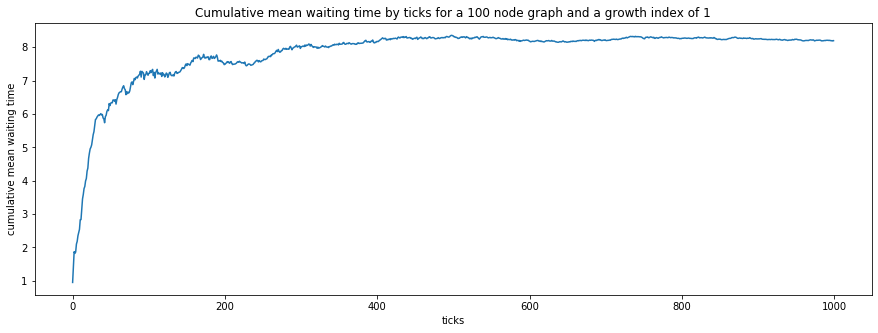

In [130]:
f = plt.figure(figsize=(15, 5))
plt.plot(sma.wt_collector)
plt.xlabel('ticks')
plt.ylabel('cumulative mean waiting time')
plt.title('Cumulative mean waiting time by ticks for a 100 node graph and a growth index of 1')
plt.show()
#f.savefig("/home/fevrec/Documents/These/these/smac_agents/img/wt1_v2", bbox_inches='tight')

# OLD V1

In [120]:
#     def generate_transition_graph(self):
#         G= nx.MultiDiGraph()
#         #print(self.Ats)
#         G.add_node(self.v_r, distance=0)
#         #il faudra se baser sur ad par la suite
#         for ats, val in self.Ats.items():
#             #print(ats, val)
#             #print(ats)
#             #print(G_ts.nodes())
#             if ats in self.Ad.keys():
#                  #G_ts.add_node(ats, distance=val['distance'])
#                 for ad in self.Ad[ats]:
#                     #print("coucou")
#                     #si le parcours est faisable
#                     #print(ad)
#                     d_time_left = ad[2]
#                     r_time_left = self.Ats[ats]['distance']
#                     d_trip = ad[1]
#                     if d_time_left >= r_time_left :
#                         if not (G.has_node(ats)):
#                             G.add_node(ats, distance=val['distance'])
                        
#                         if self.v_arr in ad[1]:
#                             new_node = self.v_arr
#                             d_subtrip_size = d_trip.index(self.v_arr)
#                             #dist = d_time_left + d_subtrip_size
#                         else :
#                             new_node = ad[1][-1]
#                             d_subtrip_size = len(ad[1]) - 1
#                             #id_d = ad[0]
#                             #TODO il manque qqchose, car si on se base sur le noeuds le plus eloigné il se peut que la contrib soit neg
#                             #alors qu'au final il peut quand meme nous faire gagner qqchose.
                            

#                         #dist : nombres de ticks minimum necessaires pour atteindre un noeuds
                        
#                         dist = d_time_left + d_subtrip_size
                        
#                         #dist = ((d_time_left + r_time_left) - (d_time_left - r_time_left)) + d_subtrip_size
                        
#                         if G.has_node(new_node):
#                             if (dist < G.nodes[new_node]['distance']):
#                                 G.nodes[new_node]['distance'] = dist
#                         else :
#                             G.add_node(new_node, distance=dist)
                        
                        
#                         contrib = nx.shortest_path_length(sma.graph, source=ats, target=self.v_arr) - nx.shortest_path_length(sma.graph, source=new_node, target=self.v_arr)
#                         delay = d_time_left - r_time_left
#                         G.add_edge(ats, new_node, d=ad, contrib=contrib, delay=delay)
                    
#         self.G_ts = G

# def update_v1(self):
#         self.Ad = tsa.get_rider_matched_drivers(self.Av)
#         self.generate_transition_graph()
        
#         cur_node = self.v_r
        
#         blacklist = set()
#         #decision ici:
        
        
#         #si véhicule présent direct alors on effectue heuritique sinon reste sur son noeud et comportement dif
#         #manque un if ici
        
#         #if len([edge for edge in G_ts.out_edges(cur_node) if edge['d'][2]==0]) > 0:
#         if len(self.Ad[cur_node]) > 0 and len([driver for driver in self.Ad[cur_node] if driver[2]==0])>0:
#             best_driver = self.best_driver_contrib_and_wait()
#             #v_r = nouveau noeuds
#             #après decision
#             if best_driver != None :
                
#                 new_node = best_driver[1][1]
#                 #print("new_node",new_node)
#                 #cur_node = new_node
#                 print("Agent rider",self.unique_id,"move from",self.v_r,"to",new_node,"using car",best_driver)
#                 if new_node == self.v_arr:
#                     print("Rider n°",self.unique_id,"arrived with a waiting time of",self.wt,"ticks")
#                     self.is_alive = False
#                     return
#                 #on ecrase l'ancien noeud
#                 nx.relabel_nodes(self.G_ts, {cur_node:new_node}, copy=False)
#                 #G_ts.node[new_node] = G_ts[cur_node]
#                 #print(G_ts.node[new_node])
#                 #G_ts.add_edge(new_node, best_driver[1][-1])
#                 #G_ts.remove_node(cur_node)

#                 blacklist = set(cur_node)
#             else : 
#                 print("Agent rider",self.unique_id,"doesn't move")
#                 new_node = cur_node
#                 self.wt += 1
            
            
#         else:
#             print("Agent rider",self.unique_id,"doesn't move")
#             new_node = cur_node
#             self.wt += 1
        
        
#         self.Av = {new_node}
#         self.Ats = dict()
#         self.Ats[new_node] = {'distance':0}
#         #print("nodes in G_ts",self.G_ts.nodes())
#         other_nodes = [node for node in list(self.G_ts.nodes()) if node != new_node]
#         #print("other_nodes:",other_nodes)
#         for node in other_nodes:
#             #print("haspath_test between:",new_node,node)
#             if nx.has_path(self.G_ts,new_node,node):
#                 self.G_ts.node[node]['distance'] = self.G_ts.node[node]['distance'] - 1
#                 self.Ats[node] = {'distance': self.G_ts.node[node]['distance']}
#                 bl_node = nx.shortest_path(self.G_ts, new_node, node)[-2]
#                 edge_data = self.G_ts.get_edge_data(bl_node,node)
#                 #print(data)

#                     #si il y a plusieurs arretes menants au meme noeuds
#                     #on est dans un multigraph, donc on prends la meilleur edge
#                 #print("recup noeuds possibles, show edge",edge_data)
#                 for j in range(len(edge_data)): 
                   
#                     d = edge_data[j]['d']
#                     self.Av.union(set(d[1]))

#             else :
#                 blacklist.add(node)
#                 self.G_ts.remove_node(node)

#             #clean
#             #self.G_ts.remove_node(cur_node)
        
#         self.v_r = new_node
#         self.Av.difference(blacklist)
#         #print(self.Ats)

# OLD EXP

In [ ]:
# node_list = list(graph.nodes)
# trip1 = nx.shortest_path( graph, random.choice(node_list), random.choice(node_list))
# trip2 = nx.shortest_path( graph, (1, 3), (1, 0))
# print(trip2)
# trip3 = nx.shortest_path( graph, (1, 0), (2, 3))
# trip4 = list(((2,2),(1,2),(0,2),(1,1)))
# trip5 = list(((3,2),(2,2),(2,3),(1,3),(0,3),(0,2)))
# print("\n trip1:",trip1,"\n trip2:",trip2,"\n trip3:",trip3,"\n trip4:",trip4, "\n trip5:",trip5 )

In [ ]:
#agentList = [RiderAgent(0,(1, 1),(1, 3)),RiderAgent(6,(2, 2),(2, 3)), DriverAgent(1, trip1), DriverAgent(2, trip2), DriverAgent(3, trip3), DriverAgent(4, trip4), DriverAgent(5, trip5)]

#sma = SMA(agentList, graph)
#sma.runOnce()

In [ ]:
# tsa = TransportServiceAgent(0)
# agentList = [tsa]
# node_list = list(graph.nodes)
# nb_riders = 5
# nb_drivers = 500
# id_count = 1
# for i in range(nb_riders):
#     n1, n2 = random.sample(node_list,2)    
#     r = RiderAgent(id_count, n1, n2)
#     agentList.append(r)
#     r.to_string()
#     id_count+=1
    
# for i in range(nb_drivers):
#     n1, n2 = random.sample(node_list,2) 
#     trip = nx.shortest_path(graph, n1, n2)
#     d = DriverAgent(id_count, trip)
#     d.to_string()
#     agentList.append(d)
#     id_count+=1
    

    
# sma = SMA(agentList, graph)
# sma.run(10)

In [ ]:
for _ in range(1000):
    agentList = []
    node_list = list(graph.nodes)
    nb_riders = 2
    nb_drivers = 5
    id_count = 0
    for i in range(nb_riders):
        n1, n2 = random.sample(node_list,2)    
        r = RiderAgent(id_count, n1, n2)
        agentList.append(r)
        r.to_string()
        id_count+=1

    for i in range(nb_drivers):
        n1, n2 = random.sample(node_list,2) 
        trip = nx.shortest_path(graph, n1, n2)
        d = DriverAgent(id_count, trip)
        d.to_string()
        agentList.append(d)
        id_count+=1



    sma = SMA(agentList, graph)
    sma.run(5)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))    # pour définir la taille de la figure
G_ts = sma.agentList[3].G_ts
pos = nx.spring_layout(G_ts)
#labels = nx.get_node_attributes(G_ts, 'distance') 
nx.draw_networkx(G_ts,pos=pos, edge_color='black',width=1,linewidths=1,node_size=1500,node_color='pink',alpha=0.9)
nx.draw_networkx_edge_labels(G_ts,pos=pos)
#nx.draw_networkx_labels(G_ts,pos=nx.spring_layout(G_ts),labels=labels)
plt.axis('off')
plt.show()
print( nx.get_node_attributes(G_ts, 'distance') )

In [ ]:
sma = SMA(agentList, graph)
sma.runOnce()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))    # pour définir la taille de la figure
G_ts = sma.agentList[1].G_ts
pos = nx.spring_layout(G_ts)
#labels = nx.get_node_attributes(G_ts, 'distance') 
nx.draw_networkx(G_ts,pos=pos, edge_color='black',width=1,linewidths=1,node_size=1500,node_color='pink',alpha=0.9)
nx.draw_networkx_edge_labels(G_ts,pos=pos)
#nx.draw_networkx_labels(G_ts,pos=nx.spring_layout(G_ts),labels=labels)
plt.axis('off')
plt.show()
print( nx.get_node_attributes(G_ts, 'distance') )

In [ ]:
sma.runOnce()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))    # pour définir la taille de la figure
G_ts = sma.agentList[0].G_ts
pos = nx.spring_layout(G_ts)
nx.draw_networkx(G_ts,pos=pos,edge_color='black',width=1,linewidths=1,node_size=800,node_color='pink',alpha=0.9)
nx.draw_networkx_edge_labels(G_ts,pos=pos)
plt.axis('off')
plt.show()


Il a l'air de bien arriver à (1,3) donc ça marche pas trop mal, l'affichage est pourri par contre...

# Bibliographie

Philippe Mathieu, Yann Secq.
Environment Updating and Agent Scheduling Policies in Agent-based Simulators. 
ICAART Conference, 2012, pp 170-175

Philippe Mathieu, Sébastien Picault, Yann Secq.
Design Patterns for Environments in Multi-agent Simulations. 
PRIMA Conference, 2015, pp 678-686

Philippe Mathieu, Gildas Morvan, Sébastien Picault.
Multi-level agent-based simulations: Four design patterns. 
Journal of Simulation Modelling Practice and Theory, Janv 2018
